# Advance Machine Learning - Assignment 3
#### Villa Giacomo 807462

## Importing Libraries

In [1]:
import numpy as np

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping

from matplotlib import pyplot as plt
import matplotlib as mpl
%matplotlib inline

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


## Functions

In [2]:
def preprocessing_data(train_in, train_out, test_in, test_out):

    train_in = train_in.reshape(60000, 28, 28, 1) 
    test_in = test_in.reshape(10000, 28, 28, 1)
    
    train_in = train_in.astype("float32")
    test_in = test_in.astype("float32")
    
    train_in /= 255.
    test_in /= 255.
    
    train_out = keras.utils.to_categorical(train_out, 10)
    test_out = keras.utils.to_categorical(test_out, 10)
    
    return train_in, train_out, test_in, test_out

def display_image(image):
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    plt.show()
    
def map_fields(init_dict, map_dict, res_dict=None):

    res_dict = res_dict or {}
    for k, v in init_dict.items():

        if isinstance(v, dict):
            v = map_fields(v, map_dict[k])
        elif k in map_dict.keys():
            k = str(map_dict[k])
        res_dict[k] = v
    return res_dict
    
def get_train_numbers(numbers):
    
    number, counts = np.unique(numbers, return_counts=True)
    distribution = dict(zip(number, counts))
    print(distribution)
    colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#99f3ff', '#ff99f5', '#ffb999', '#fff199', '#9b99ff',
             '#abb57b']
    
    label = list(distribution.keys())
    values = list(distribution.values())
    
    fig1, ax1 = plt.subplots()
    
    ax1.pie(values, labels = label , autopct = '%1.1f%%', shadow = True, startangle = 90, colors = colors)
    ax1.axis('equal')
    plt.show()
    
def define_model():
    model = Sequential()
    model.add(Conv2D(10, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Conv2D(7, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer = "Adadelta", metrics=['accuracy'])
    
    model.summary()
    return model
        
def plotConfusionMatrix(y_true, y_pred, classes, normalize, title, cmap = plt.cm.get_cmap("Blues")):
    
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap= cmap)
    ax.figure.colorbar(im, ax=ax)

    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),

           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

    plt.show(ax)
    
def plot_history(network_history, index):
    
    plt.figure(figsize=(10,5)) 
    plt.xlabel('Epochs')
    plt.ylabel(index)
    plt.plot(network_history.history[index])
    plt.plot(network_history.history["val_"+index])
    plt.legend(['Training', 'Validation'], loc='best')

    plt.show()

## Loading Data and Preprocessing

X TRAIN LENGTH:  60000
X TEST LENGTH:  10000

Y TRAIN LENGTH:  60000
Y TEST LENGTH:  10000



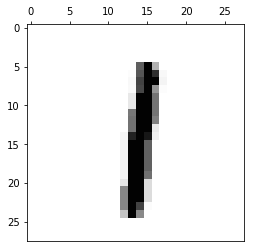

--------------------
X TRAIN SHAPE:  (60000, 28, 28, 1)
Y TRAIN SHAPE:  (60000, 10)

X TEST SHAPE:  (10000, 28, 28, 1)
Y TEST SHAPE:  (10000, 10)
--------------------
X VALIDATION SHAPE:  (15000, 28, 28, 1)
Y VALIDATION SHAPE:  (15000, 10)

X TRAIN SHAPE:  (45000, 28, 28, 1)
Y TRAIN SHAPE:  (45000, 10)
--------------------

VALIDTION LABEL DISTRIBUTION
{0: 1457, 1: 1725, 2: 1466, 3: 1536, 4: 1433, 5: 1417, 6: 1442, 7: 1597, 8: 1454, 9: 1473}


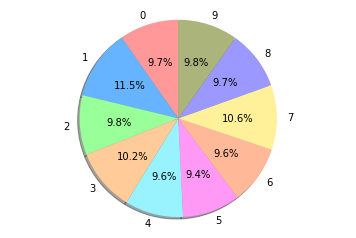


TRAIN LABEL DISTRIBUTION
{0: 4466, 1: 5017, 2: 4492, 3: 4595, 4: 4409, 5: 4004, 6: 4476, 7: 4668, 8: 4397, 9: 4476}


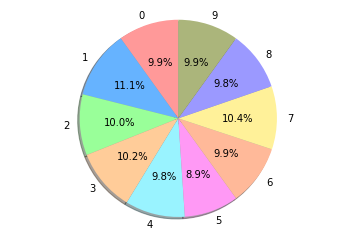

TESTSET SIZE:  45000


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X TRAIN LENGTH: ", len(X_train))
print("X TEST LENGTH: ", len(X_test))
print("")
print("Y TRAIN LENGTH: ", len(y_train))
print("Y TEST LENGTH: ", len(y_test))

print("")
# print("TRAIN LABEL DISTRIBUTION")
# get_train_numbers(y_train)# 
# print("")
# print("TEST LABEL DISTRIBUTION")
# get_train_numbers(y_test)

display_image(X_train[40])
train_x, train_y, test_x, test_y = preprocessing_data(X_train, y_train, X_test, y_test)

print("--------------------")
print("X TRAIN SHAPE: ", train_x.shape)
print("Y TRAIN SHAPE: ", train_y.shape)
print("")
print("X TEST SHAPE: ", test_x.shape)
print("Y TEST SHAPE: ", test_y.shape)
print("--------------------")

real_x_train, x_val, real_y_train, y_val = train_test_split(train_x, train_y) 

print("X VALIDATION SHAPE: ", x_val.shape)
print("Y VALIDATION SHAPE: ", y_val.shape)
print("")
print("X TRAIN SHAPE: ", real_x_train.shape)
print("Y TRAIN SHAPE: ", real_y_train.shape)
print("--------------------")

val_value = list()
train_value = list()

for label in y_val:    
    val_value.append(np.where(label == np.amax(label))[0][0])
    
for label in real_y_train:    
    train_value.append(np.where(label == np.amax(label))[0][0])

print("")
print("VALIDTION LABEL DISTRIBUTION")
get_train_numbers(val_value)
print("")
print("TRAIN LABEL DISTRIBUTION")
get_train_numbers(train_value)
# print("VALIDATION SIZE:", len(val_value))
print("TESTSET SIZE: ", len(train_value))

## Model Creation and Validation

In [4]:
model = define_model()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 10)        260       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 10)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 7)           637       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 7)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 7)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 63)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

In [5]:
es = EarlyStopping(monitor='val_loss', patience = 5, verbose = 2, restore_best_weights = True)
network_history = model.fit(real_x_train, real_y_train, batch_size=256, epochs=200, verbose=1,
                            validation_data=(x_val, y_val), callbacks = [es])

Train on 45000 samples, validate on 15000 samples
Epoch 1/200
45000/45000 [==============================] - 11s 235us/step - loss: 1.1869 - accuracy: 0.5943 - val_loss: 0.2734 - val_accuracy: 0.9221
Epoch 2/200
45000/45000 [==============================] - 10s 229us/step - loss: 0.4892 - accuracy: 0.8467 - val_loss: 0.1939 - val_accuracy: 0.9437
Epoch 3/200
45000/45000 [==============================] - 10s 212us/step - loss: 0.4003 - accuracy: 0.8783 - val_loss: 0.1846 - val_accuracy: 0.9465
Epoch 4/200
45000/45000 [==============================] - 10s 214us/step - loss: 0.3593 - accuracy: 0.8922 - val_loss: 0.1509 - val_accuracy: 0.9555
Epoch 5/200
45000/45000 [==============================] - 8s 183us/step - loss: 0.3293 - accuracy: 0.9012 - val_loss: 0.1429 - val_accuracy: 0.9573
Epoch 6/200
45000/45000 [==============================] - 8s 173us/step - loss: 0.3082 - accuracy: 0.9079 - val_loss: 0.1326 - val_accuracy: 0.9615
Epoch 7/200
45000/45000 [===========================

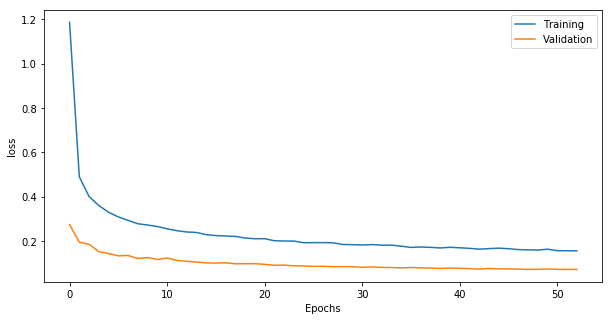

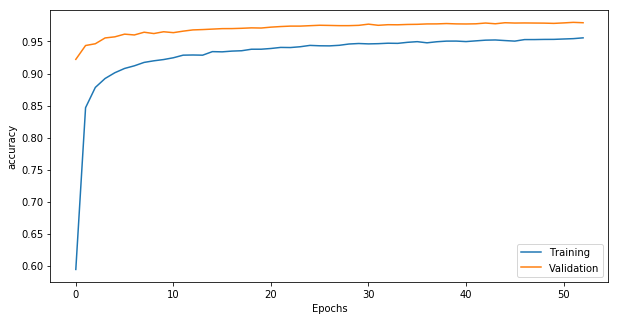

In [6]:
plot_history(network_history, 'loss')
plot_history(network_history, 'accuracy')

# Performance Analysis on Test set

In [7]:
scores = model.evaluate(test_x, test_y, verbose = 0)
print(scores)


[0.062199101540120316, 0.9807000160217285]


In [8]:
labels_predict = model.predict_classes(test_x)
labels_real = list()

for label in test_y:    
    labels_real.append(np.where(label == np.amax(label))[0][0])

In [9]:
report = classification_report(labels_real, labels_predict)

In [10]:
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.99      0.96      0.98       974
           9       0.97      0.97      0.97      1009

   micro avg       0.98      0.98      0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



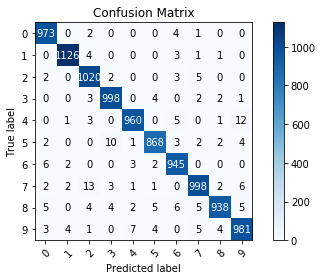

In [11]:
plotConfusionMatrix(labels_real, labels_predict, ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9'),
                    False, "Confusion Matrix")

## Show discriminating model capabilities 

In [48]:
model_truncated = Sequential()
model_truncated.add(Conv2D(10, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model_truncated.add(MaxPooling2D(pool_size=(3, 3)))
model_truncated.add(Conv2D(7, (3, 3), activation='relu'))
model_truncated.add(MaxPooling2D(pool_size=(2, 2)))
model_truncated.add(Dropout(0.3))
model_truncated.add(Flatten())
# model_truncated.add(Dense(64, activation='relu'))
# model_truncated.add(Dropout(0.2))
# model_truncated.add(Dense(32, activation='relu'))
# model_truncated.add(Dropout(0.2))

for i, layer in enumerate(model_truncated.layers):
    layer.set_weights(model.layers[i].get_weights())
    
model_truncated.compile(loss='categorical_crossentropy', optimizer = "Adadelta", metrics=['accuracy'])    

In [49]:
hidden_features = model_truncated.predict(test_x)
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(hidden_features[:10000]) 

In [50]:
colors_map = np.argmax(test_y, axis=1)
print(colors_map)

[7 2 1 ... 4 5 6]


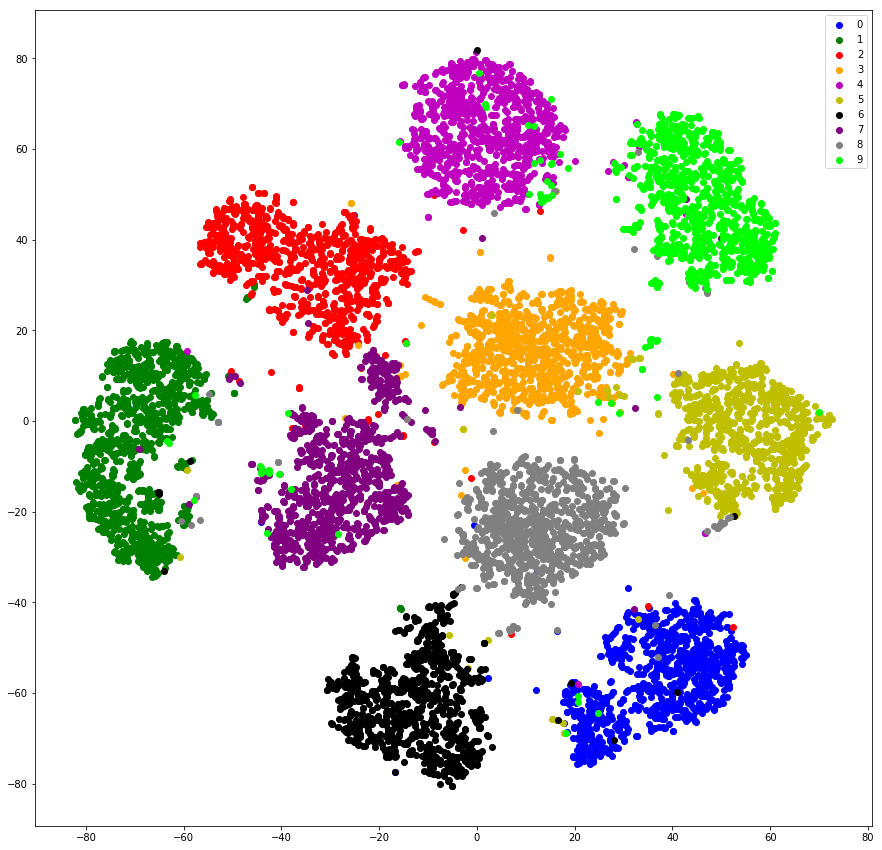

In [51]:
colors = np.array([x for x in 'b-g-r-orange-m-y-k-purple-grey-lime'.split('-')])
colors_map = colors_map[:10000]
plt.figure(figsize=(15,15))

for cl in range(10):
    indices = np.where(colors_map == cl)
    plt.scatter(X_tsne[indices,0], X_tsne[indices, 1], c=colors[cl], label=cl)
plt.legend()
plt.show()

## Show first 1000 correct inferences and all errors

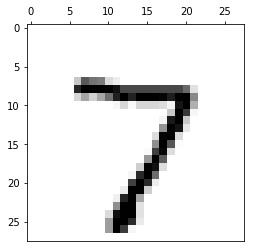

I PREDICT:  7
REAL VALUE:  7



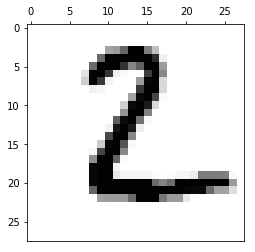

I PREDICT:  2
REAL VALUE:  2



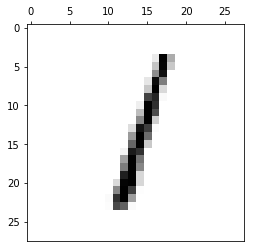

I PREDICT:  1
REAL VALUE:  1



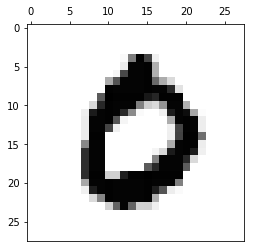

I PREDICT:  0
REAL VALUE:  0



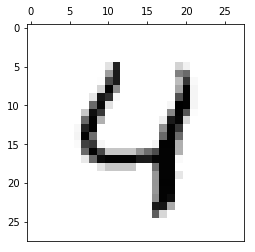

I PREDICT:  4
REAL VALUE:  4



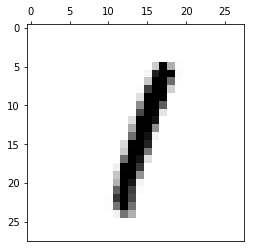

I PREDICT:  1
REAL VALUE:  1



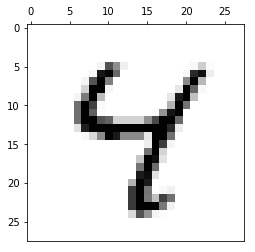

I PREDICT:  4
REAL VALUE:  4



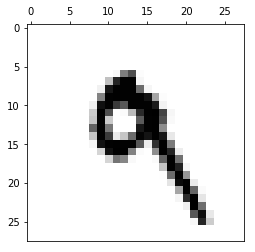

I PREDICT:  9
REAL VALUE:  9



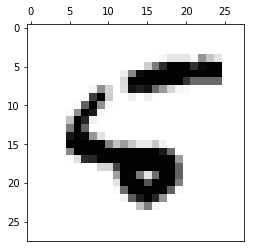

I PREDICT:  5
REAL VALUE:  5



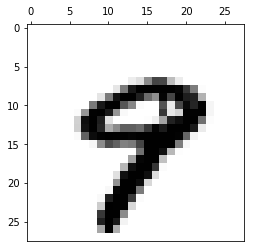

I PREDICT:  9
REAL VALUE:  9



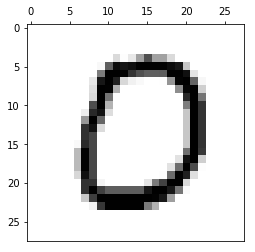

I PREDICT:  0
REAL VALUE:  0



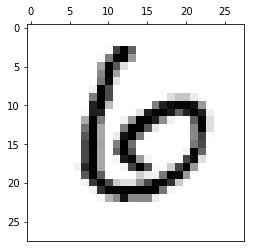

I PREDICT:  6
REAL VALUE:  6



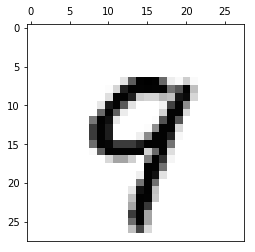

I PREDICT:  9
REAL VALUE:  9



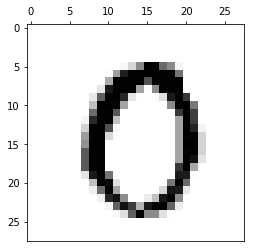

I PREDICT:  0
REAL VALUE:  0



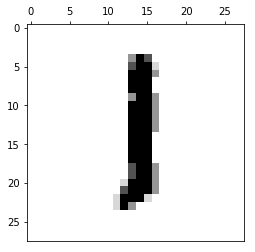

I PREDICT:  1
REAL VALUE:  1



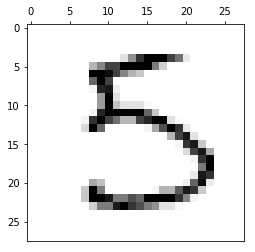

I PREDICT:  5
REAL VALUE:  5



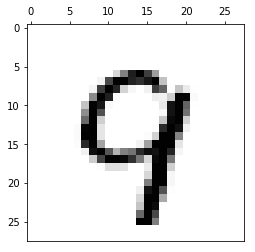

I PREDICT:  9
REAL VALUE:  9



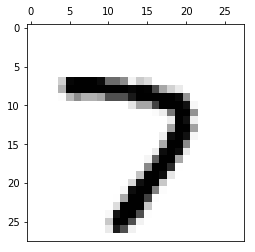

I PREDICT:  7
REAL VALUE:  7



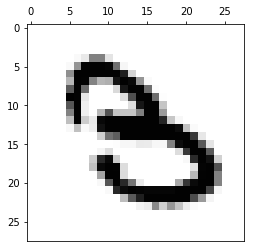

I PREDICT:  3
REAL VALUE:  3



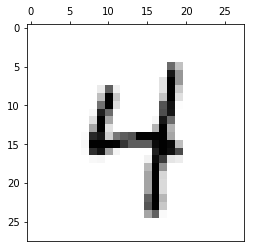

I PREDICT:  4
REAL VALUE:  4



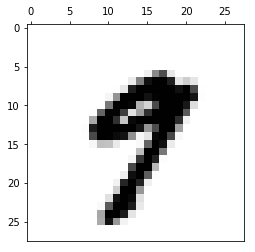

I PREDICT:  9
REAL VALUE:  9



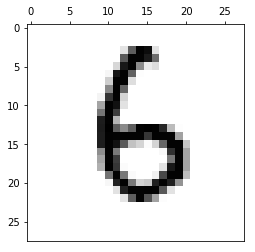

I PREDICT:  6
REAL VALUE:  6



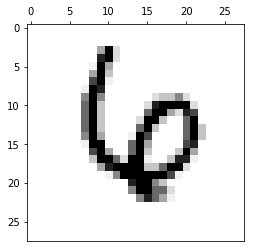

I PREDICT:  6
REAL VALUE:  6



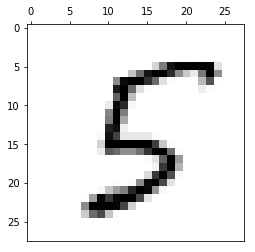

I PREDICT:  5
REAL VALUE:  5



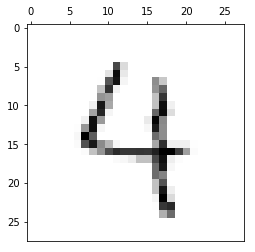

I PREDICT:  4
REAL VALUE:  4



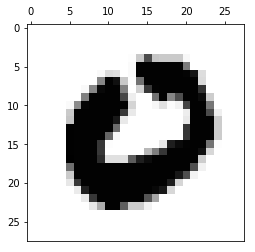

I PREDICT:  0
REAL VALUE:  0



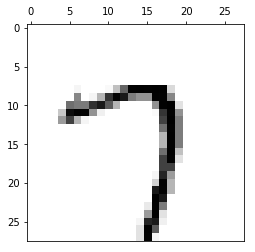

I PREDICT:  7
REAL VALUE:  7



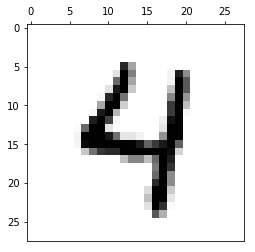

I PREDICT:  4
REAL VALUE:  4



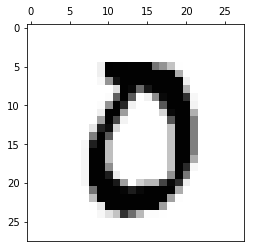

I PREDICT:  0
REAL VALUE:  0



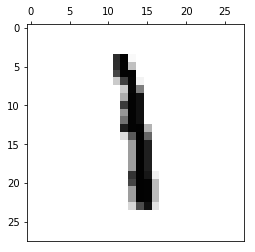

I PREDICT:  1
REAL VALUE:  1



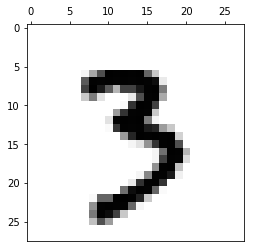

I PREDICT:  3
REAL VALUE:  3



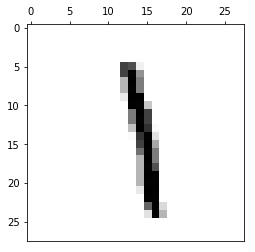

I PREDICT:  1
REAL VALUE:  1



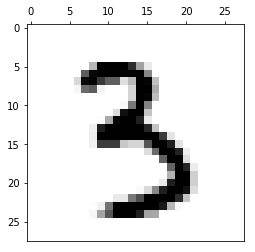

I PREDICT:  3
REAL VALUE:  3



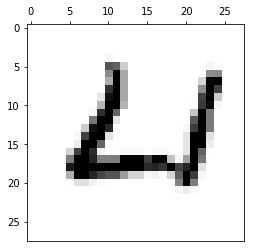

I PREDICT:  4
REAL VALUE:  4



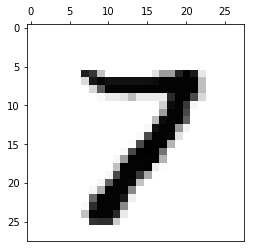

I PREDICT:  7
REAL VALUE:  7



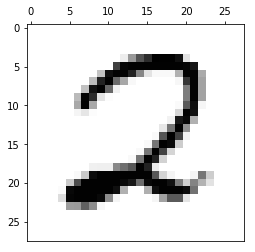

I PREDICT:  2
REAL VALUE:  2



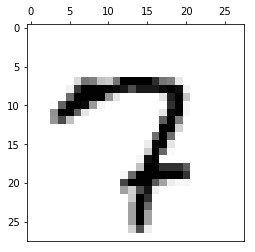

I PREDICT:  7
REAL VALUE:  7



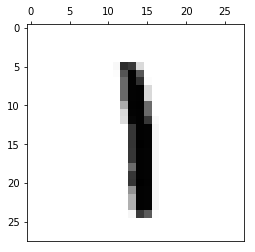

I PREDICT:  1
REAL VALUE:  1



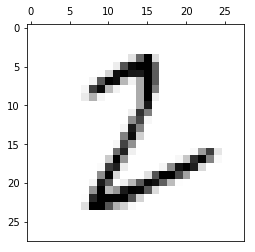

I PREDICT:  2
REAL VALUE:  2



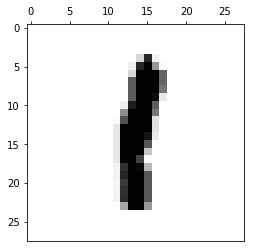

I PREDICT:  1
REAL VALUE:  1



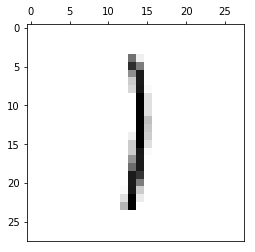

I PREDICT:  1
REAL VALUE:  1



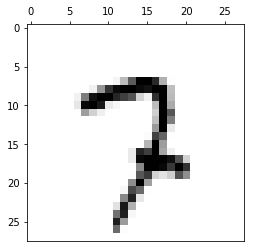

I PREDICT:  7
REAL VALUE:  7



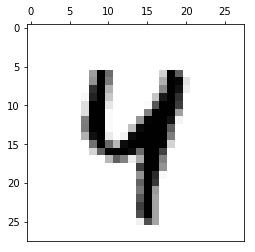

I PREDICT:  4
REAL VALUE:  4



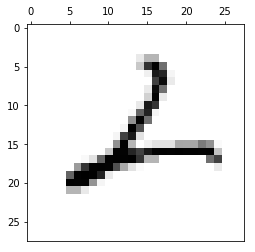

I PREDICT:  2
REAL VALUE:  2



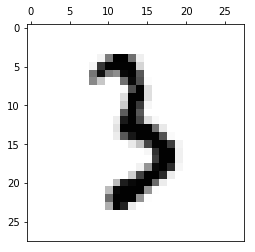

I PREDICT:  3
REAL VALUE:  3



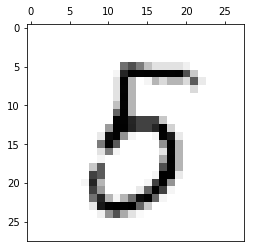

I PREDICT:  5
REAL VALUE:  5



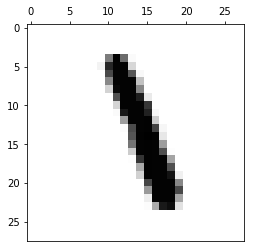

I PREDICT:  1
REAL VALUE:  1



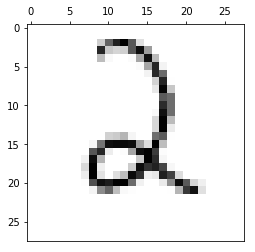

I PREDICT:  2
REAL VALUE:  2



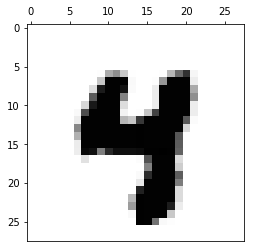

I PREDICT:  4
REAL VALUE:  4



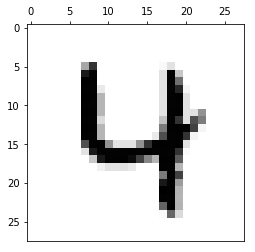

I PREDICT:  4
REAL VALUE:  4



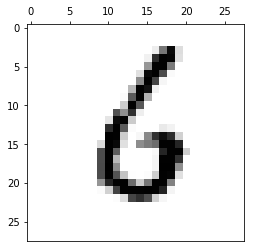

I PREDICT:  6
REAL VALUE:  6



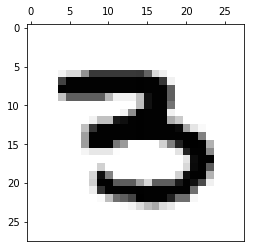

I PREDICT:  3
REAL VALUE:  3



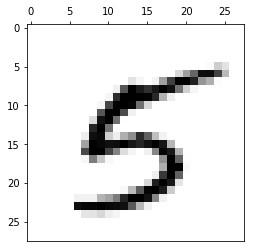

I PREDICT:  5
REAL VALUE:  5



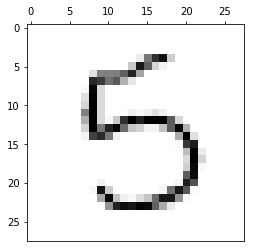

I PREDICT:  5
REAL VALUE:  5



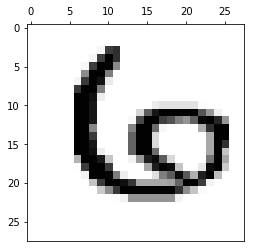

I PREDICT:  6
REAL VALUE:  6



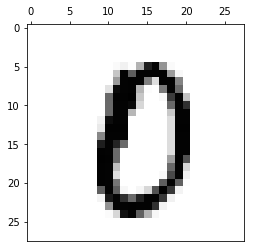

I PREDICT:  0
REAL VALUE:  0



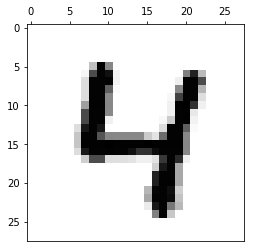

I PREDICT:  4
REAL VALUE:  4



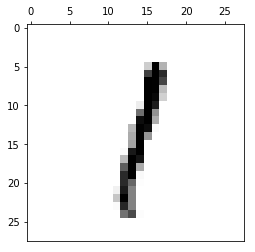

I PREDICT:  1
REAL VALUE:  1



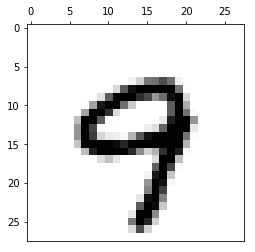

I PREDICT:  9
REAL VALUE:  9



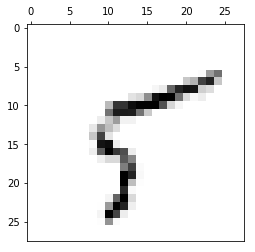

I PREDICT:  5
REAL VALUE:  5



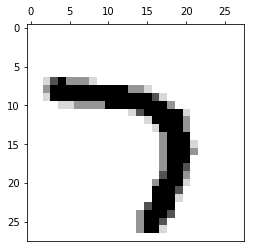

I PREDICT:  7
REAL VALUE:  7



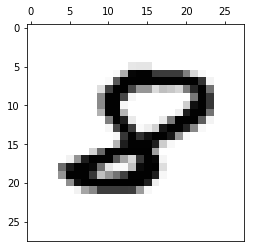

I PREDICT:  8
REAL VALUE:  8



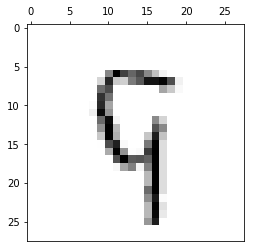

I PREDICT:  9
REAL VALUE:  9



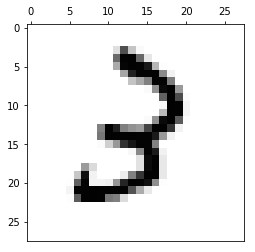

I PREDICT:  3
REAL VALUE:  3



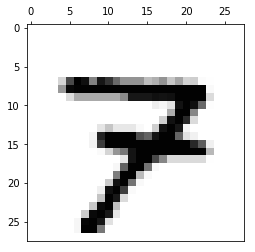

I PREDICT:  7
REAL VALUE:  7



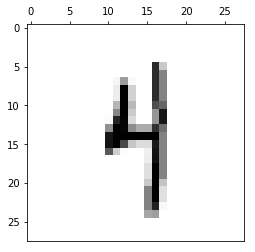

I PREDICT:  4
REAL VALUE:  4



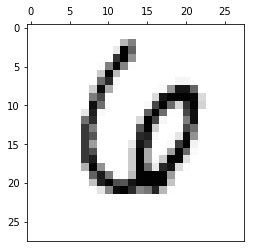

I PREDICT:  6
REAL VALUE:  6



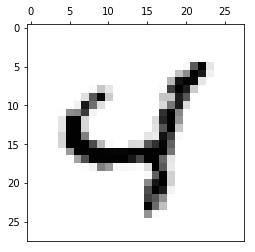

I PREDICT:  4
REAL VALUE:  4



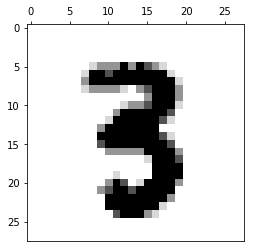

I PREDICT:  3
REAL VALUE:  3



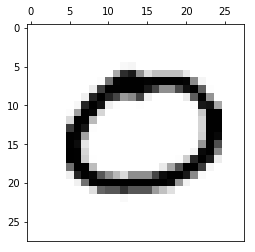

I PREDICT:  0
REAL VALUE:  0



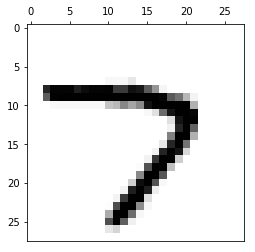

I PREDICT:  7
REAL VALUE:  7



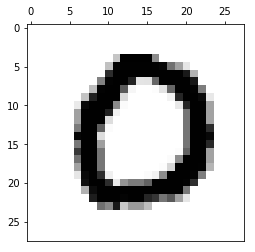

I PREDICT:  0
REAL VALUE:  0



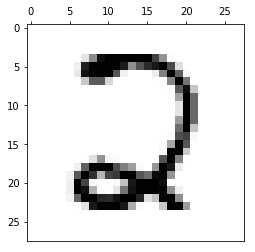

I PREDICT:  2
REAL VALUE:  2



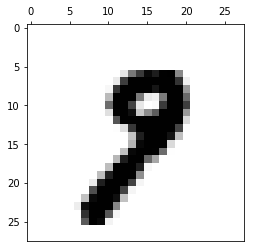

I PREDICT:  9
REAL VALUE:  9



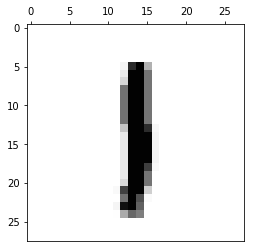

I PREDICT:  1
REAL VALUE:  1



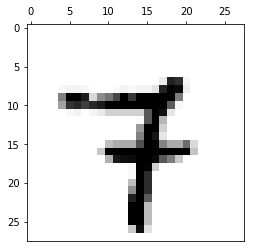

I PREDICT:  7
REAL VALUE:  7



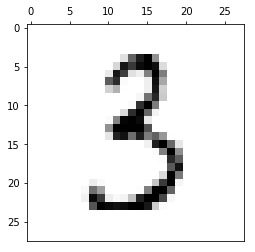

I PREDICT:  3
REAL VALUE:  3



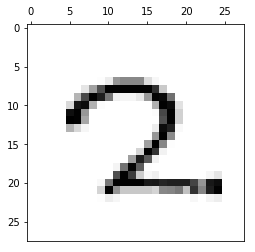

I PREDICT:  2
REAL VALUE:  2



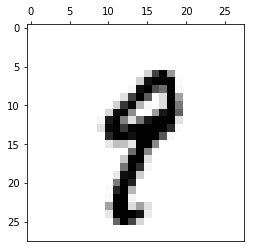

I PREDICT:  9
REAL VALUE:  9



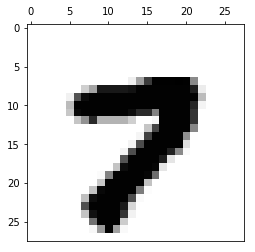

I PREDICT:  7
REAL VALUE:  7



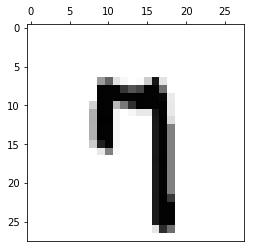

I PREDICT:  7
REAL VALUE:  7



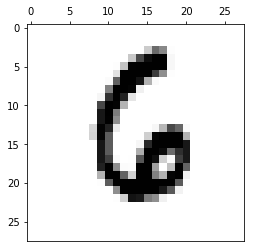

I PREDICT:  6
REAL VALUE:  6



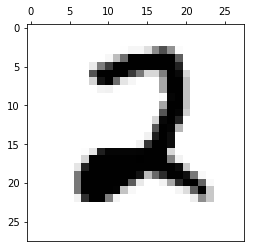

I PREDICT:  2
REAL VALUE:  2



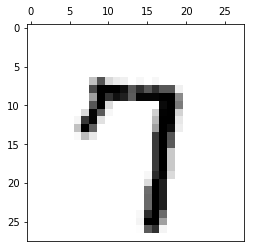

I PREDICT:  7
REAL VALUE:  7



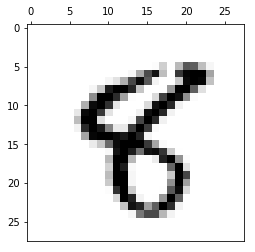

I PREDICT:  8
REAL VALUE:  8



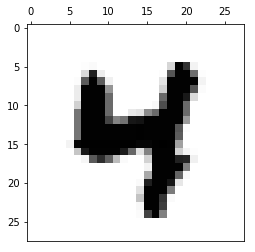

I PREDICT:  4
REAL VALUE:  4



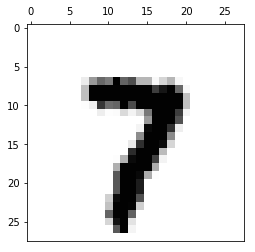

I PREDICT:  7
REAL VALUE:  7



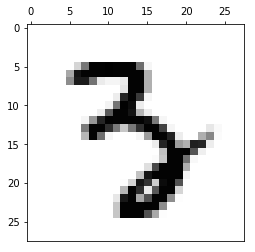

I PREDICT:  3
REAL VALUE:  3



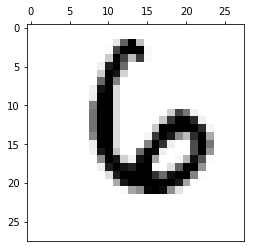

I PREDICT:  6
REAL VALUE:  6



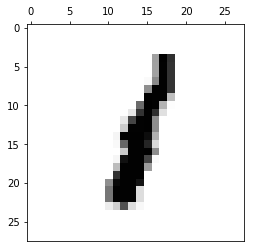

I PREDICT:  1
REAL VALUE:  1



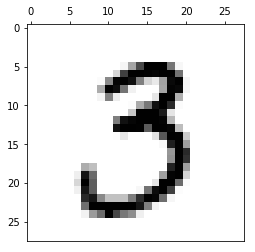

I PREDICT:  3
REAL VALUE:  3



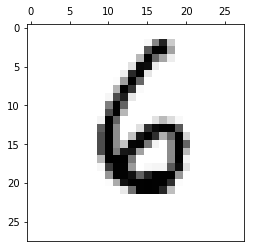

I PREDICT:  6
REAL VALUE:  6



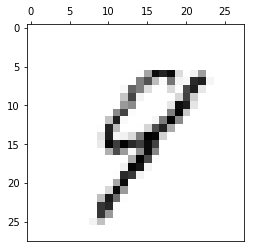

I PREDICT:  9
REAL VALUE:  9



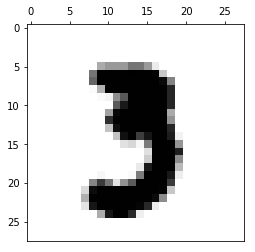

I PREDICT:  3
REAL VALUE:  3



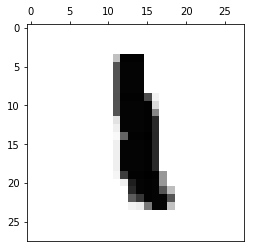

I PREDICT:  1
REAL VALUE:  1



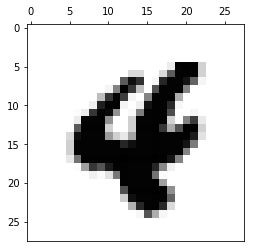

I PREDICT:  4
REAL VALUE:  4



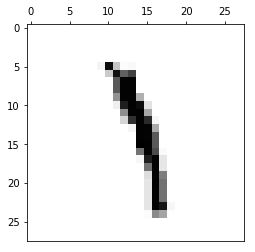

I PREDICT:  1
REAL VALUE:  1



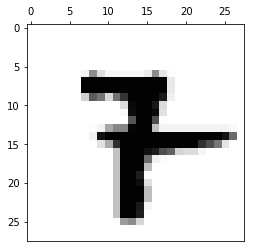

I PREDICT:  7
REAL VALUE:  7



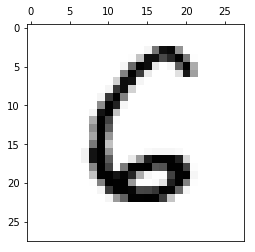

I PREDICT:  6
REAL VALUE:  6



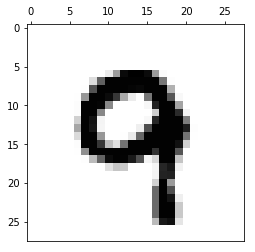

I PREDICT:  9
REAL VALUE:  9



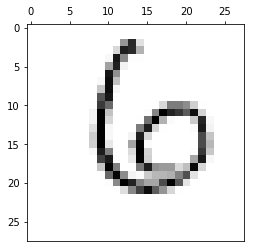

I PREDICT:  6
REAL VALUE:  6



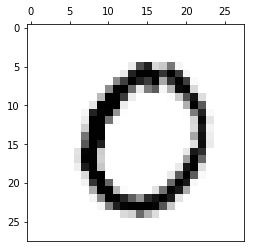

I PREDICT:  0
REAL VALUE:  0



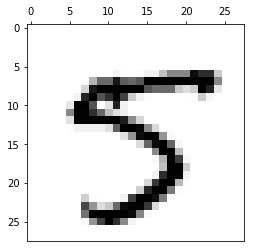

I PREDICT:  5
REAL VALUE:  5



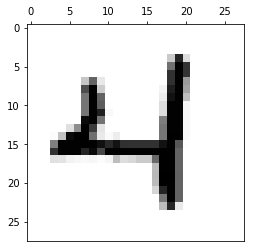

I PREDICT:  4
REAL VALUE:  4



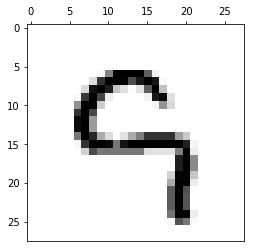

I PREDICT:  9
REAL VALUE:  9



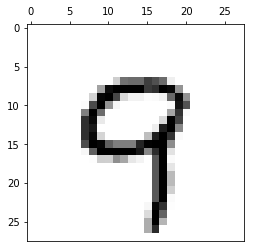

I PREDICT:  9
REAL VALUE:  9



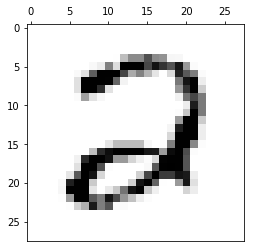

I PREDICT:  2
REAL VALUE:  2



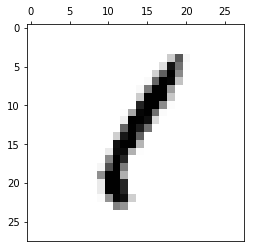

I PREDICT:  1
REAL VALUE:  1



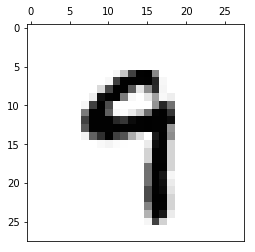

I PREDICT:  9
REAL VALUE:  9



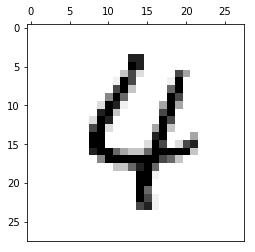

I PREDICT:  4
REAL VALUE:  4



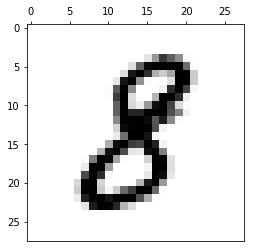

I PREDICT:  8
REAL VALUE:  8



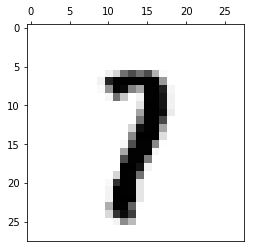

I PREDICT:  7
REAL VALUE:  7



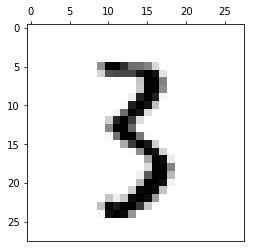

I PREDICT:  3
REAL VALUE:  3



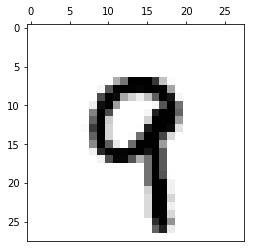

I PREDICT:  9
REAL VALUE:  9



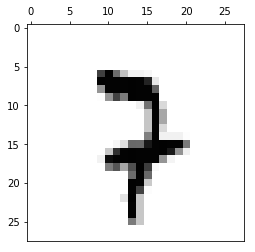

I PREDICT:  7
REAL VALUE:  7



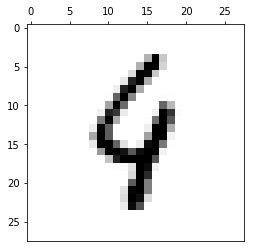

I PREDICT:  4
REAL VALUE:  4



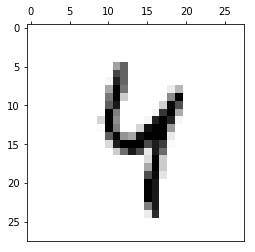

I PREDICT:  4
REAL VALUE:  4



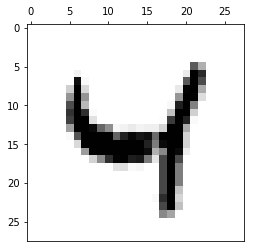

I PREDICT:  4
REAL VALUE:  4



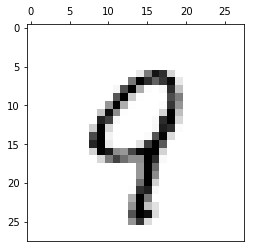

I PREDICT:  9
REAL VALUE:  9



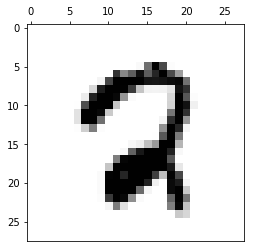

I PREDICT:  2
REAL VALUE:  2



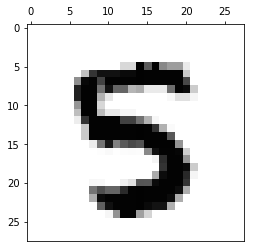

I PREDICT:  5
REAL VALUE:  5



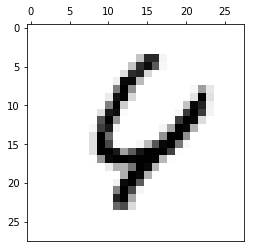

I PREDICT:  4
REAL VALUE:  4



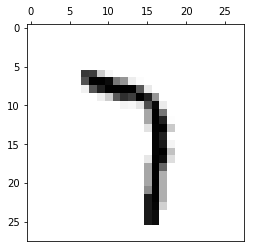

I PREDICT:  7
REAL VALUE:  7



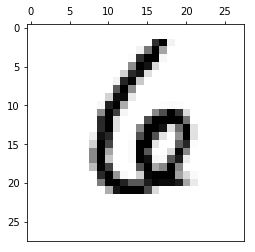

I PREDICT:  6
REAL VALUE:  6



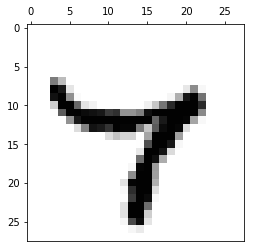

I PREDICT:  7
REAL VALUE:  7



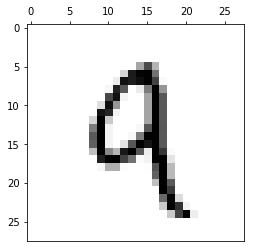

I PREDICT:  9
REAL VALUE:  9



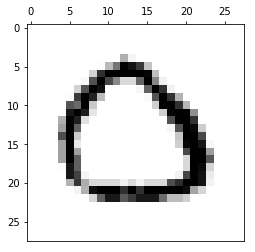

I PREDICT:  0
REAL VALUE:  0



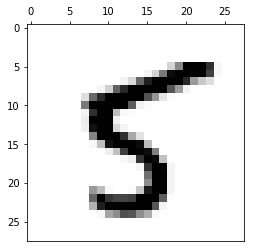

I PREDICT:  5
REAL VALUE:  5



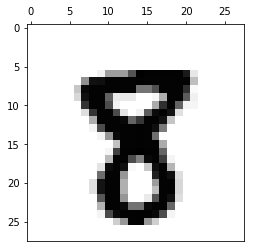

I PREDICT:  8
REAL VALUE:  8



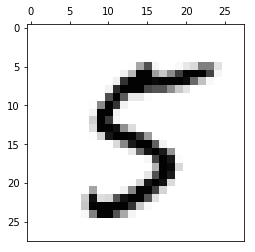

I PREDICT:  5
REAL VALUE:  5



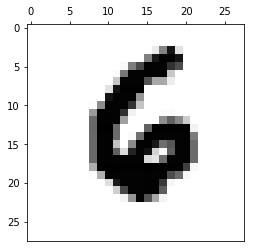

I PREDICT:  6
REAL VALUE:  6



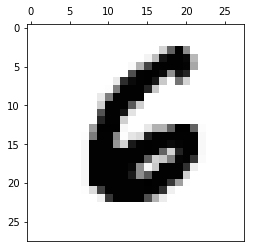

I PREDICT:  6
REAL VALUE:  6



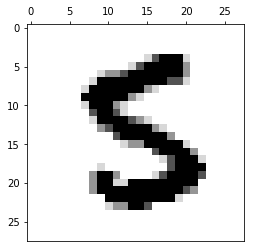

I PREDICT:  5
REAL VALUE:  5



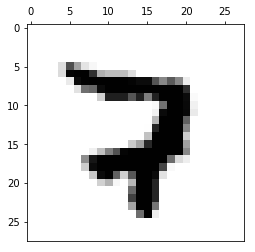

I PREDICT:  7
REAL VALUE:  7



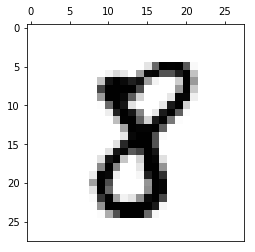

I PREDICT:  8
REAL VALUE:  8



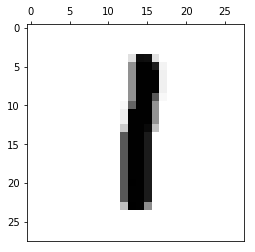

I PREDICT:  1
REAL VALUE:  1



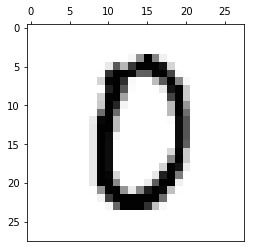

I PREDICT:  0
REAL VALUE:  0



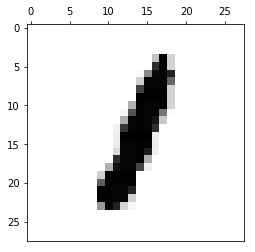

I PREDICT:  1
REAL VALUE:  1



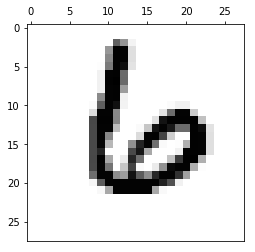

I PREDICT:  6
REAL VALUE:  6



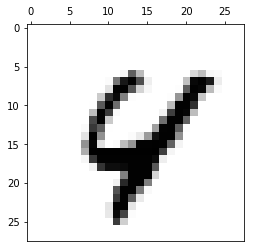

I PREDICT:  4
REAL VALUE:  4



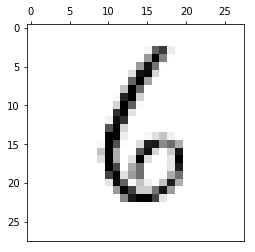

I PREDICT:  6
REAL VALUE:  6



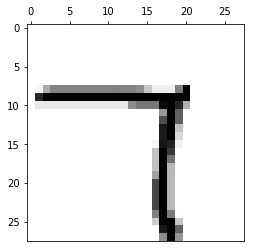

I PREDICT:  7
REAL VALUE:  7



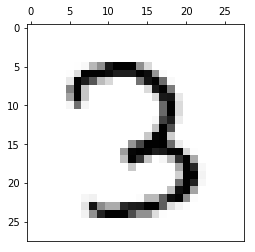

I PREDICT:  3
REAL VALUE:  3



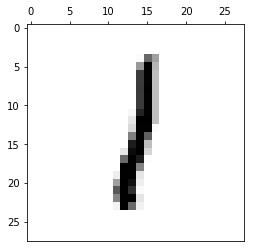

I PREDICT:  1
REAL VALUE:  1



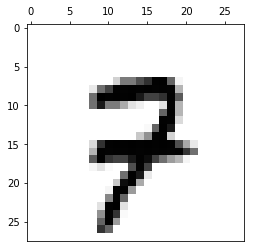

I PREDICT:  7
REAL VALUE:  7



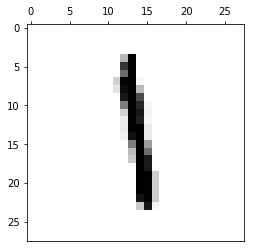

I PREDICT:  1
REAL VALUE:  1



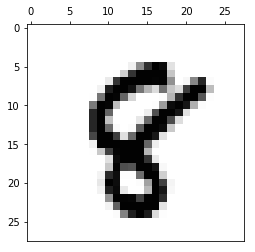

I PREDICT:  8
REAL VALUE:  8



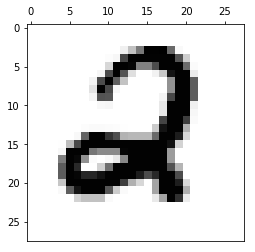

I PREDICT:  2
REAL VALUE:  2



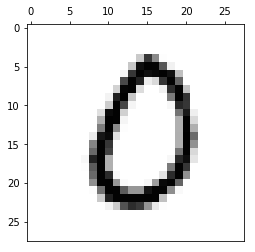

I PREDICT:  0
REAL VALUE:  0



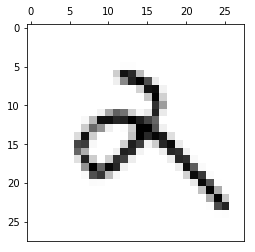

I PREDICT:  2
REAL VALUE:  2



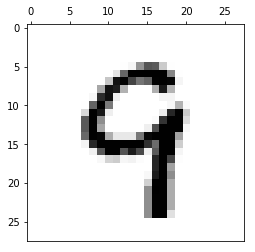

I PREDICT:  9
REAL VALUE:  9



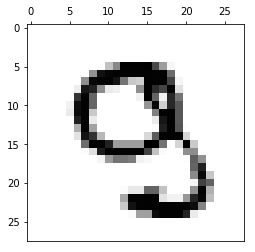

I PREDICT:  9
REAL VALUE:  9



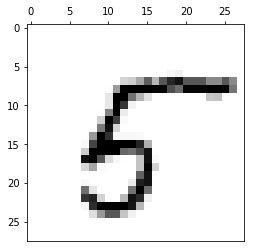

I PREDICT:  5
REAL VALUE:  5



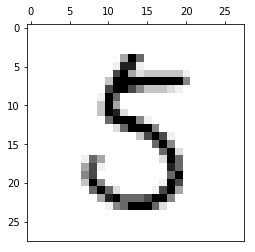

I PREDICT:  5
REAL VALUE:  5



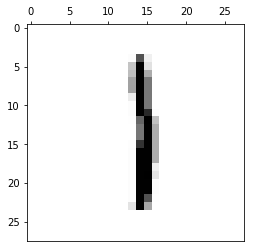

I PREDICT:  1
REAL VALUE:  1



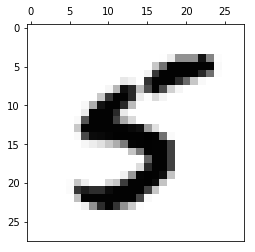

I PREDICT:  5
REAL VALUE:  5



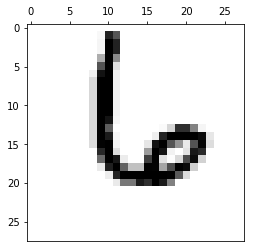

I PREDICT:  6
REAL VALUE:  6



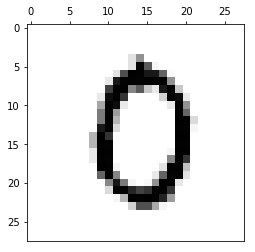

I PREDICT:  0
REAL VALUE:  0



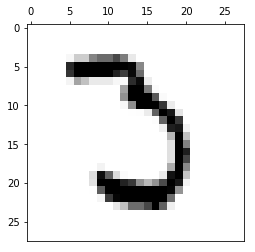

I PREDICT:  3
REAL VALUE:  3



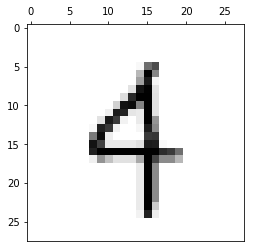

I PREDICT:  4
REAL VALUE:  4



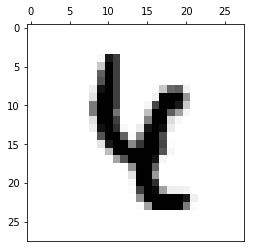

I PREDICT:  4
REAL VALUE:  4



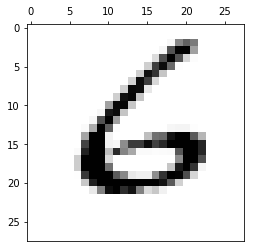

I PREDICT:  6
REAL VALUE:  6



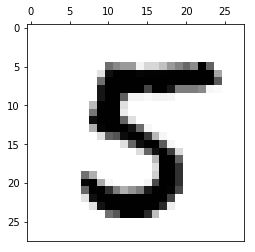

I PREDICT:  5
REAL VALUE:  5



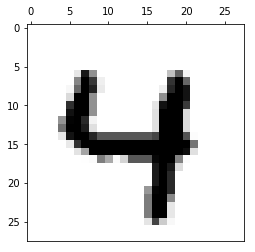

I PREDICT:  4
REAL VALUE:  4



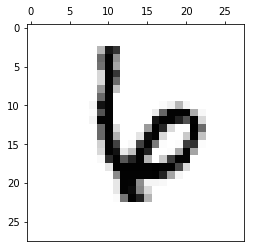

I PREDICT:  6
REAL VALUE:  6



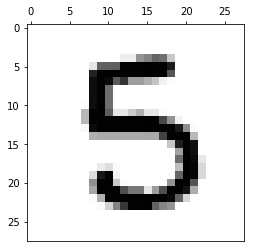

I PREDICT:  5
REAL VALUE:  5



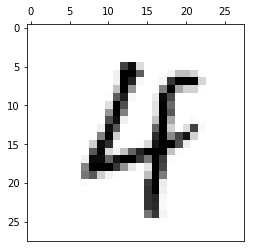

I PREDICT:  4
REAL VALUE:  4



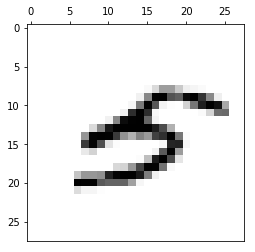

I PREDICT:  5
REAL VALUE:  5



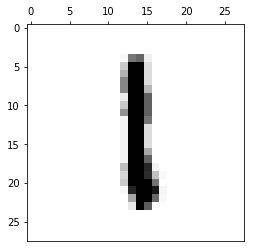

I PREDICT:  1
REAL VALUE:  1



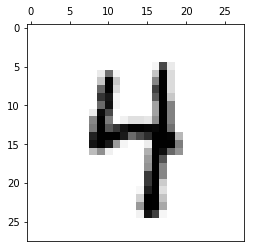

I PREDICT:  4
REAL VALUE:  4



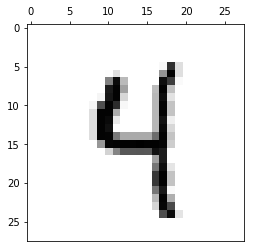

I PREDICT:  4
REAL VALUE:  4



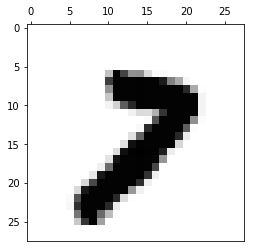

I PREDICT:  7
REAL VALUE:  7



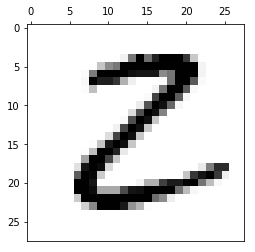

I PREDICT:  2
REAL VALUE:  2



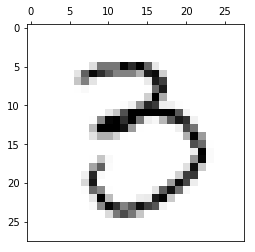

I PREDICT:  3
REAL VALUE:  3



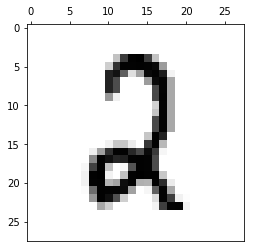

I PREDICT:  2
REAL VALUE:  2



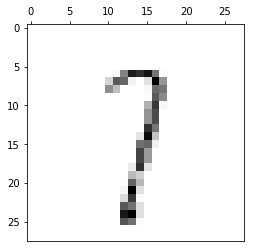

I PREDICT:  7
REAL VALUE:  7



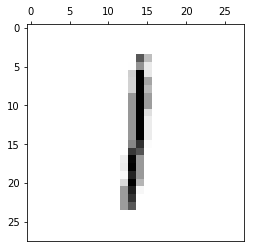

I PREDICT:  1
REAL VALUE:  1



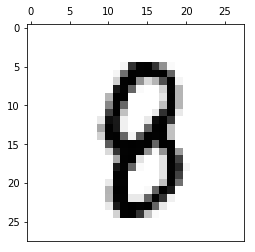

I PREDICT:  8
REAL VALUE:  8



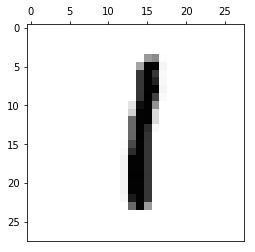

I PREDICT:  1
REAL VALUE:  1



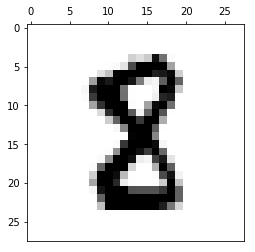

I PREDICT:  8
REAL VALUE:  8



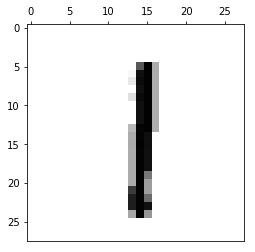

I PREDICT:  1
REAL VALUE:  1



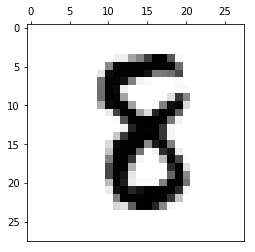

I PREDICT:  8
REAL VALUE:  8



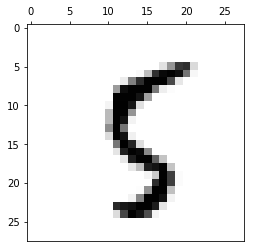

I PREDICT:  5
REAL VALUE:  5



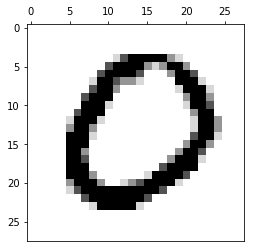

I PREDICT:  0
REAL VALUE:  0



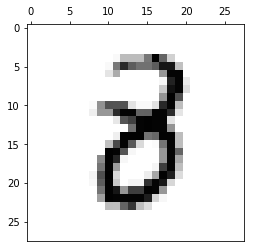

I PREDICT:  8
REAL VALUE:  8



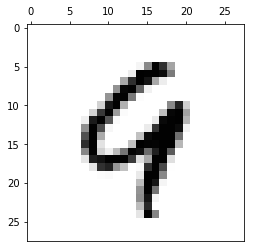

I PREDICT:  9
REAL VALUE:  9



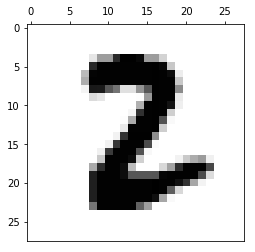

I PREDICT:  2
REAL VALUE:  2



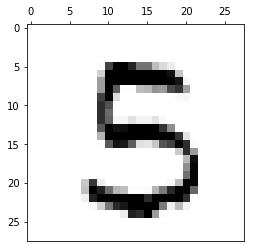

I PREDICT:  5
REAL VALUE:  5



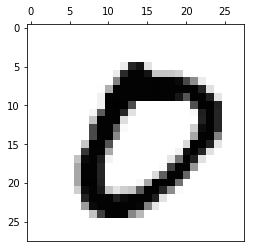

I PREDICT:  0
REAL VALUE:  0



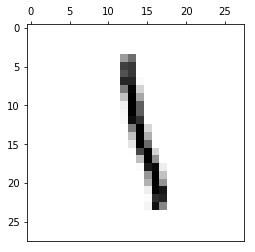

I PREDICT:  1
REAL VALUE:  1



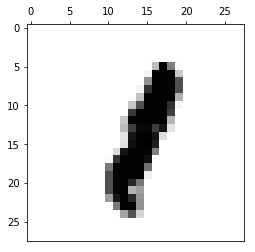

I PREDICT:  1
REAL VALUE:  1



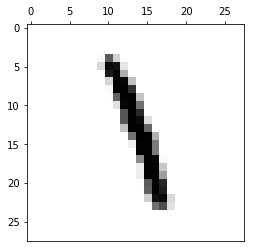

I PREDICT:  1
REAL VALUE:  1



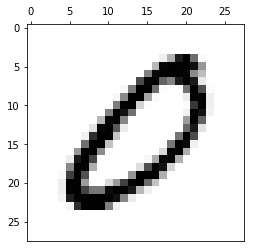

I PREDICT:  0
REAL VALUE:  0



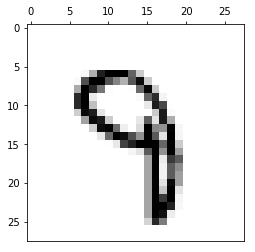

I PREDICT:  9
REAL VALUE:  9



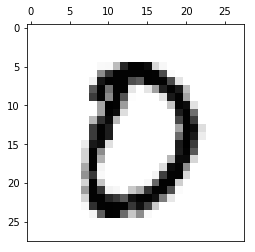

I PREDICT:  0
REAL VALUE:  0



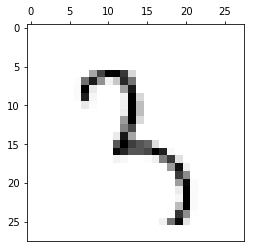

I PREDICT:  3
REAL VALUE:  3



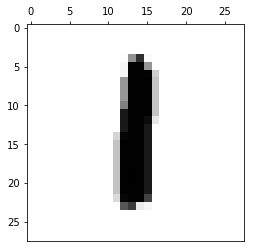

I PREDICT:  1
REAL VALUE:  1



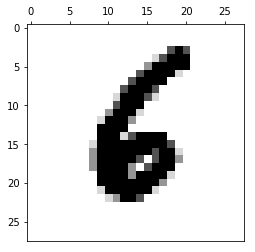

I PREDICT:  6
REAL VALUE:  6



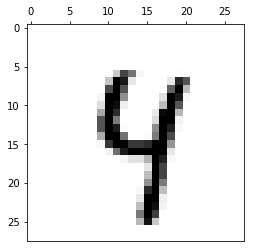

I PREDICT:  4
REAL VALUE:  4



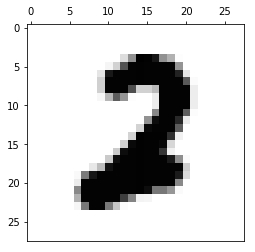

I PREDICT:  2
REAL VALUE:  2



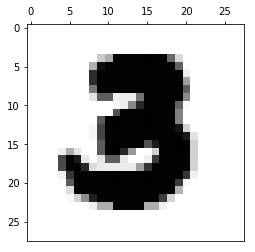

I PREDICT:  3
REAL VALUE:  3



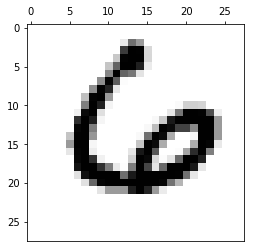

I PREDICT:  6
REAL VALUE:  6



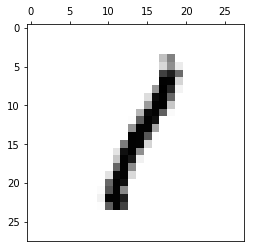

I PREDICT:  1
REAL VALUE:  1



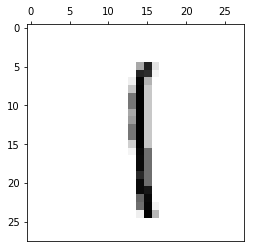

I PREDICT:  1
REAL VALUE:  1



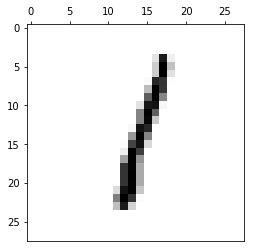

I PREDICT:  1
REAL VALUE:  1



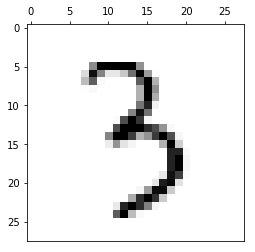

I PREDICT:  3
REAL VALUE:  3



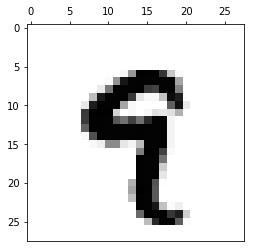

I PREDICT:  9
REAL VALUE:  9



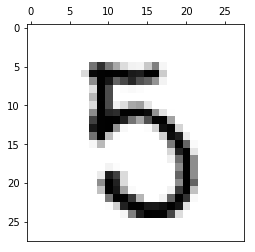

I PREDICT:  5
REAL VALUE:  5



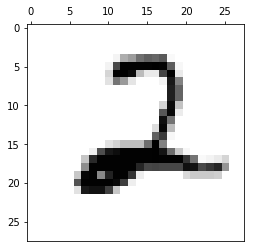

I PREDICT:  2
REAL VALUE:  2



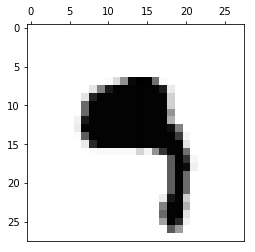

I PREDICT:  9
REAL VALUE:  9



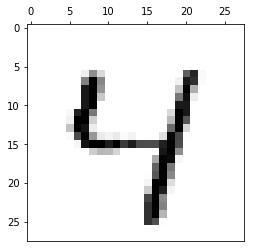

I PREDICT:  4
REAL VALUE:  4



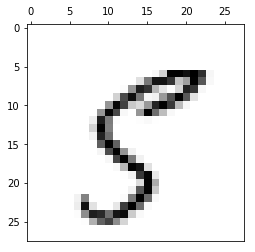

I PREDICT:  5
REAL VALUE:  5



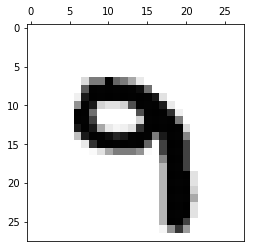

I PREDICT:  9
REAL VALUE:  9



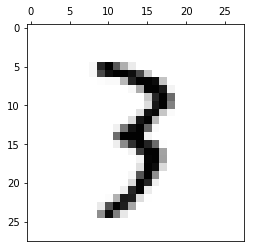

I PREDICT:  3
REAL VALUE:  3



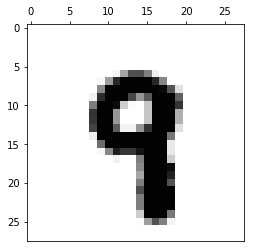

I PREDICT:  9
REAL VALUE:  9



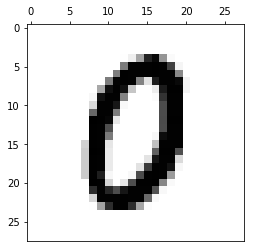

I PREDICT:  0
REAL VALUE:  0



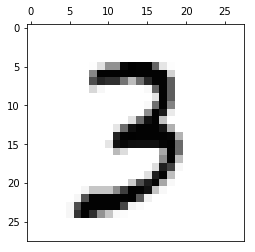

I PREDICT:  3
REAL VALUE:  3



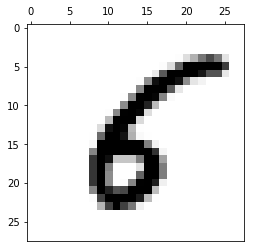

I PREDICT:  6
REAL VALUE:  6



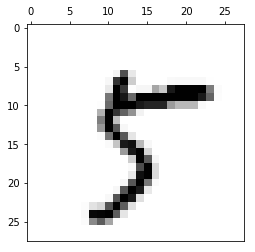

I PREDICT:  5
REAL VALUE:  5



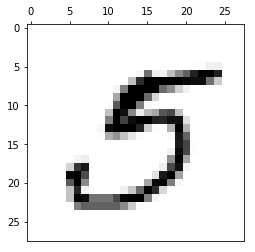

I PREDICT:  5
REAL VALUE:  5



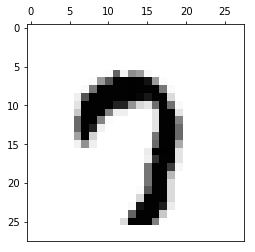

I PREDICT:  7
REAL VALUE:  7



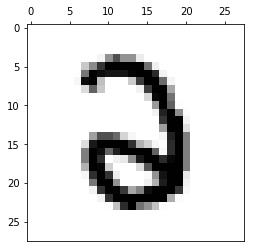

I PREDICT:  2
REAL VALUE:  2



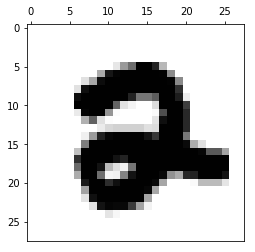

I PREDICT:  2
REAL VALUE:  2



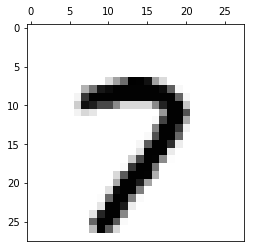

I PREDICT:  7
REAL VALUE:  7



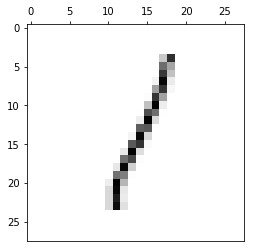

I PREDICT:  1
REAL VALUE:  1



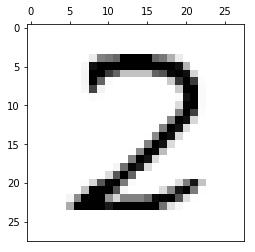

I PREDICT:  2
REAL VALUE:  2



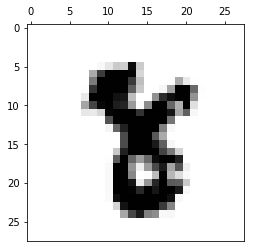

I PREDICT:  8
REAL VALUE:  8



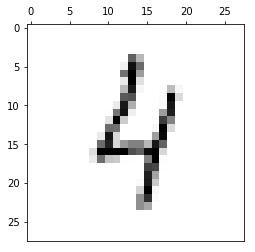

I PREDICT:  4
REAL VALUE:  4



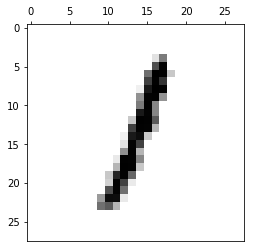

I PREDICT:  1
REAL VALUE:  1



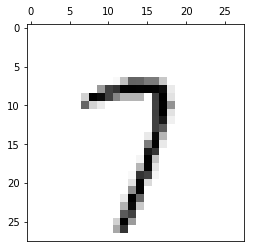

I PREDICT:  7
REAL VALUE:  7



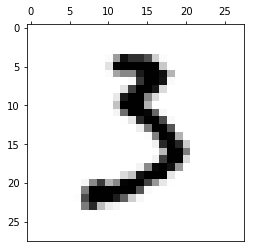

I PREDICT:  3
REAL VALUE:  3



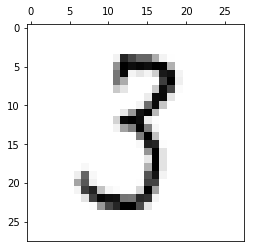

I PREDICT:  3
REAL VALUE:  3



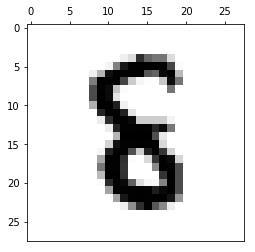

I PREDICT:  8
REAL VALUE:  8



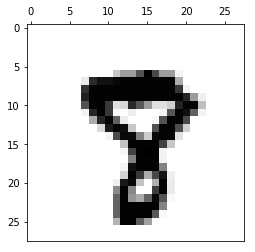

I PREDICT:  8
REAL VALUE:  8



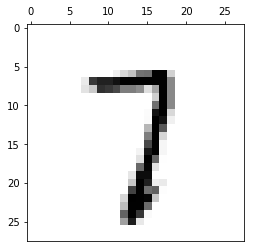

I PREDICT:  7
REAL VALUE:  7



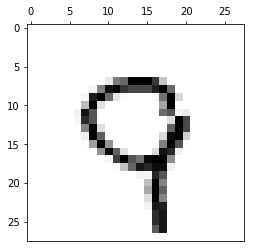

I PREDICT:  9
REAL VALUE:  9



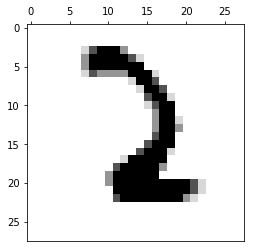

I PREDICT:  2
REAL VALUE:  2



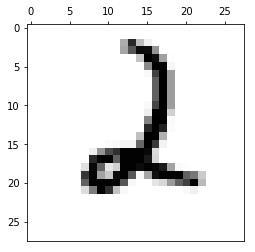

I PREDICT:  2
REAL VALUE:  2



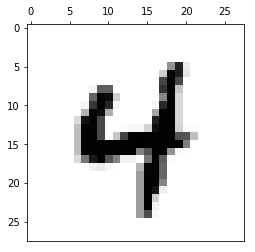

I PREDICT:  4
REAL VALUE:  4



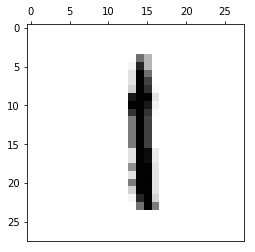

I PREDICT:  1
REAL VALUE:  1



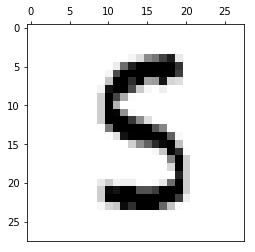

I PREDICT:  5
REAL VALUE:  5



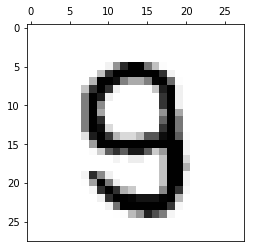

I PREDICT:  9
REAL VALUE:  9



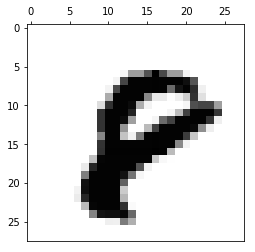

I PREDICT:  8
REAL VALUE:  8



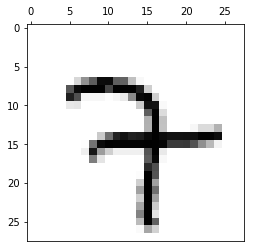

I PREDICT:  7
REAL VALUE:  7



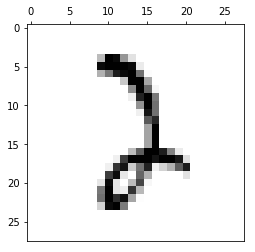

I PREDICT:  2
REAL VALUE:  2



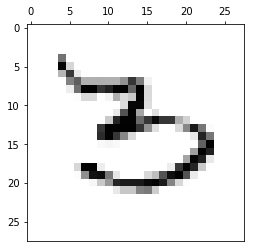

I PREDICT:  3
REAL VALUE:  3



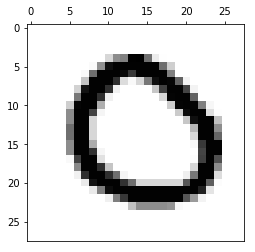

I PREDICT:  0
REAL VALUE:  0



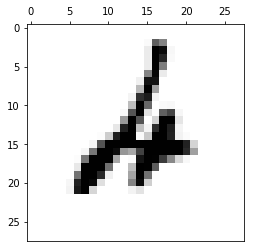

I PREDICT:  4
REAL VALUE:  4



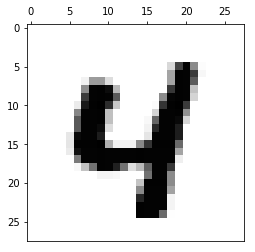

I PREDICT:  4
REAL VALUE:  4



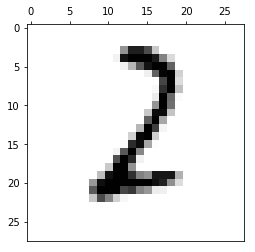

I PREDICT:  2
REAL VALUE:  2



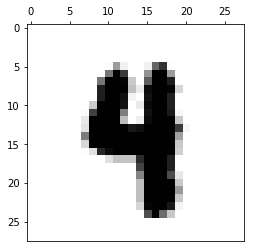

I PREDICT:  4
REAL VALUE:  4



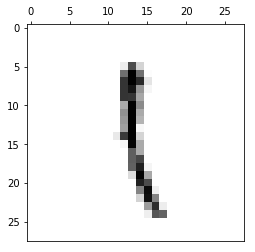

I PREDICT:  1
REAL VALUE:  1



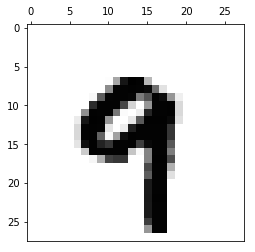

I PREDICT:  9
REAL VALUE:  9



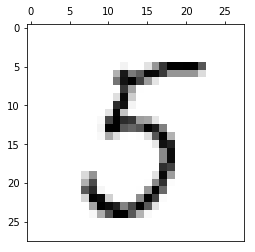

I PREDICT:  5
REAL VALUE:  5



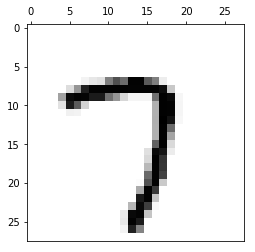

I PREDICT:  7
REAL VALUE:  7



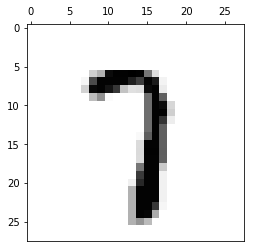

I PREDICT:  7
REAL VALUE:  7



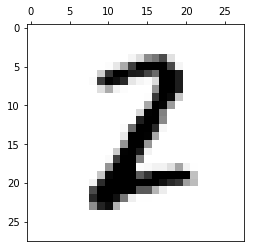

I PREDICT:  2
REAL VALUE:  2



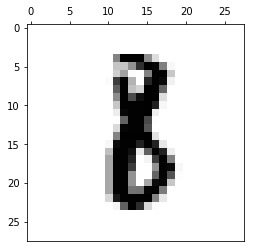

I PREDICT:  8
REAL VALUE:  8



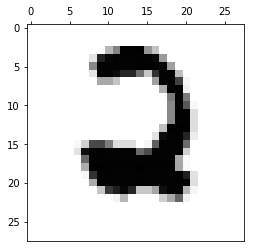

I PREDICT:  2
REAL VALUE:  2



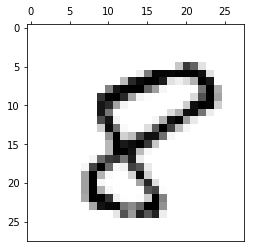

I PREDICT:  8
REAL VALUE:  8



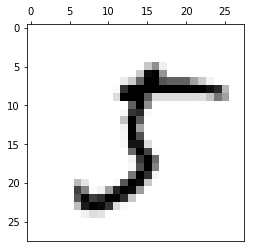

I PREDICT:  5
REAL VALUE:  5



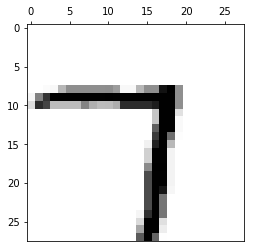

I PREDICT:  7
REAL VALUE:  7



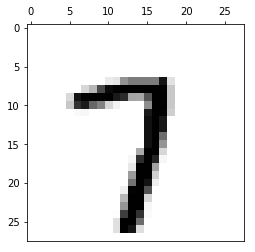

I PREDICT:  7
REAL VALUE:  7



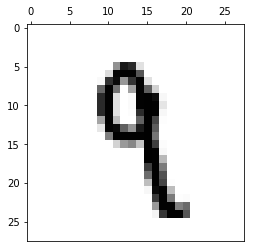

I PREDICT:  9
REAL VALUE:  9



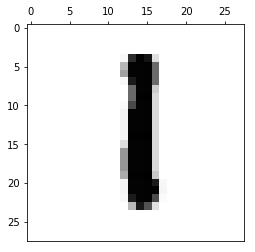

I PREDICT:  1
REAL VALUE:  1



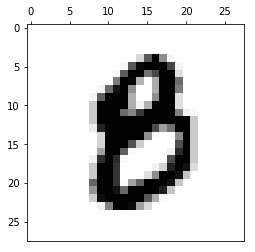

I PREDICT:  8
REAL VALUE:  8



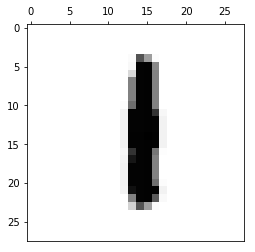

I PREDICT:  1
REAL VALUE:  1



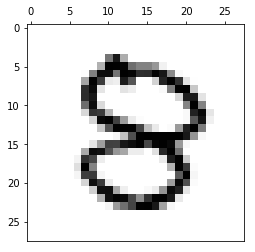

I PREDICT:  8
REAL VALUE:  8



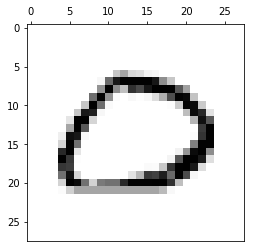

I PREDICT:  0
REAL VALUE:  0



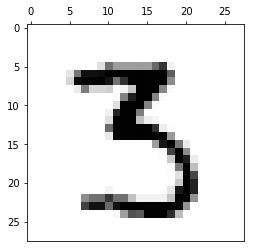

I PREDICT:  3
REAL VALUE:  3



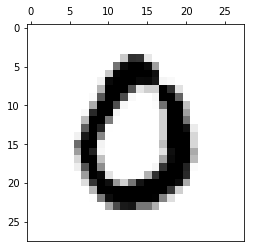

I PREDICT:  0
REAL VALUE:  0



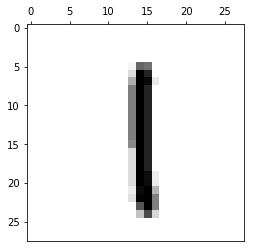

I PREDICT:  1
REAL VALUE:  1



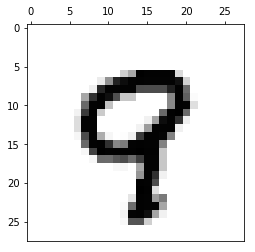

I PREDICT:  9
REAL VALUE:  9



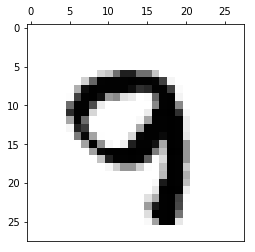

I PREDICT:  9
REAL VALUE:  9



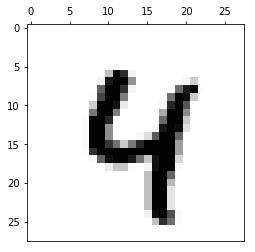

I PREDICT:  4
REAL VALUE:  4



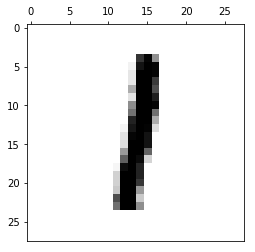

I PREDICT:  1
REAL VALUE:  1



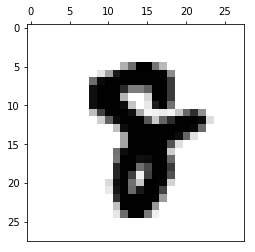

I PREDICT:  8
REAL VALUE:  8



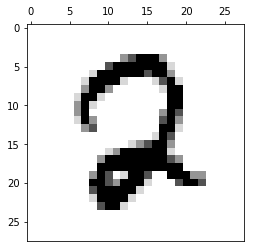

I PREDICT:  2
REAL VALUE:  2



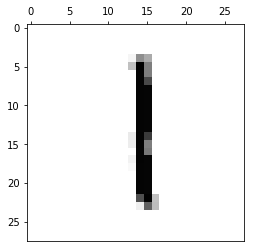

I PREDICT:  1
REAL VALUE:  1



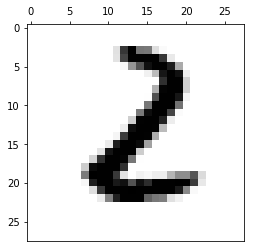

I PREDICT:  2
REAL VALUE:  2



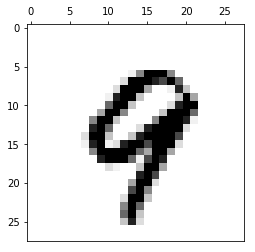

I PREDICT:  9
REAL VALUE:  9



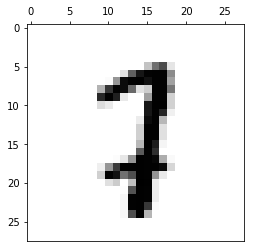

I PREDICT:  7
REAL VALUE:  7



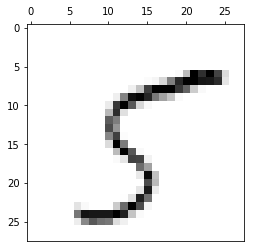

I PREDICT:  5
REAL VALUE:  5



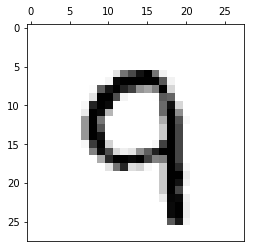

I PREDICT:  9
REAL VALUE:  9



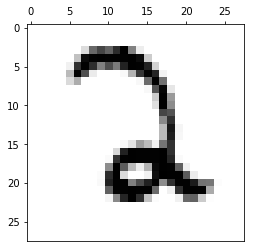

I PREDICT:  2
REAL VALUE:  2



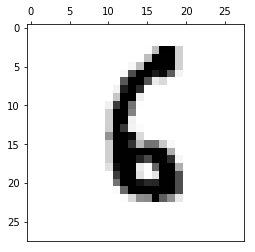

I PREDICT:  6
REAL VALUE:  6



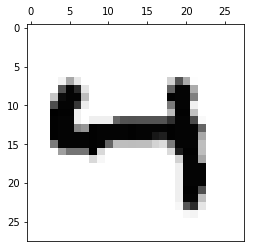

I PREDICT:  4
REAL VALUE:  4



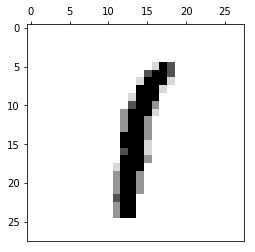

I PREDICT:  1
REAL VALUE:  1



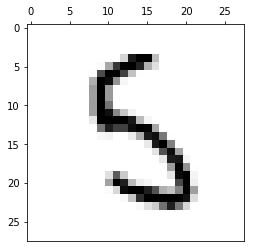

I PREDICT:  5
REAL VALUE:  5



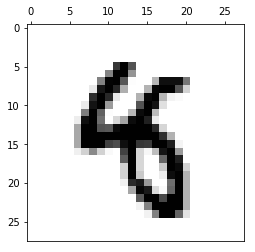

I PREDICT:  8
REAL VALUE:  8



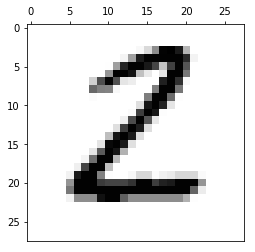

I PREDICT:  2
REAL VALUE:  2



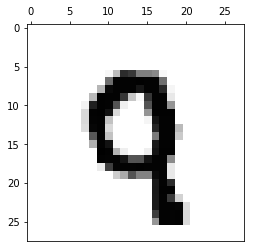

I PREDICT:  9
REAL VALUE:  9



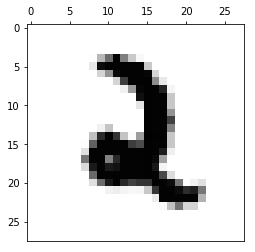

I PREDICT:  2
REAL VALUE:  2



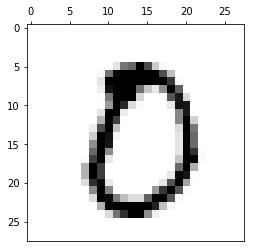

I PREDICT:  0
REAL VALUE:  0



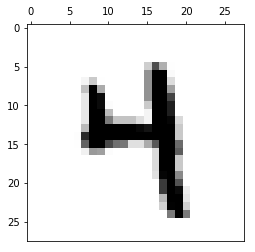

I PREDICT:  4
REAL VALUE:  4



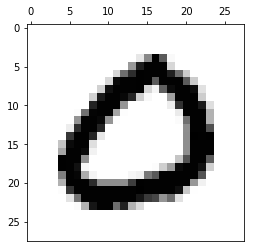

I PREDICT:  0
REAL VALUE:  0



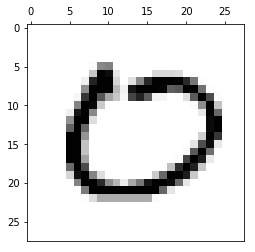

I PREDICT:  0
REAL VALUE:  0



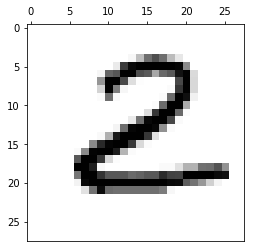

I PREDICT:  2
REAL VALUE:  2



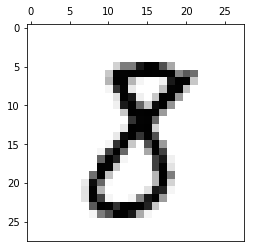

I PREDICT:  8
REAL VALUE:  8



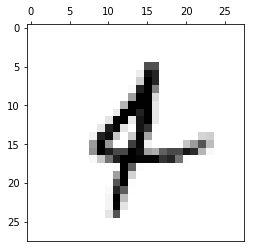

I PREDICT:  4
REAL VALUE:  4



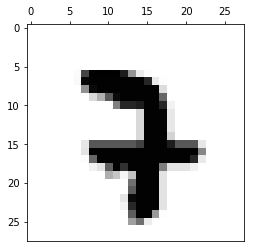

I PREDICT:  7
REAL VALUE:  7



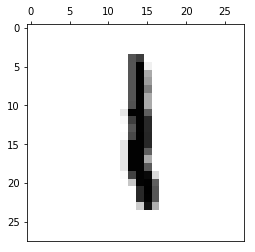

I PREDICT:  1
REAL VALUE:  1



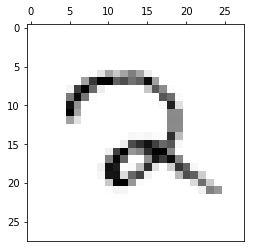

I PREDICT:  2
REAL VALUE:  2



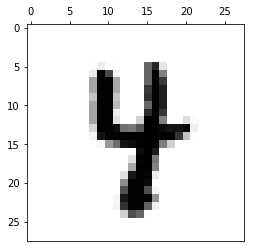

I PREDICT:  4
REAL VALUE:  4



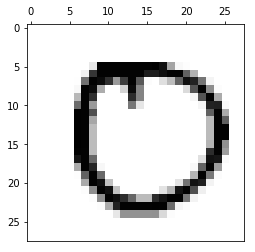

I PREDICT:  0
REAL VALUE:  0



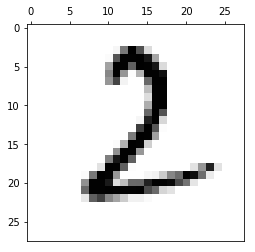

I PREDICT:  2
REAL VALUE:  2



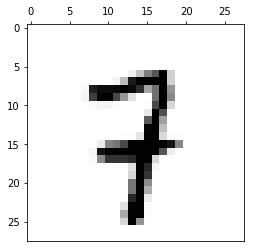

I PREDICT:  7
REAL VALUE:  7



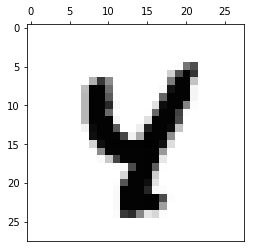

I PREDICT:  4
REAL VALUE:  4



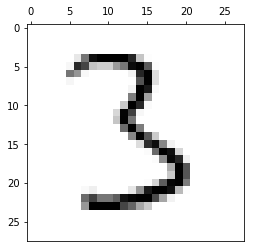

I PREDICT:  3
REAL VALUE:  3



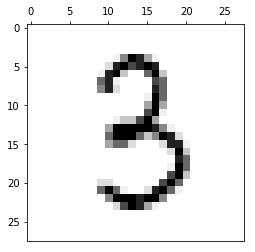

I PREDICT:  3
REAL VALUE:  3



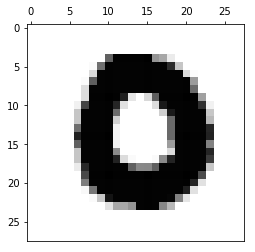

I PREDICT:  0
REAL VALUE:  0



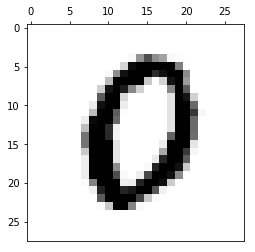

I PREDICT:  0
REAL VALUE:  0



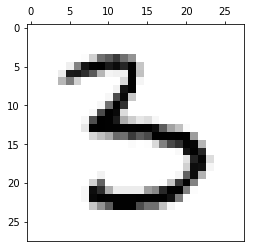

I PREDICT:  3
REAL VALUE:  3



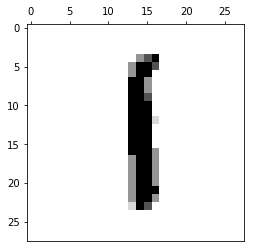

I PREDICT:  1
REAL VALUE:  1



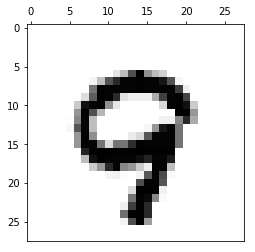

I PREDICT:  9
REAL VALUE:  9



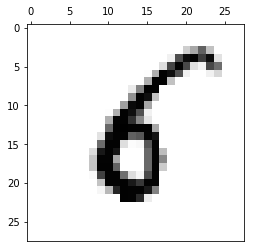

I PREDICT:  6
REAL VALUE:  6



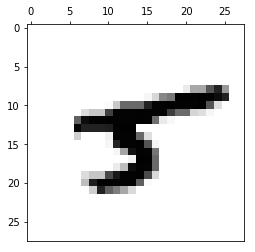

I PREDICT:  5
REAL VALUE:  5



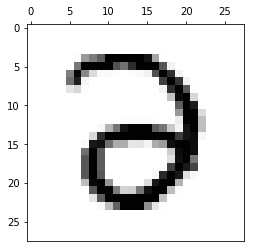

I PREDICT:  2
REAL VALUE:  2



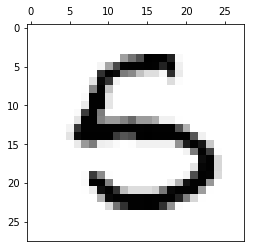

I PREDICT:  5
REAL VALUE:  5



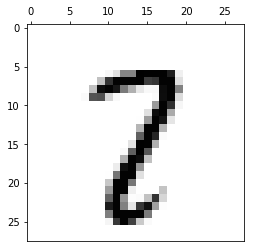

I PREDICT:  2
REAL VALUE:  2



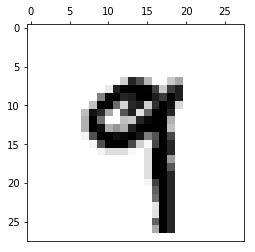

I PREDICT:  9
REAL VALUE:  9



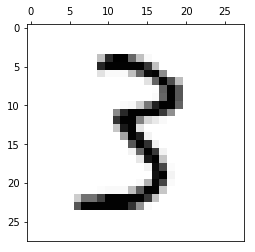

I PREDICT:  3
REAL VALUE:  3



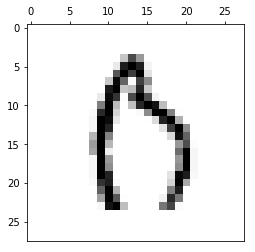

I PREDICT:  0
REAL VALUE:  0



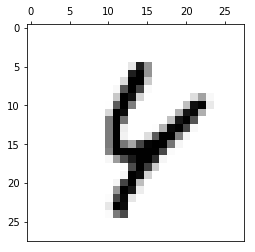

I PREDICT:  4
REAL VALUE:  4



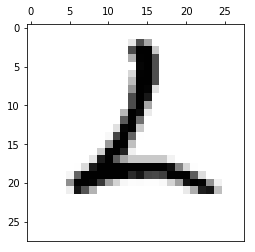

I PREDICT:  2
REAL VALUE:  2



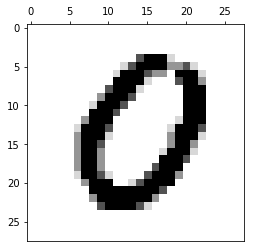

I PREDICT:  0
REAL VALUE:  0



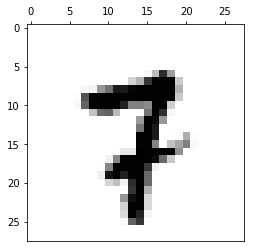

I PREDICT:  7
REAL VALUE:  7



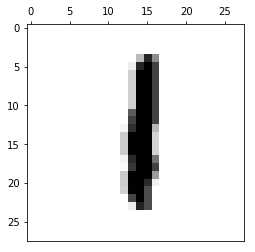

I PREDICT:  1
REAL VALUE:  1



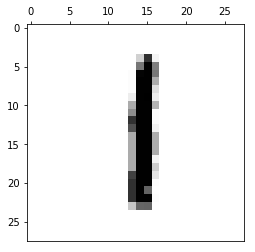

I PREDICT:  1
REAL VALUE:  1



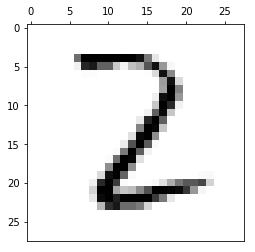

I PREDICT:  2
REAL VALUE:  2



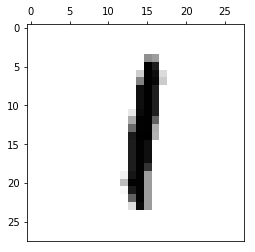

I PREDICT:  1
REAL VALUE:  1



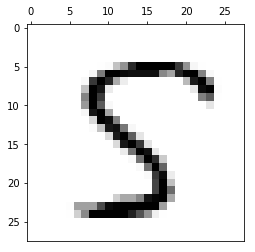

I PREDICT:  5
REAL VALUE:  5



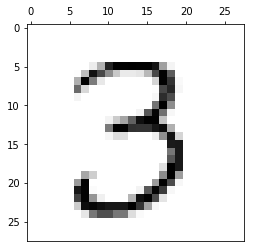

I PREDICT:  3
REAL VALUE:  3



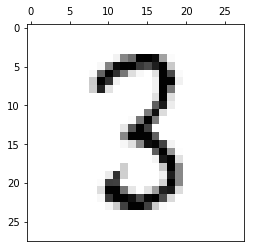

I PREDICT:  3
REAL VALUE:  3



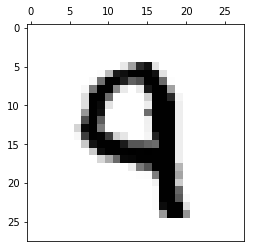

I PREDICT:  9
REAL VALUE:  9



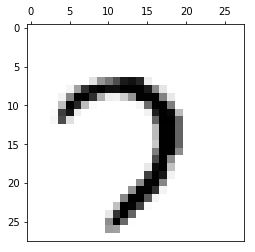

I PREDICT:  7
REAL VALUE:  7



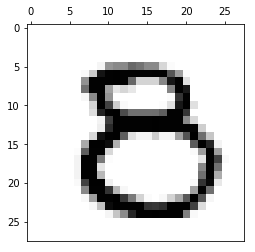

I PREDICT:  8
REAL VALUE:  8



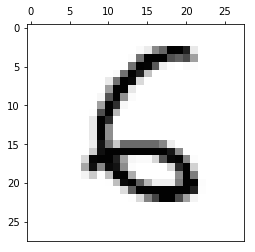

I PREDICT:  6
REAL VALUE:  6



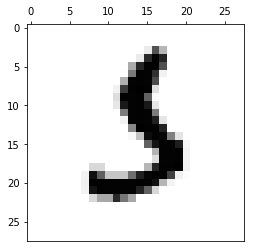

I PREDICT:  5
REAL VALUE:  5



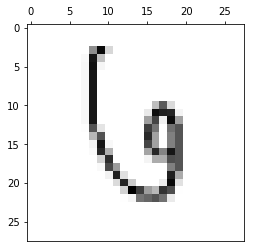

I PREDICT:  6
REAL VALUE:  6



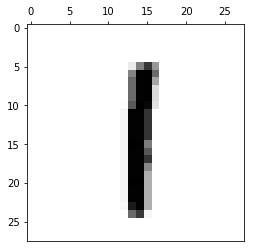

I PREDICT:  1
REAL VALUE:  1



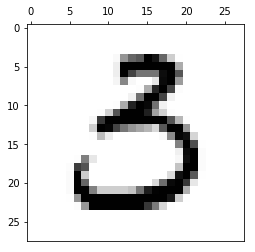

I PREDICT:  3
REAL VALUE:  3



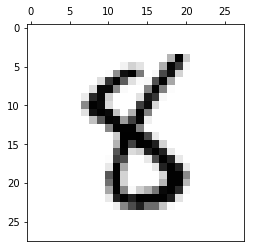

I PREDICT:  8
REAL VALUE:  8



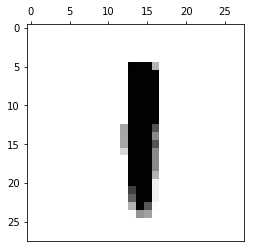

I PREDICT:  1
REAL VALUE:  1



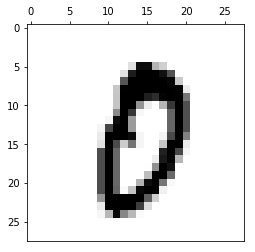

I PREDICT:  0
REAL VALUE:  0



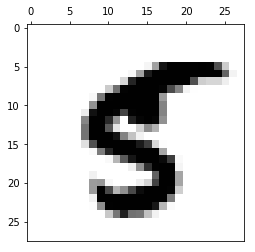

I PREDICT:  5
REAL VALUE:  5



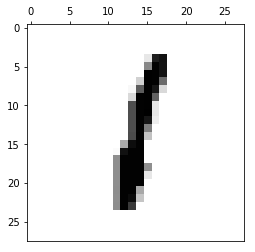

I PREDICT:  1
REAL VALUE:  1



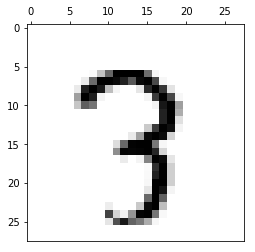

I PREDICT:  3
REAL VALUE:  3



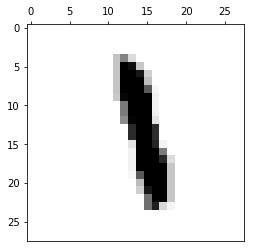

I PREDICT:  1
REAL VALUE:  1



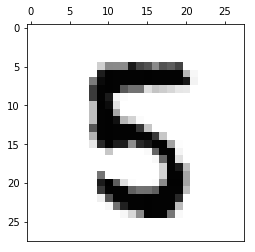

I PREDICT:  5
REAL VALUE:  5



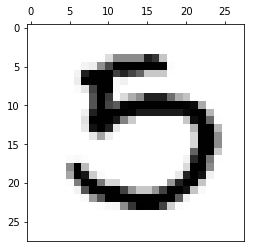

I PREDICT:  5
REAL VALUE:  5



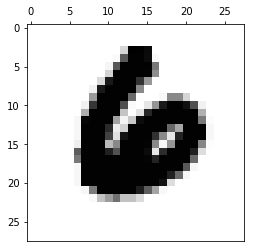

I PREDICT:  6
REAL VALUE:  6



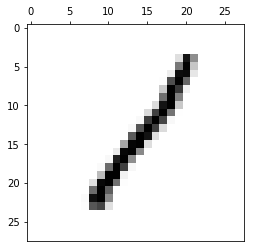

I PREDICT:  1
REAL VALUE:  1



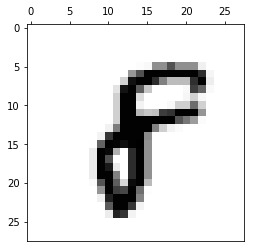

I PREDICT:  8
REAL VALUE:  8



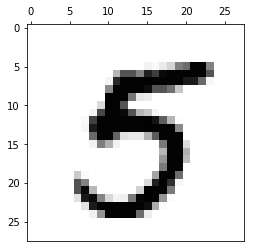

I PREDICT:  5
REAL VALUE:  5



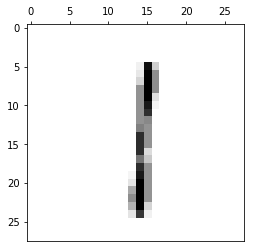

I PREDICT:  1
REAL VALUE:  1



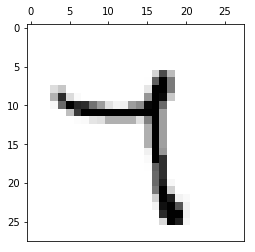

I PREDICT:  7
REAL VALUE:  7



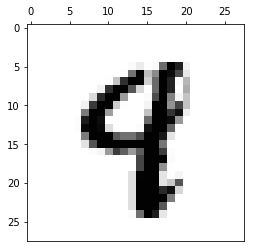

I PREDICT:  9
REAL VALUE:  9



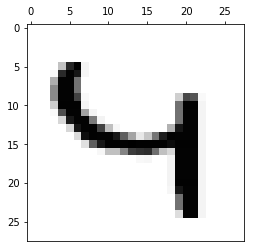

I PREDICT:  4
REAL VALUE:  4



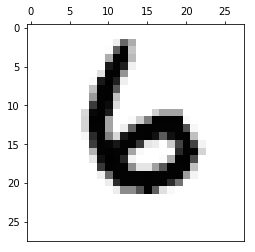

I PREDICT:  6
REAL VALUE:  6



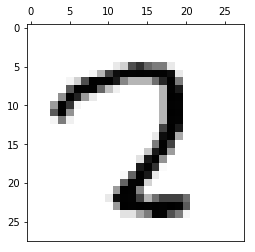

I PREDICT:  2
REAL VALUE:  2



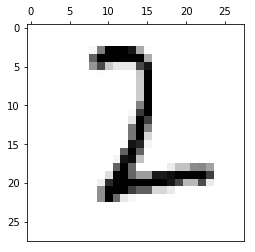

I PREDICT:  2
REAL VALUE:  2



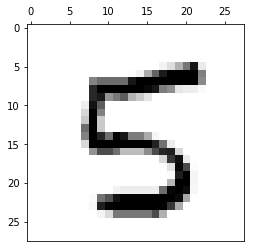

I PREDICT:  5
REAL VALUE:  5



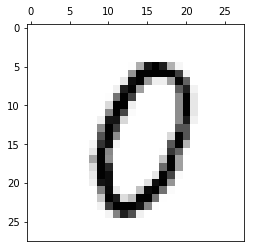

I PREDICT:  0
REAL VALUE:  0



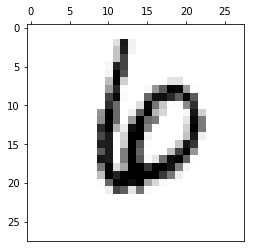

I PREDICT:  6
REAL VALUE:  6



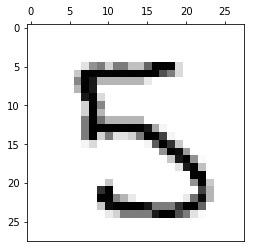

I PREDICT:  5
REAL VALUE:  5



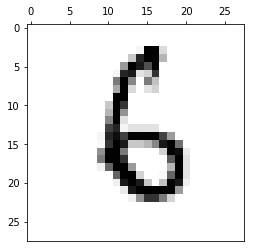

I PREDICT:  6
REAL VALUE:  6



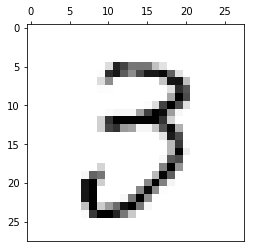

I PREDICT:  3
REAL VALUE:  3



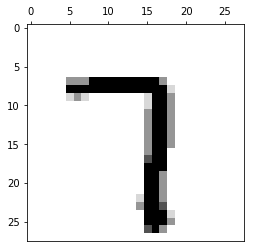

I PREDICT:  7
REAL VALUE:  7



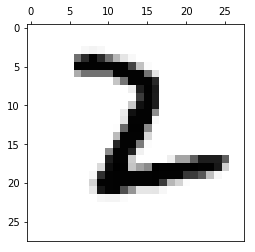

I PREDICT:  2
REAL VALUE:  2



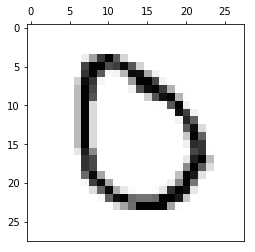

I PREDICT:  0
REAL VALUE:  0



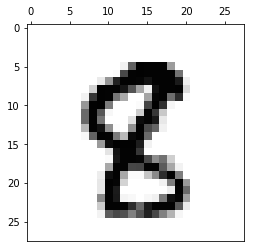

I PREDICT:  8
REAL VALUE:  8



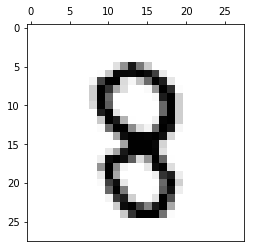

I PREDICT:  8
REAL VALUE:  8



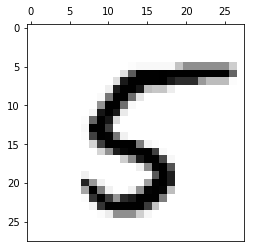

I PREDICT:  5
REAL VALUE:  5



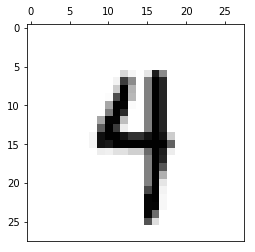

I PREDICT:  4
REAL VALUE:  4



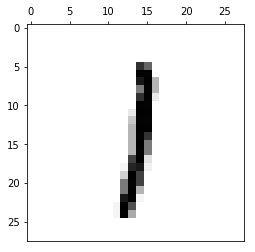

I PREDICT:  1
REAL VALUE:  1



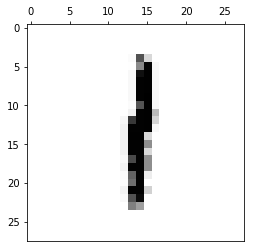

I PREDICT:  1
REAL VALUE:  1



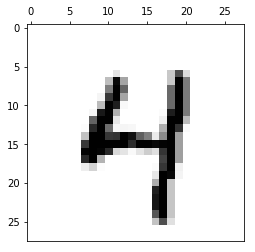

I PREDICT:  4
REAL VALUE:  4



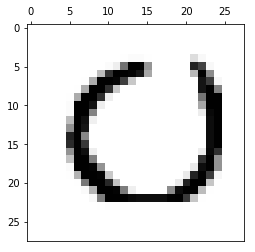

I PREDICT:  0
REAL VALUE:  0



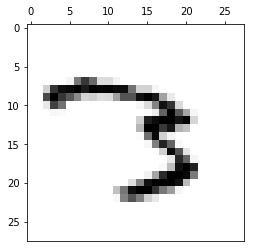

I PREDICT:  3
REAL VALUE:  3



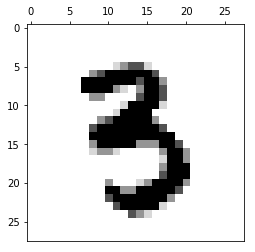

I PREDICT:  3
REAL VALUE:  3



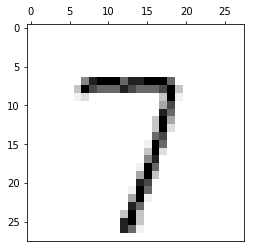

I PREDICT:  7
REAL VALUE:  7



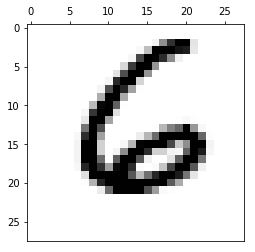

I PREDICT:  6
REAL VALUE:  6



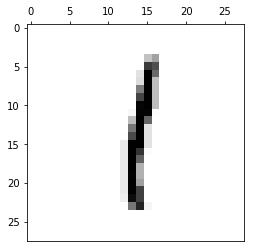

I PREDICT:  1
REAL VALUE:  1



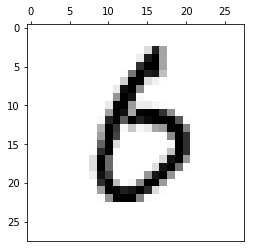

I PREDICT:  6
REAL VALUE:  6



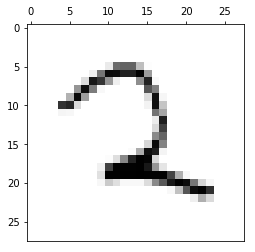

I PREDICT:  2
REAL VALUE:  2



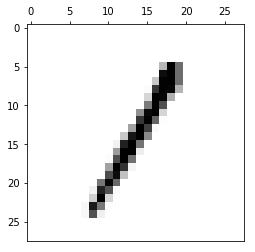

I PREDICT:  1
REAL VALUE:  1



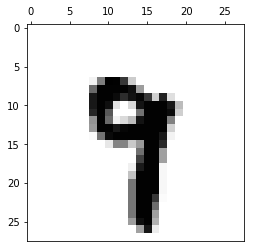

I PREDICT:  9
REAL VALUE:  9



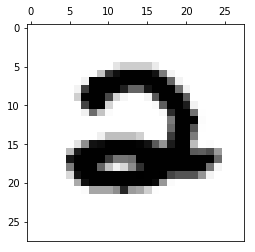

I PREDICT:  2
REAL VALUE:  2



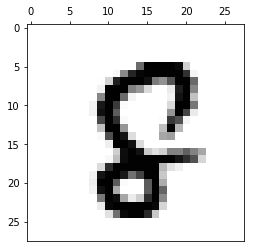

I PREDICT:  8
REAL VALUE:  8



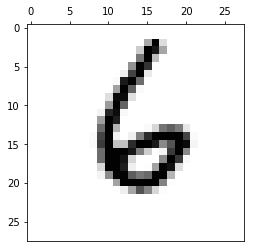

I PREDICT:  6
REAL VALUE:  6



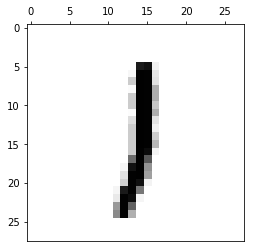

I PREDICT:  1
REAL VALUE:  1



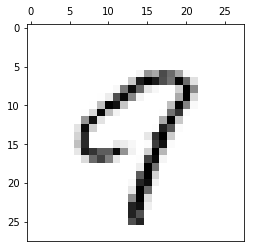

I PREDICT:  9
REAL VALUE:  9



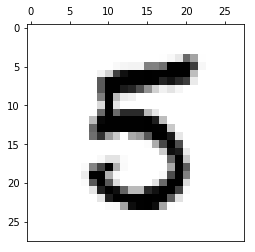

I PREDICT:  5
REAL VALUE:  5



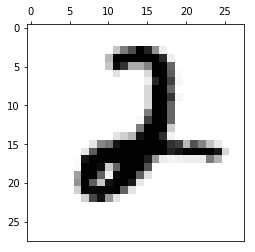

I PREDICT:  2
REAL VALUE:  2



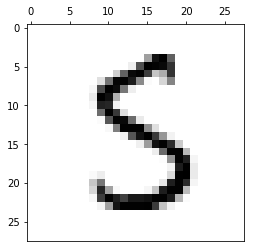

I PREDICT:  5
REAL VALUE:  5



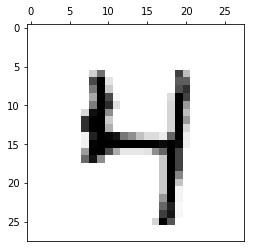

I PREDICT:  4
REAL VALUE:  4



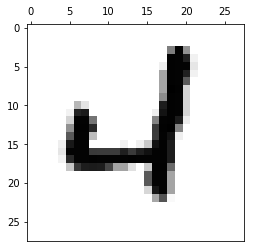

I PREDICT:  4
REAL VALUE:  4



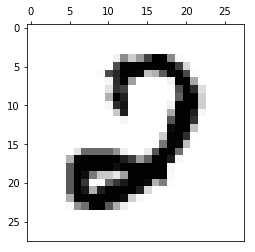

I PREDICT:  2
REAL VALUE:  2



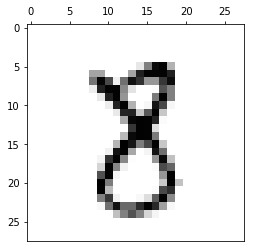

I PREDICT:  8
REAL VALUE:  8



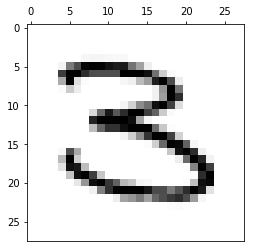

I PREDICT:  3
REAL VALUE:  3



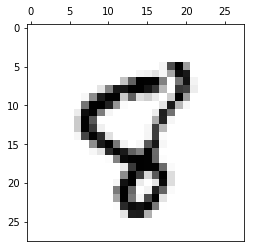

I PREDICT:  8
REAL VALUE:  8



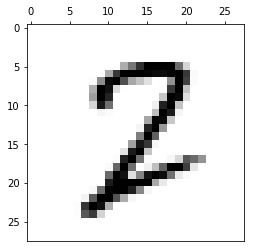

I PREDICT:  2
REAL VALUE:  2



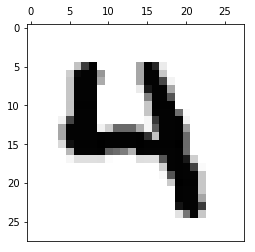

I PREDICT:  4
REAL VALUE:  4



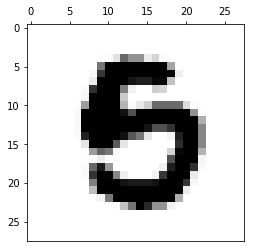

I PREDICT:  5
REAL VALUE:  5



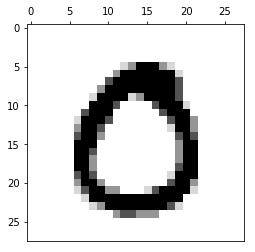

I PREDICT:  0
REAL VALUE:  0



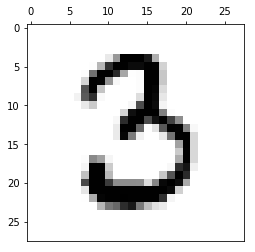

I PREDICT:  3
REAL VALUE:  3



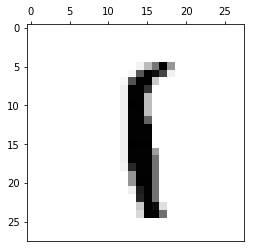

I PREDICT:  1
REAL VALUE:  1



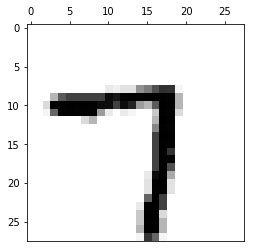

I PREDICT:  7
REAL VALUE:  7



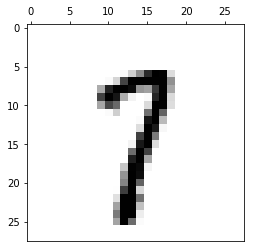

I PREDICT:  7
REAL VALUE:  7



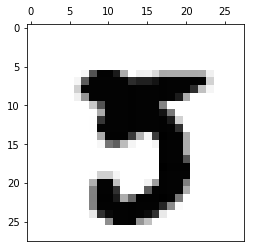

I PREDICT:  5
REAL VALUE:  5



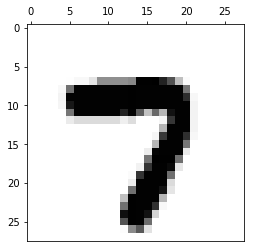

I PREDICT:  7
REAL VALUE:  7



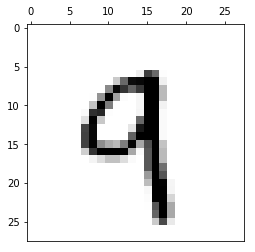

I PREDICT:  9
REAL VALUE:  9



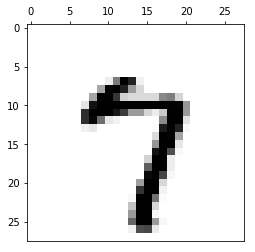

I PREDICT:  7
REAL VALUE:  7



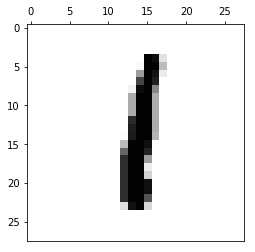

I PREDICT:  1
REAL VALUE:  1



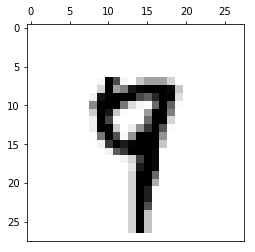

I PREDICT:  9
REAL VALUE:  9



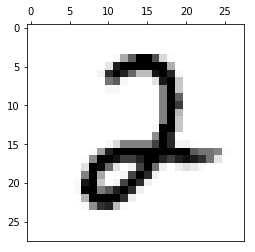

I PREDICT:  2
REAL VALUE:  2



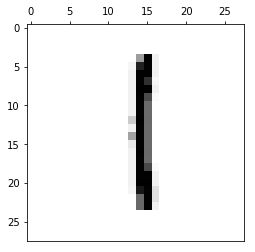

I PREDICT:  1
REAL VALUE:  1



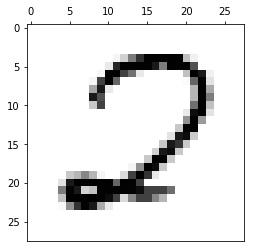

I PREDICT:  2
REAL VALUE:  2



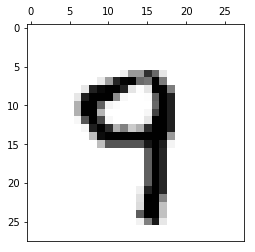

I PREDICT:  9
REAL VALUE:  9



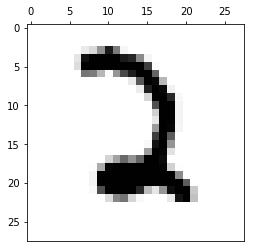

I PREDICT:  2
REAL VALUE:  2



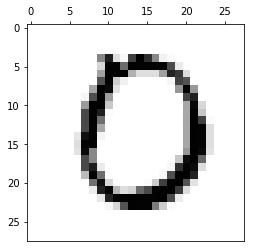

I PREDICT:  0
REAL VALUE:  0



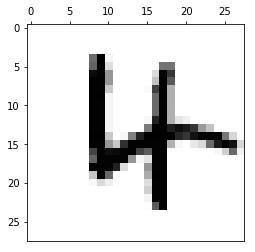

I PREDICT:  4
REAL VALUE:  4



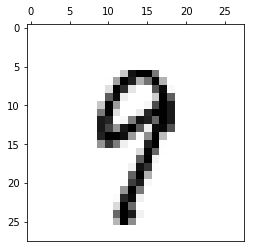

I PREDICT:  9
REAL VALUE:  9



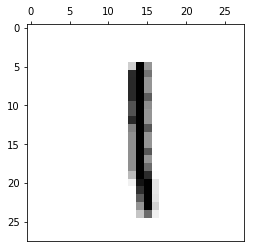

I PREDICT:  1
REAL VALUE:  1



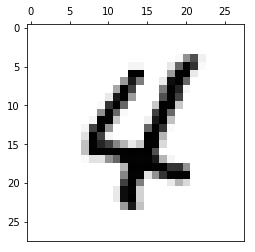

I PREDICT:  4
REAL VALUE:  4



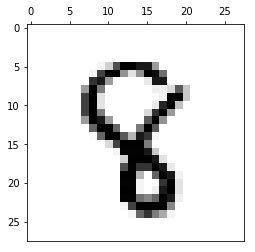

I PREDICT:  8
REAL VALUE:  8



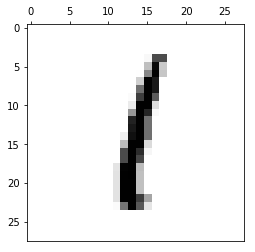

I PREDICT:  1
REAL VALUE:  1



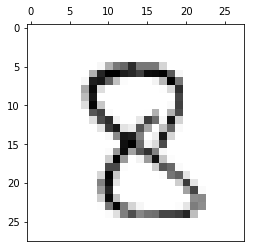

I PREDICT:  8
REAL VALUE:  8



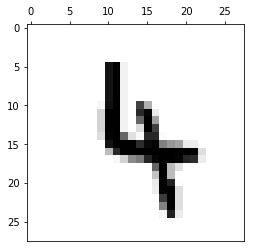

I PREDICT:  4
REAL VALUE:  4



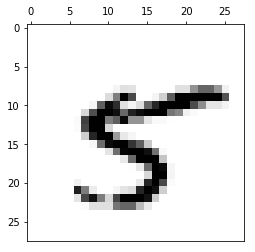

I PREDICT:  5
REAL VALUE:  5



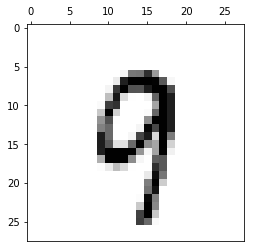

I PREDICT:  9
REAL VALUE:  9



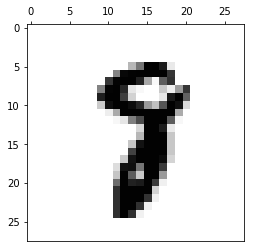

I PREDICT:  8
REAL VALUE:  8



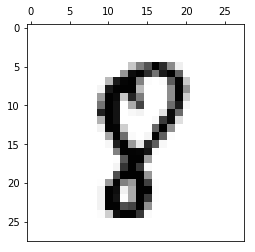

I PREDICT:  8
REAL VALUE:  8



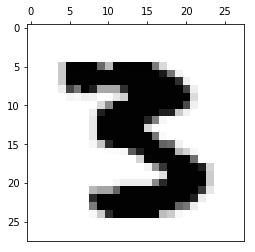

I PREDICT:  3
REAL VALUE:  3



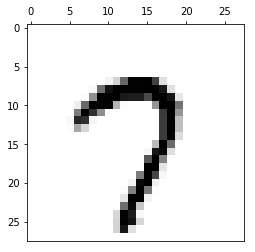

I PREDICT:  7
REAL VALUE:  7



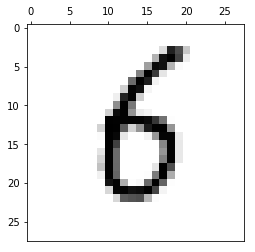

I PREDICT:  6
REAL VALUE:  6



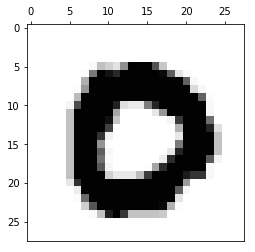

I PREDICT:  0
REAL VALUE:  0



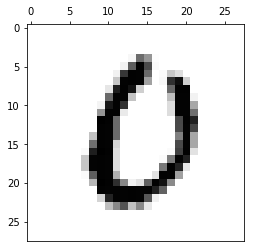

I PREDICT:  0
REAL VALUE:  0



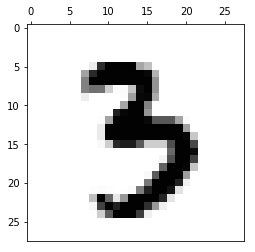

I PREDICT:  3
REAL VALUE:  3



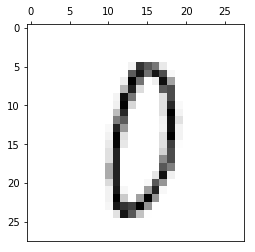

I PREDICT:  0
REAL VALUE:  0



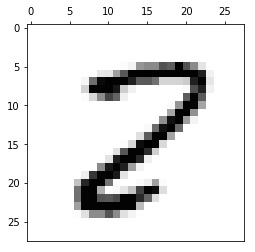

I PREDICT:  2
REAL VALUE:  2



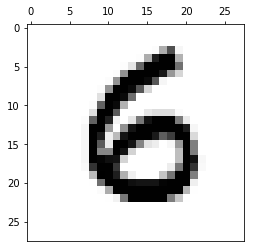

I PREDICT:  6
REAL VALUE:  6



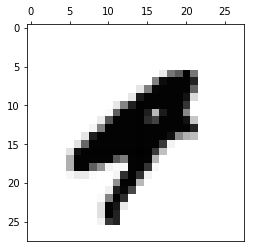

I PREDICT:  4
REAL VALUE:  4



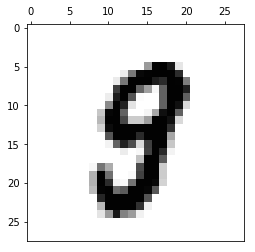

I PREDICT:  9
REAL VALUE:  9



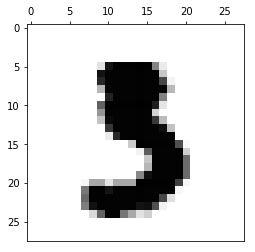

I PREDICT:  3
REAL VALUE:  3



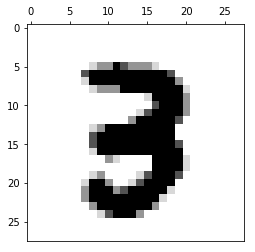

I PREDICT:  3
REAL VALUE:  3



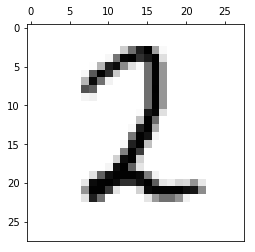

I PREDICT:  2
REAL VALUE:  2



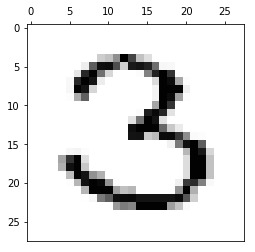

I PREDICT:  3
REAL VALUE:  3



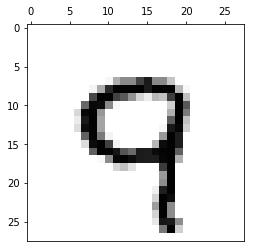

I PREDICT:  9
REAL VALUE:  9



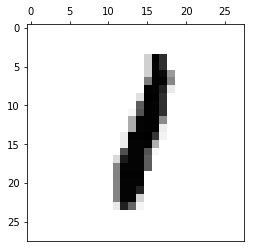

I PREDICT:  1
REAL VALUE:  1



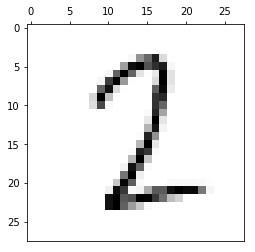

I PREDICT:  2
REAL VALUE:  2



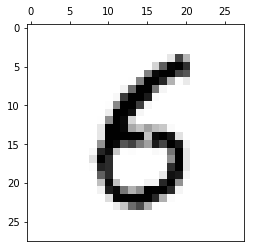

I PREDICT:  6
REAL VALUE:  6



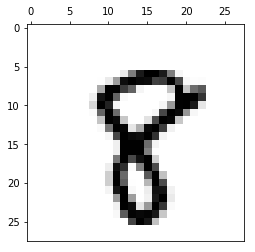

I PREDICT:  8
REAL VALUE:  8



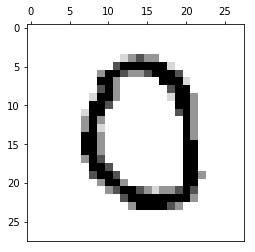

I PREDICT:  0
REAL VALUE:  0



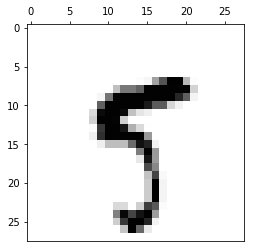

I PREDICT:  5
REAL VALUE:  5



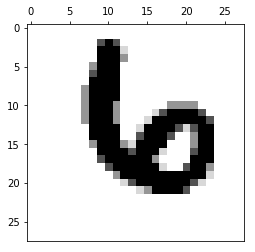

I PREDICT:  6
REAL VALUE:  6



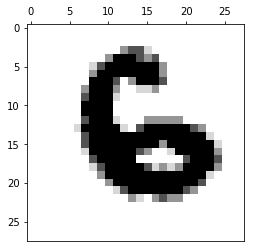

I PREDICT:  6
REAL VALUE:  6



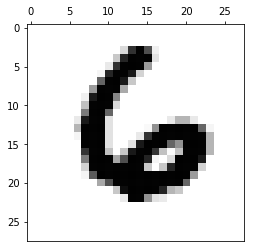

I PREDICT:  6
REAL VALUE:  6



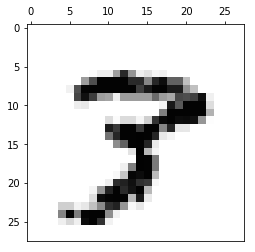

I PREDICT:  3
REAL VALUE:  3



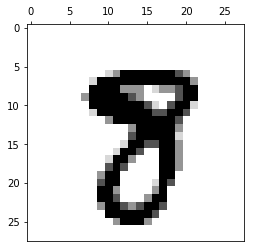

I PREDICT:  8
REAL VALUE:  8



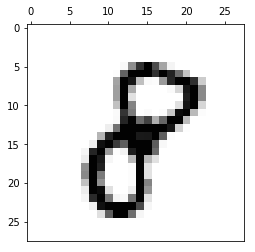

I PREDICT:  8
REAL VALUE:  8



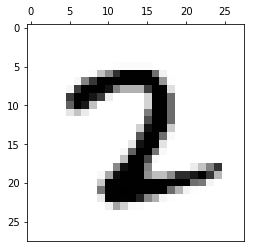

I PREDICT:  2
REAL VALUE:  2



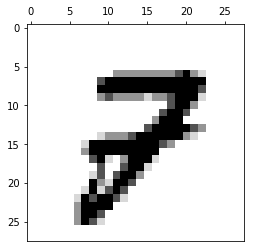

I PREDICT:  7
REAL VALUE:  7



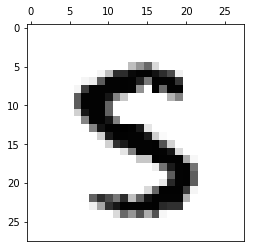

I PREDICT:  5
REAL VALUE:  5



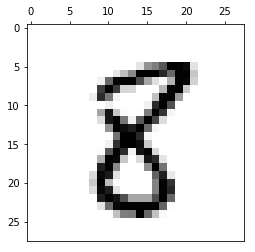

I PREDICT:  8
REAL VALUE:  8



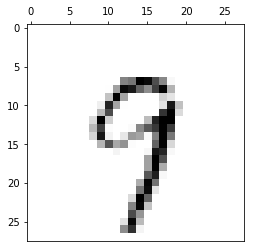

I PREDICT:  9
REAL VALUE:  9



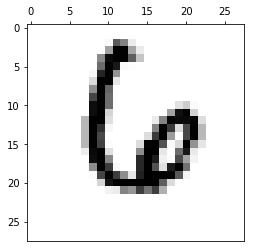

I PREDICT:  6
REAL VALUE:  6



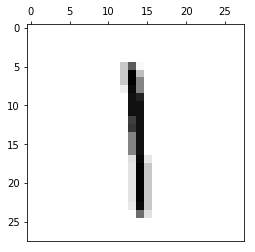

I PREDICT:  1
REAL VALUE:  1



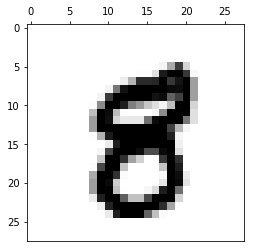

I PREDICT:  8
REAL VALUE:  8



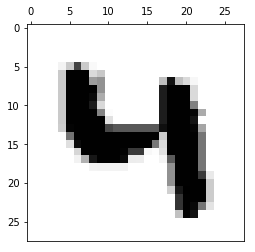

I PREDICT:  4
REAL VALUE:  4



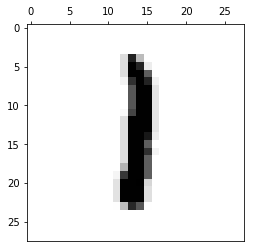

I PREDICT:  1
REAL VALUE:  1



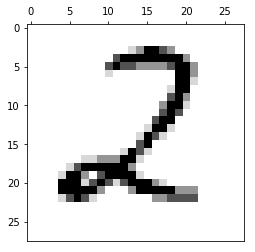

I PREDICT:  2
REAL VALUE:  2



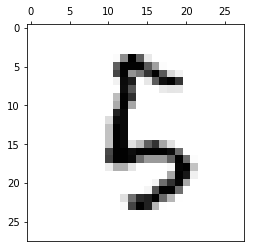

I PREDICT:  5
REAL VALUE:  5



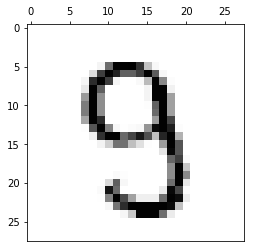

I PREDICT:  9
REAL VALUE:  9



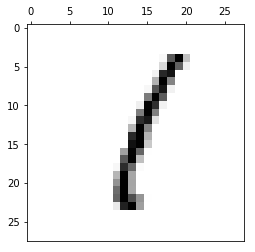

I PREDICT:  1
REAL VALUE:  1



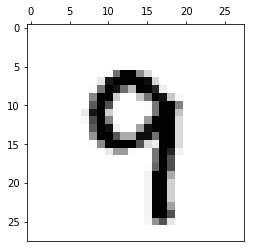

I PREDICT:  9
REAL VALUE:  9



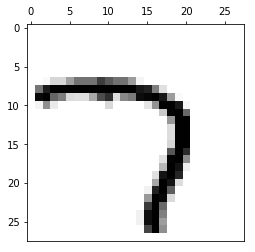

I PREDICT:  7
REAL VALUE:  7



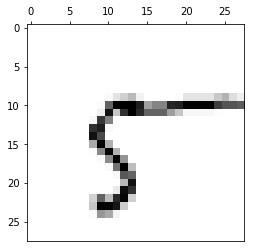

I PREDICT:  5
REAL VALUE:  5



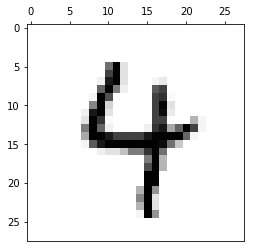

I PREDICT:  4
REAL VALUE:  4



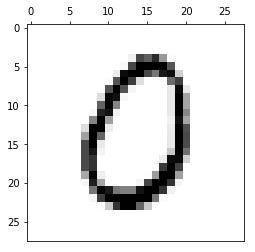

I PREDICT:  0
REAL VALUE:  0



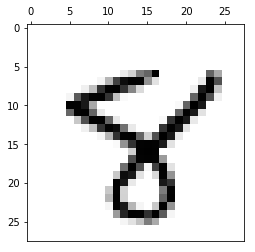

I PREDICT:  8
REAL VALUE:  8



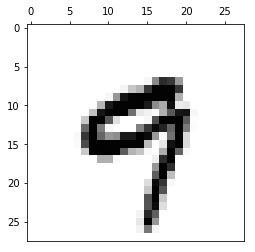

I PREDICT:  9
REAL VALUE:  9



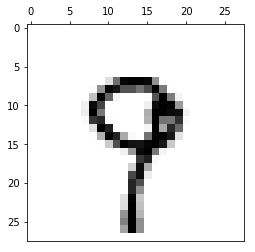

I PREDICT:  9
REAL VALUE:  9



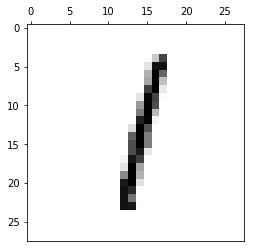

I PREDICT:  1
REAL VALUE:  1



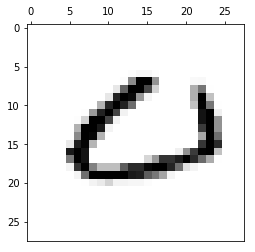

I PREDICT:  0
REAL VALUE:  0



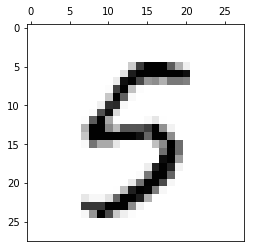

I PREDICT:  5
REAL VALUE:  5



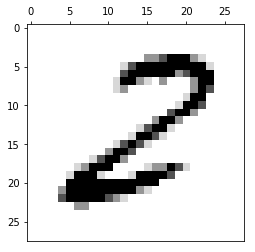

I PREDICT:  2
REAL VALUE:  2



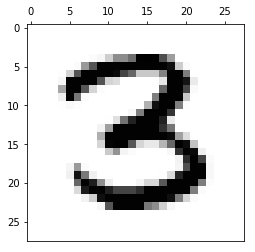

I PREDICT:  3
REAL VALUE:  3



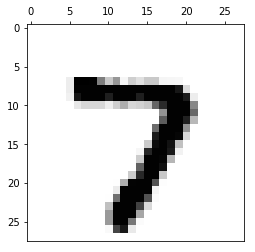

I PREDICT:  7
REAL VALUE:  7



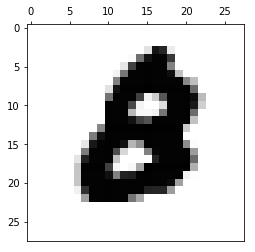

I PREDICT:  8
REAL VALUE:  8



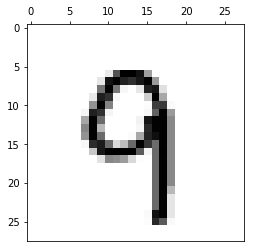

I PREDICT:  9
REAL VALUE:  9



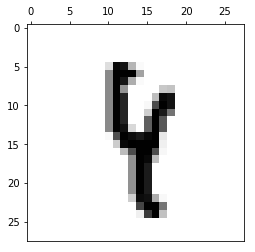

I PREDICT:  4
REAL VALUE:  4



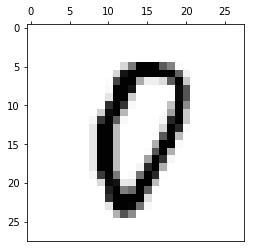

I PREDICT:  0
REAL VALUE:  0



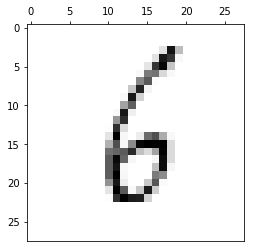

I PREDICT:  6
REAL VALUE:  6



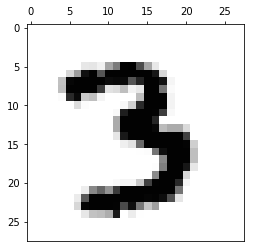

I PREDICT:  3
REAL VALUE:  3



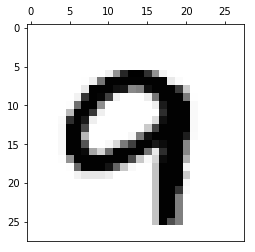

I PREDICT:  9
REAL VALUE:  9



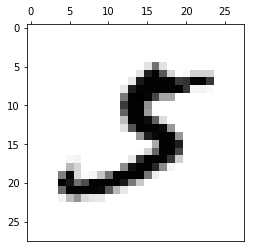

I PREDICT:  5
REAL VALUE:  5



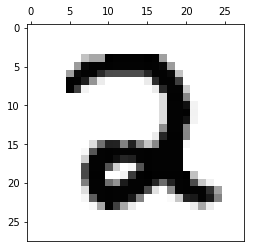

I PREDICT:  2
REAL VALUE:  2



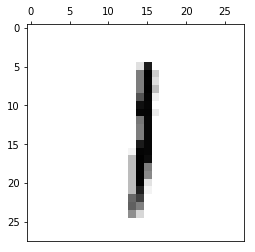

I PREDICT:  1
REAL VALUE:  1



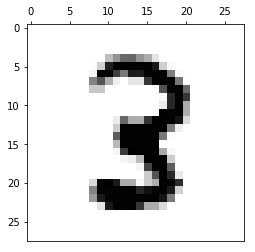

I PREDICT:  3
REAL VALUE:  3



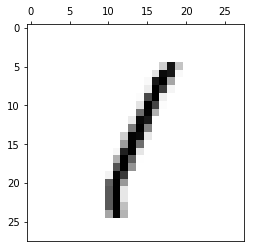

I PREDICT:  1
REAL VALUE:  1



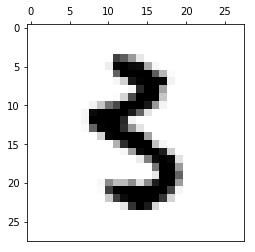

I PREDICT:  3
REAL VALUE:  3



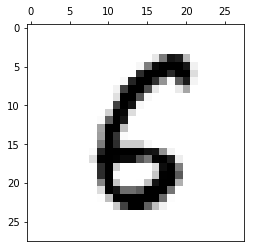

I PREDICT:  6
REAL VALUE:  6



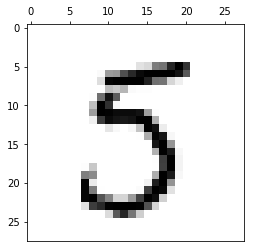

I PREDICT:  5
REAL VALUE:  5



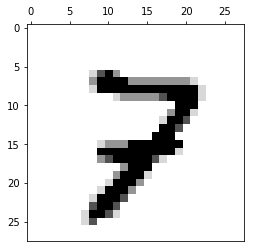

I PREDICT:  7
REAL VALUE:  7



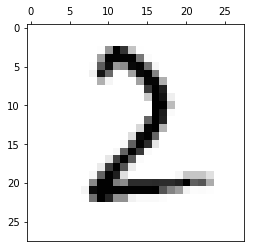

I PREDICT:  2
REAL VALUE:  2



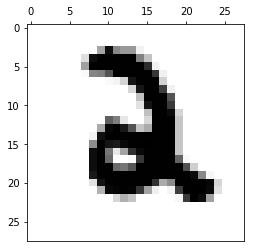

I PREDICT:  2
REAL VALUE:  2



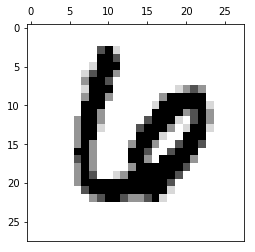

I PREDICT:  6
REAL VALUE:  6



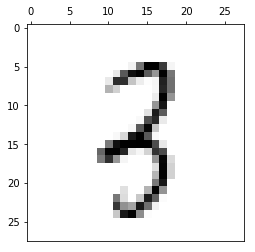

I PREDICT:  3
REAL VALUE:  3



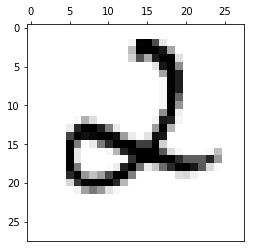

I PREDICT:  2
REAL VALUE:  2



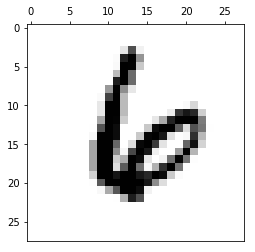

I PREDICT:  6
REAL VALUE:  6



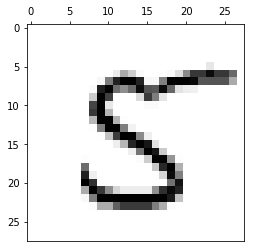

I PREDICT:  5
REAL VALUE:  5



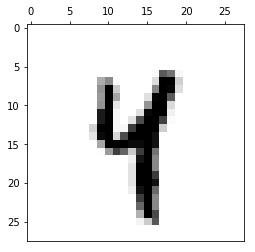

I PREDICT:  4
REAL VALUE:  4



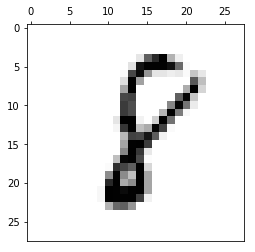

I PREDICT:  8
REAL VALUE:  8



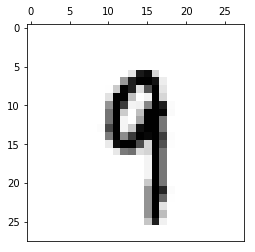

I PREDICT:  9
REAL VALUE:  9



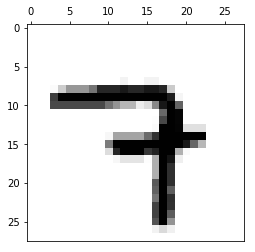

I PREDICT:  7
REAL VALUE:  7



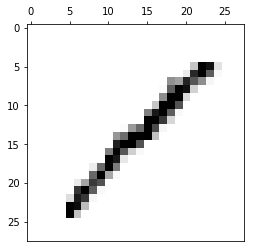

I PREDICT:  1
REAL VALUE:  1



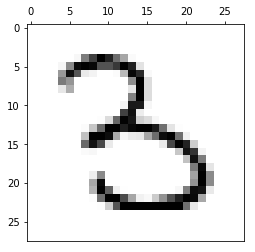

I PREDICT:  3
REAL VALUE:  3



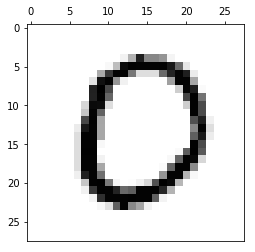

I PREDICT:  0
REAL VALUE:  0



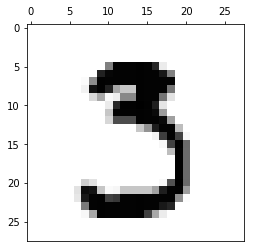

I PREDICT:  3
REAL VALUE:  3



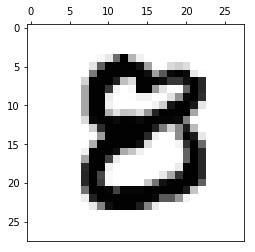

I PREDICT:  8
REAL VALUE:  8



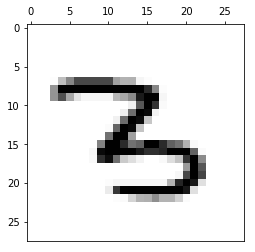

I PREDICT:  3
REAL VALUE:  3



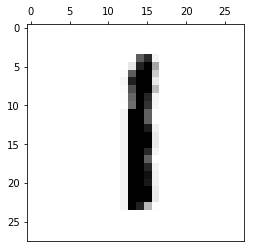

I PREDICT:  1
REAL VALUE:  1



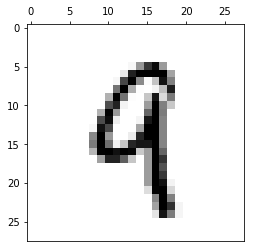

I PREDICT:  9
REAL VALUE:  9



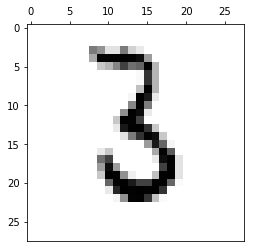

I PREDICT:  3
REAL VALUE:  3



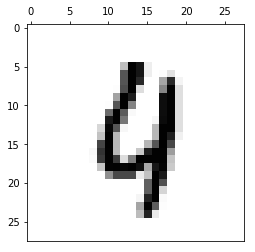

I PREDICT:  4
REAL VALUE:  4



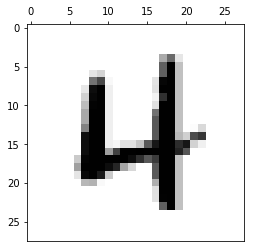

I PREDICT:  4
REAL VALUE:  4



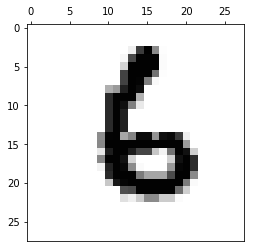

I PREDICT:  6
REAL VALUE:  6



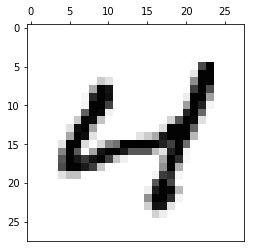

I PREDICT:  4
REAL VALUE:  4



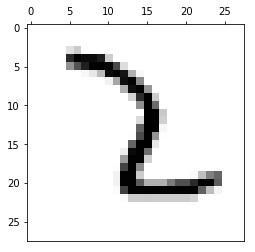

I PREDICT:  2
REAL VALUE:  2



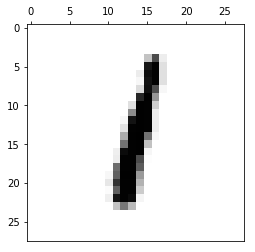

I PREDICT:  1
REAL VALUE:  1



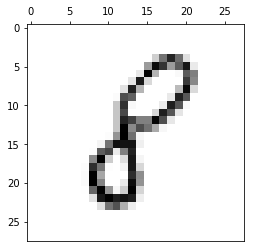

I PREDICT:  8
REAL VALUE:  8



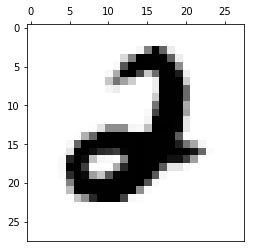

I PREDICT:  2
REAL VALUE:  2



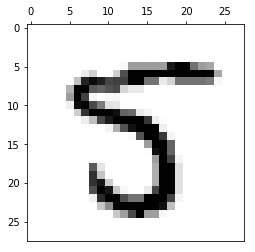

I PREDICT:  5
REAL VALUE:  5



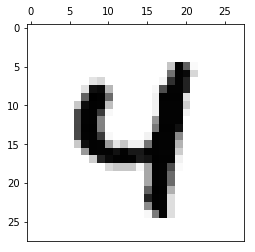

I PREDICT:  4
REAL VALUE:  4



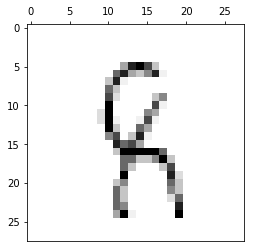

I PREDICT:  8
REAL VALUE:  8



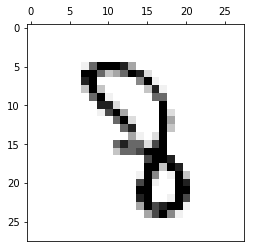

I PREDICT:  8
REAL VALUE:  8



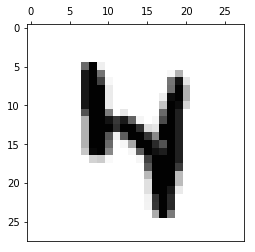

I PREDICT:  4
REAL VALUE:  4



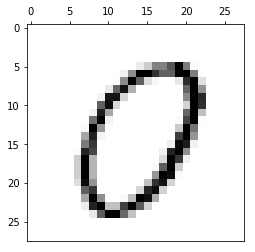

I PREDICT:  0
REAL VALUE:  0



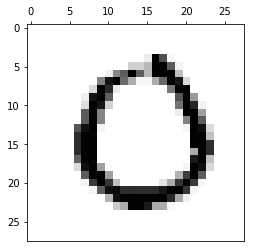

I PREDICT:  0
REAL VALUE:  0



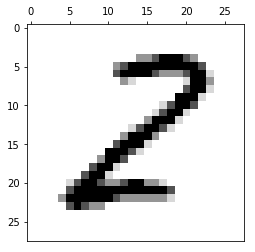

I PREDICT:  2
REAL VALUE:  2



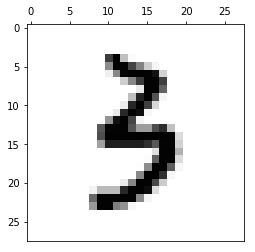

I PREDICT:  3
REAL VALUE:  3



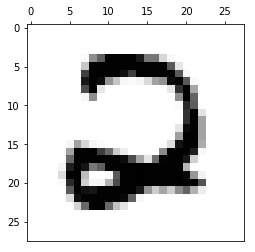

I PREDICT:  2
REAL VALUE:  2



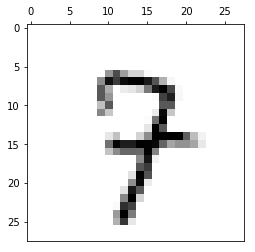

I PREDICT:  7
REAL VALUE:  7



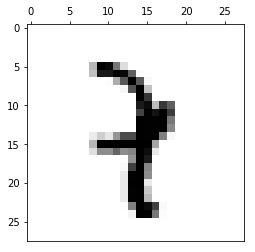

I PREDICT:  7
REAL VALUE:  7



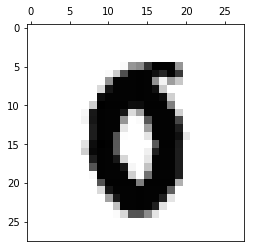

I PREDICT:  0
REAL VALUE:  0



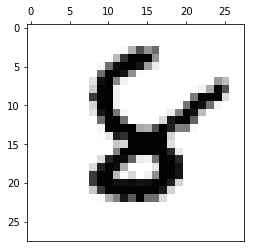

I PREDICT:  8
REAL VALUE:  8



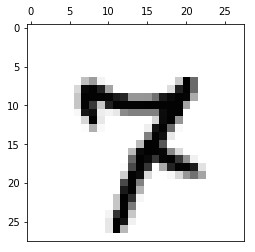

I PREDICT:  7
REAL VALUE:  7



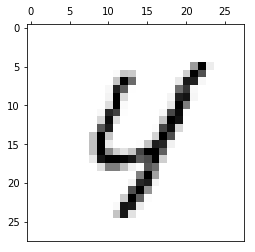

I PREDICT:  4
REAL VALUE:  4



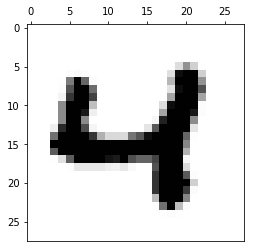

I PREDICT:  4
REAL VALUE:  4



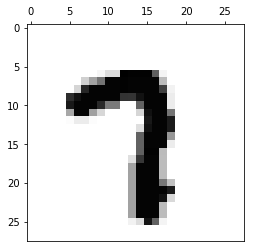

I PREDICT:  7
REAL VALUE:  7



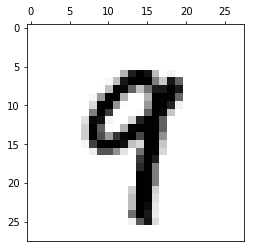

I PREDICT:  9
REAL VALUE:  9



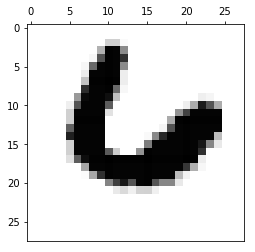

I PREDICT:  6
REAL VALUE:  6



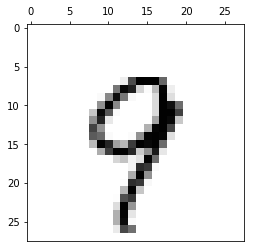

I PREDICT:  9
REAL VALUE:  9



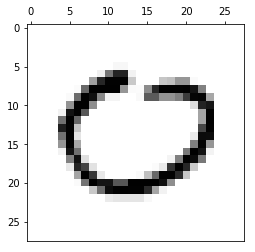

I PREDICT:  0
REAL VALUE:  0



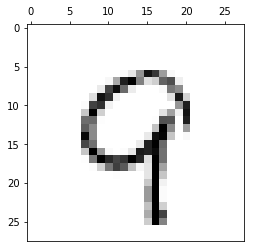

I PREDICT:  9
REAL VALUE:  9



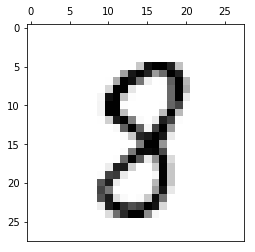

I PREDICT:  8
REAL VALUE:  8



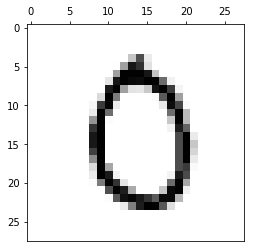

I PREDICT:  0
REAL VALUE:  0



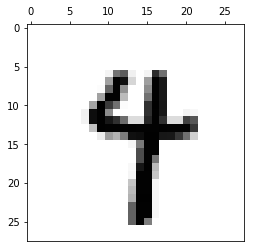

I PREDICT:  4
REAL VALUE:  4



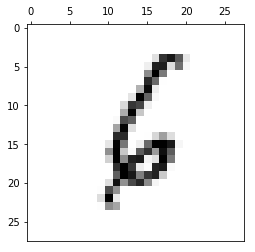

I PREDICT:  6
REAL VALUE:  6



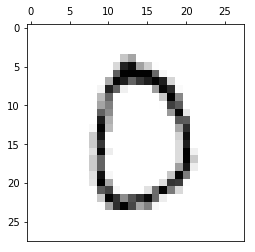

I PREDICT:  0
REAL VALUE:  0



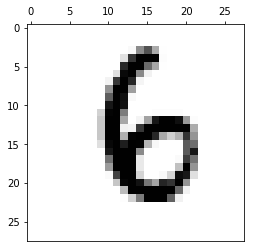

I PREDICT:  6
REAL VALUE:  6



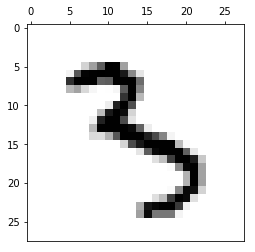

I PREDICT:  3
REAL VALUE:  3



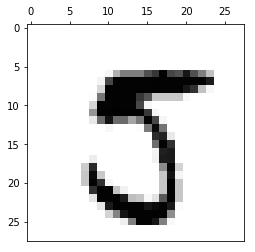

I PREDICT:  5
REAL VALUE:  5



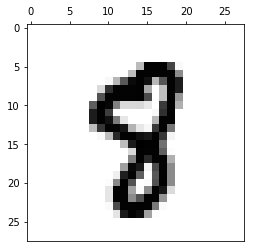

I PREDICT:  8
REAL VALUE:  8



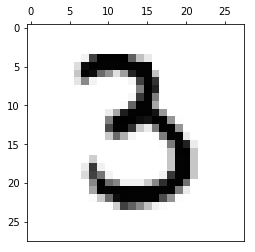

I PREDICT:  3
REAL VALUE:  3



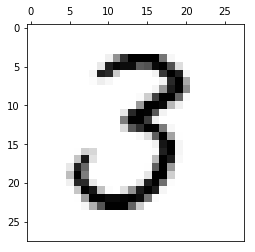

I PREDICT:  3
REAL VALUE:  3



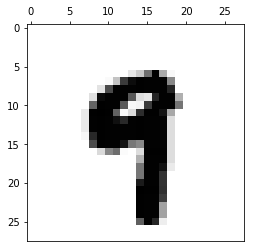

I PREDICT:  9
REAL VALUE:  9



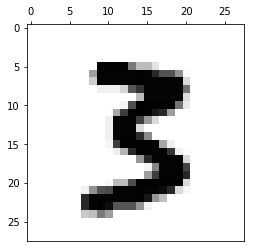

I PREDICT:  3
REAL VALUE:  3



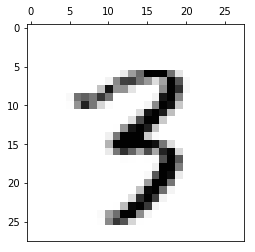

I PREDICT:  3
REAL VALUE:  3



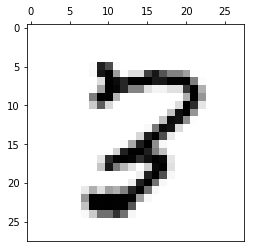

I PREDICT:  3
REAL VALUE:  3



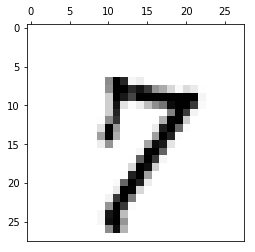

I PREDICT:  7
REAL VALUE:  7



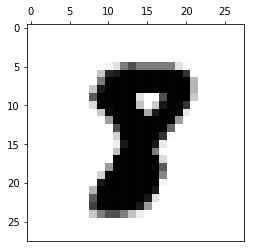

I PREDICT:  8
REAL VALUE:  8



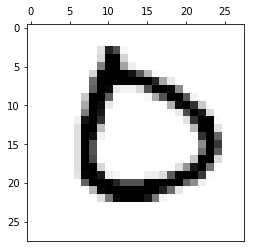

I PREDICT:  0
REAL VALUE:  0



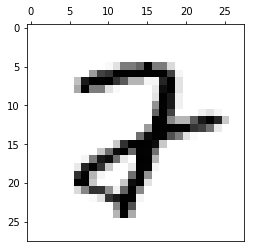

I PREDICT:  2
REAL VALUE:  2



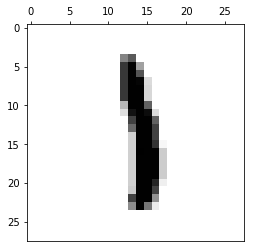

I PREDICT:  1
REAL VALUE:  1



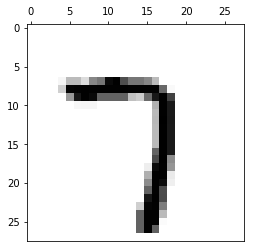

I PREDICT:  7
REAL VALUE:  7



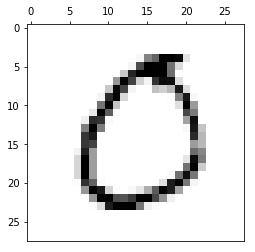

I PREDICT:  0
REAL VALUE:  0



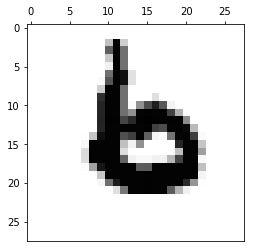

I PREDICT:  6
REAL VALUE:  6



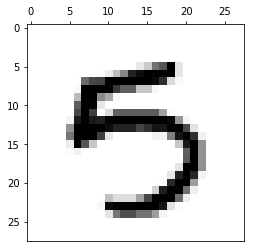

I PREDICT:  5
REAL VALUE:  5



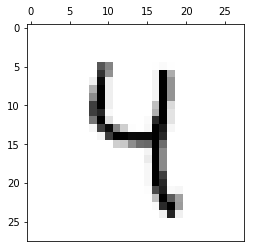

I PREDICT:  4
REAL VALUE:  4



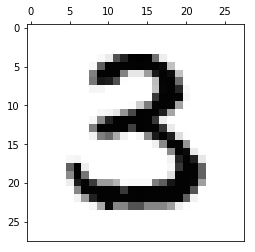

I PREDICT:  3
REAL VALUE:  3



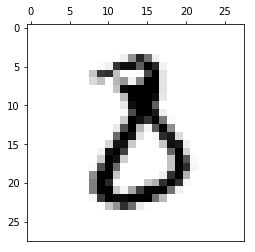

I PREDICT:  8
REAL VALUE:  8



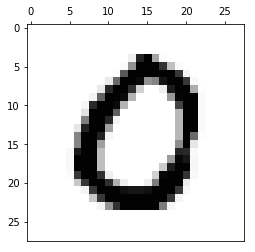

I PREDICT:  0
REAL VALUE:  0



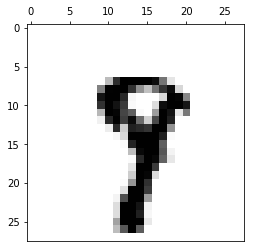

I PREDICT:  9
REAL VALUE:  9



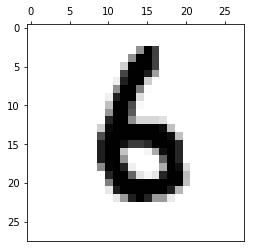

I PREDICT:  6
REAL VALUE:  6



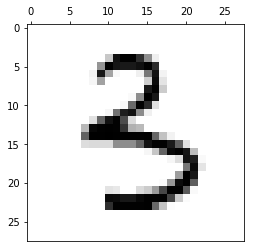

I PREDICT:  3
REAL VALUE:  3



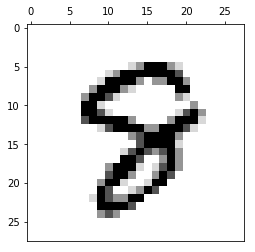

I PREDICT:  8
REAL VALUE:  8



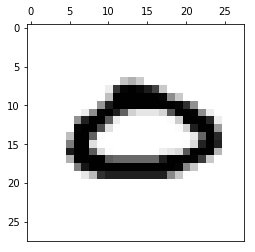

I PREDICT:  0
REAL VALUE:  0



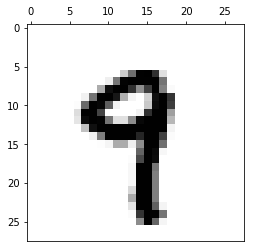

I PREDICT:  9
REAL VALUE:  9



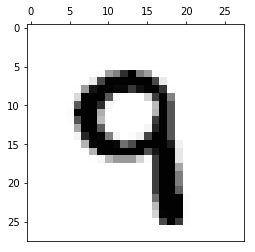

I PREDICT:  9
REAL VALUE:  9



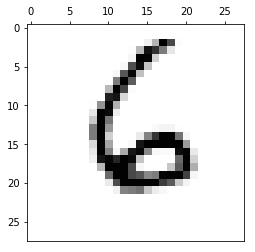

I PREDICT:  6
REAL VALUE:  6



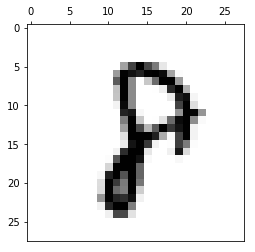

I PREDICT:  8
REAL VALUE:  8



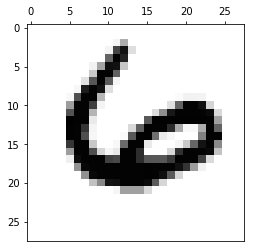

I PREDICT:  6
REAL VALUE:  6



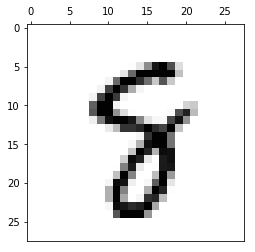

I PREDICT:  8
REAL VALUE:  8



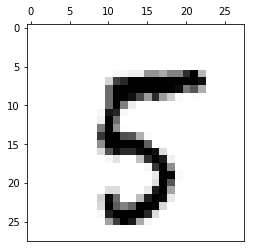

I PREDICT:  5
REAL VALUE:  5



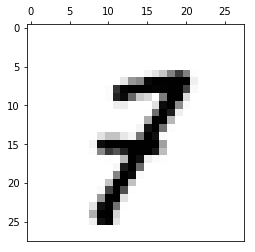

I PREDICT:  7
REAL VALUE:  7



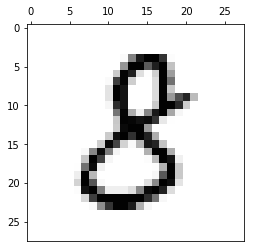

I PREDICT:  8
REAL VALUE:  8



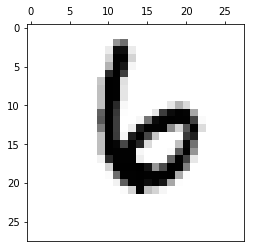

I PREDICT:  6
REAL VALUE:  6



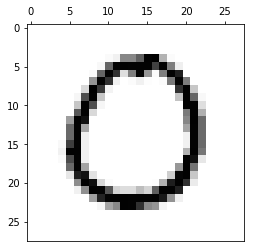

I PREDICT:  0
REAL VALUE:  0



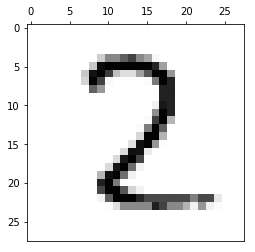

I PREDICT:  2
REAL VALUE:  2



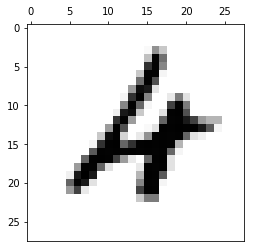

I PREDICT:  4
REAL VALUE:  4



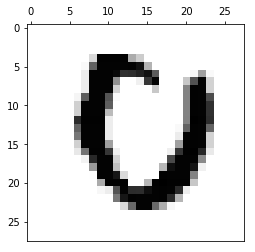

I PREDICT:  0
REAL VALUE:  0



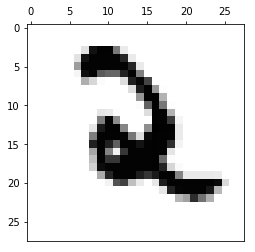

I PREDICT:  2
REAL VALUE:  2



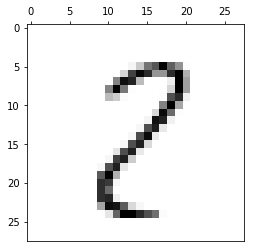

I PREDICT:  2
REAL VALUE:  2



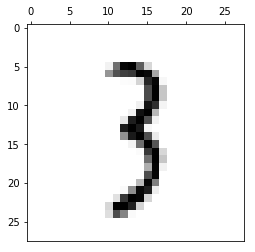

I PREDICT:  3
REAL VALUE:  3



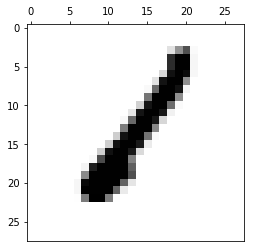

I PREDICT:  1
REAL VALUE:  1



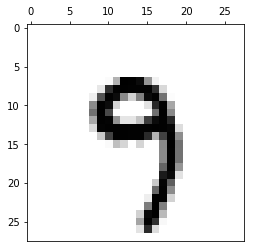

I PREDICT:  9
REAL VALUE:  9



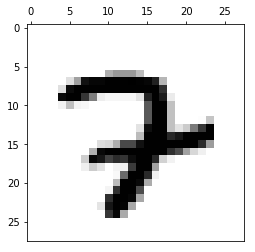

I PREDICT:  7
REAL VALUE:  7



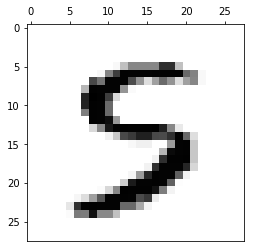

I PREDICT:  5
REAL VALUE:  5



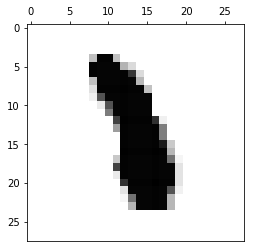

I PREDICT:  1
REAL VALUE:  1



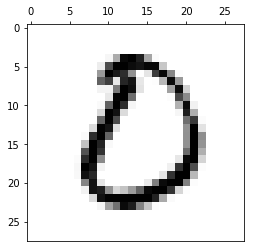

I PREDICT:  0
REAL VALUE:  0



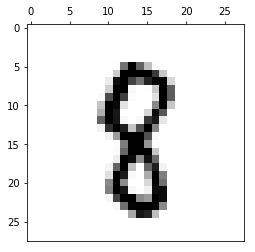

I PREDICT:  8
REAL VALUE:  8



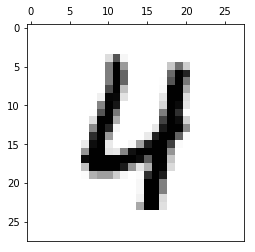

I PREDICT:  4
REAL VALUE:  4



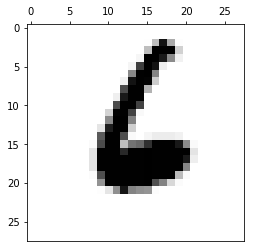

I PREDICT:  6
REAL VALUE:  6



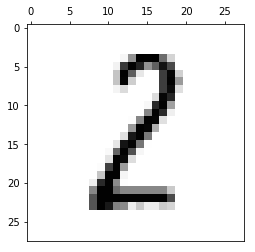

I PREDICT:  2
REAL VALUE:  2



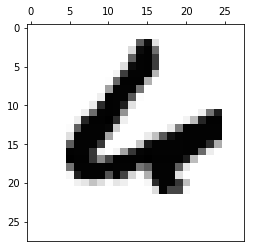

I PREDICT:  6
REAL VALUE:  6



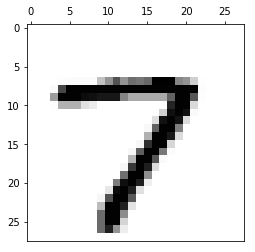

I PREDICT:  7
REAL VALUE:  7



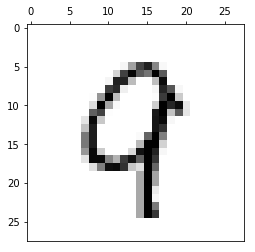

I PREDICT:  9
REAL VALUE:  9



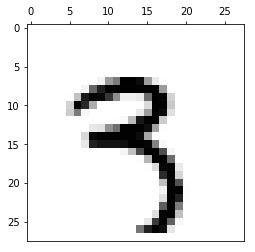

I PREDICT:  3
REAL VALUE:  3



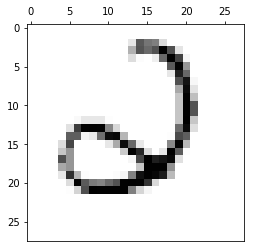

I PREDICT:  2
REAL VALUE:  2



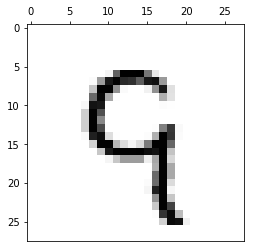

I PREDICT:  9
REAL VALUE:  9



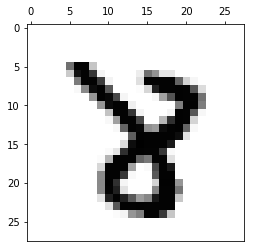

I PREDICT:  8
REAL VALUE:  8



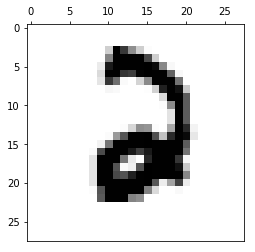

I PREDICT:  2
REAL VALUE:  2



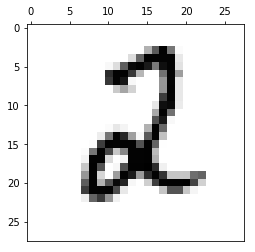

I PREDICT:  2
REAL VALUE:  2



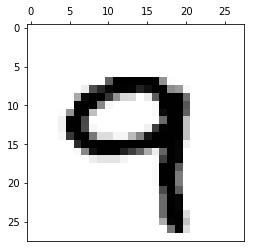

I PREDICT:  9
REAL VALUE:  9



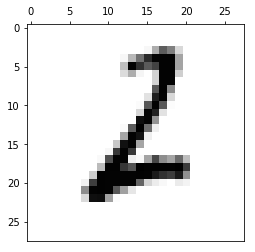

I PREDICT:  2
REAL VALUE:  2



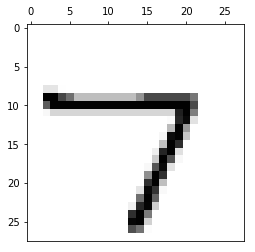

I PREDICT:  7
REAL VALUE:  7



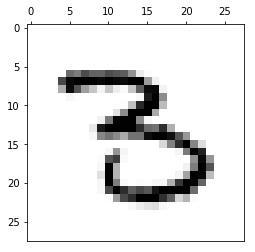

I PREDICT:  3
REAL VALUE:  3



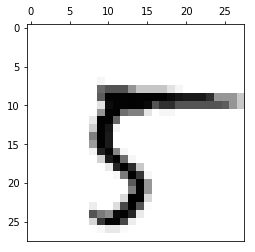

I PREDICT:  5
REAL VALUE:  5



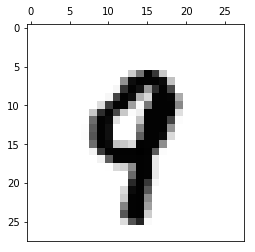

I PREDICT:  9
REAL VALUE:  9



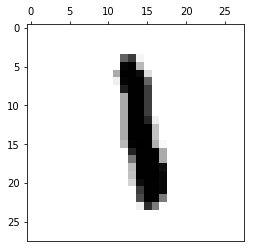

I PREDICT:  1
REAL VALUE:  1



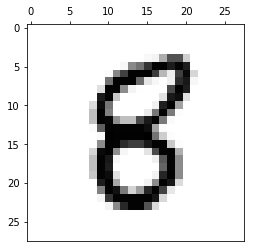

I PREDICT:  8
REAL VALUE:  8



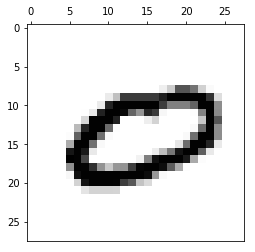

I PREDICT:  0
REAL VALUE:  0



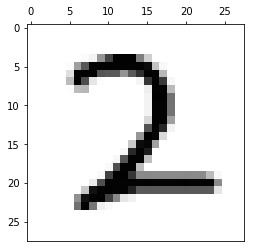

I PREDICT:  2
REAL VALUE:  2



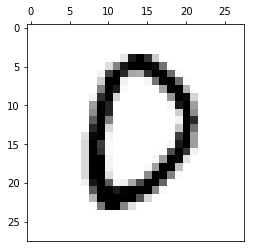

I PREDICT:  0
REAL VALUE:  0



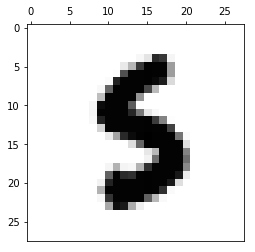

I PREDICT:  5
REAL VALUE:  5



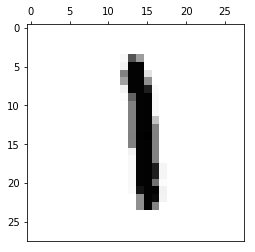

I PREDICT:  1
REAL VALUE:  1



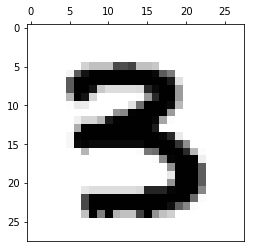

I PREDICT:  3
REAL VALUE:  3



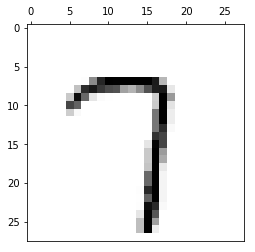

I PREDICT:  7
REAL VALUE:  7



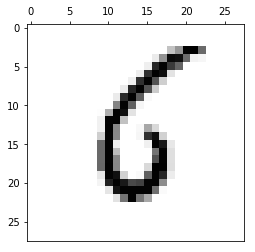

I PREDICT:  6
REAL VALUE:  6



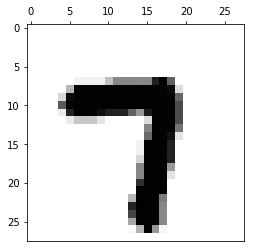

I PREDICT:  7
REAL VALUE:  7



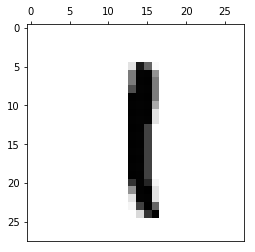

I PREDICT:  1
REAL VALUE:  1



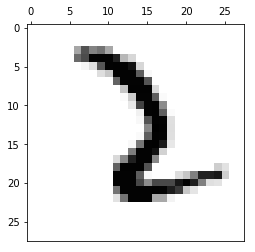

I PREDICT:  2
REAL VALUE:  2



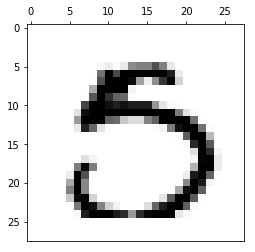

I PREDICT:  5
REAL VALUE:  5



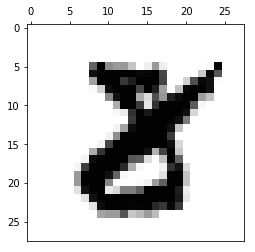

I PREDICT:  8
REAL VALUE:  8



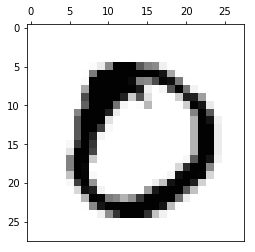

I PREDICT:  0
REAL VALUE:  0



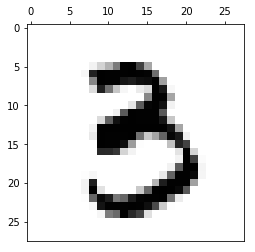

I PREDICT:  3
REAL VALUE:  3



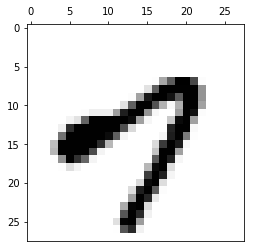

I PREDICT:  7
REAL VALUE:  7



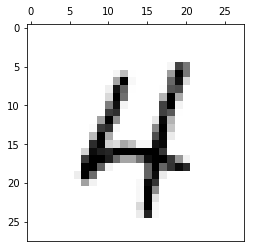

I PREDICT:  4
REAL VALUE:  4



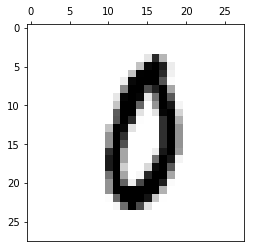

I PREDICT:  0
REAL VALUE:  0



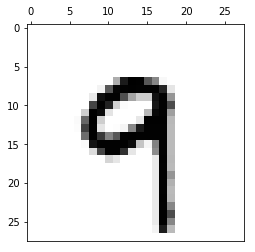

I PREDICT:  9
REAL VALUE:  9



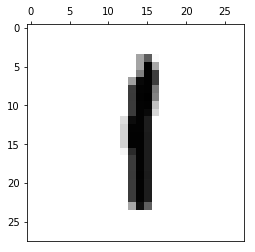

I PREDICT:  1
REAL VALUE:  1



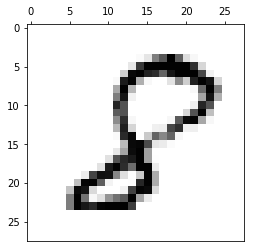

I PREDICT:  8
REAL VALUE:  8



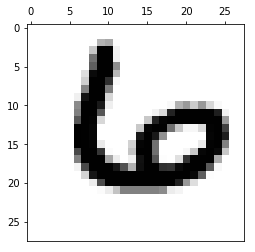

I PREDICT:  6
REAL VALUE:  6



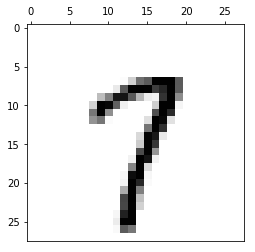

I PREDICT:  7
REAL VALUE:  7



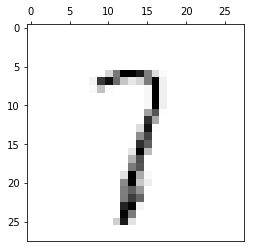

I PREDICT:  7
REAL VALUE:  7



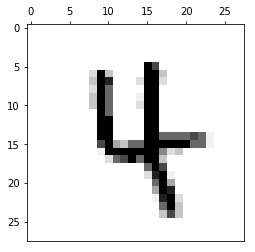

I PREDICT:  4
REAL VALUE:  4



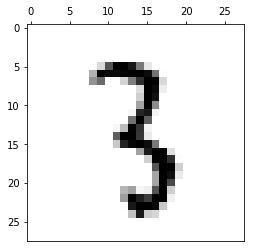

I PREDICT:  3
REAL VALUE:  3



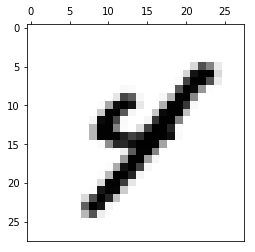

I PREDICT:  4
REAL VALUE:  4



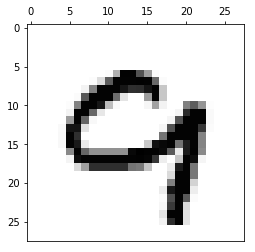

I PREDICT:  9
REAL VALUE:  9



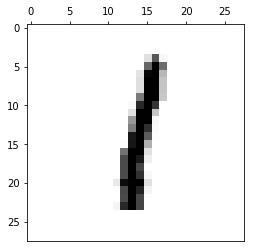

I PREDICT:  1
REAL VALUE:  1



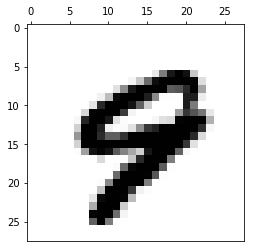

I PREDICT:  9
REAL VALUE:  9



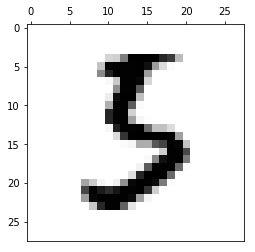

I PREDICT:  5
REAL VALUE:  5



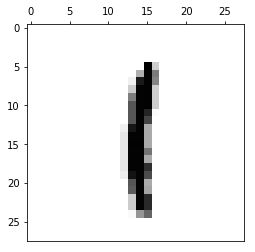

I PREDICT:  1
REAL VALUE:  1



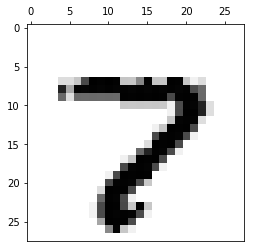

I PREDICT:  7
REAL VALUE:  7



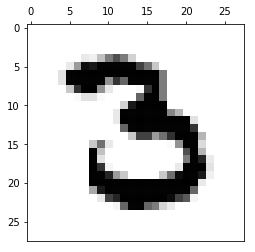

I PREDICT:  3
REAL VALUE:  3



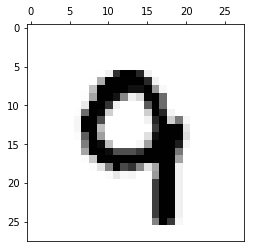

I PREDICT:  9
REAL VALUE:  9



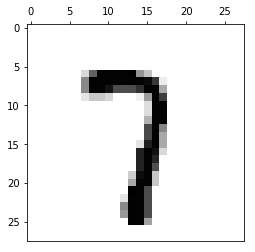

I PREDICT:  7
REAL VALUE:  7



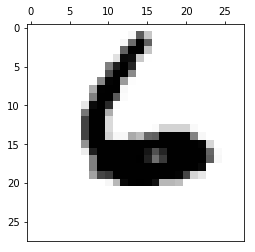

I PREDICT:  6
REAL VALUE:  6



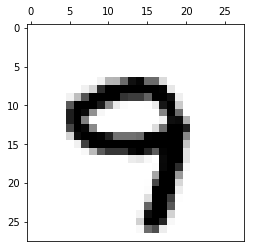

I PREDICT:  9
REAL VALUE:  9



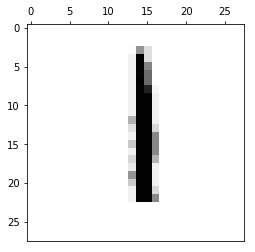

I PREDICT:  1
REAL VALUE:  1



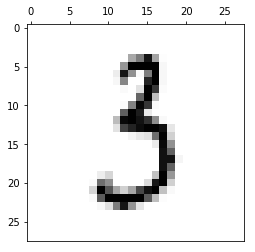

I PREDICT:  3
REAL VALUE:  3



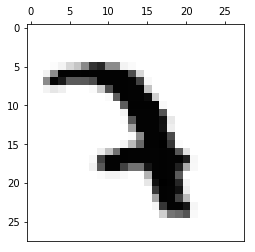

I PREDICT:  7
REAL VALUE:  7



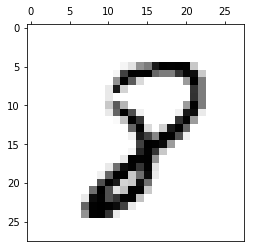

I PREDICT:  8
REAL VALUE:  8



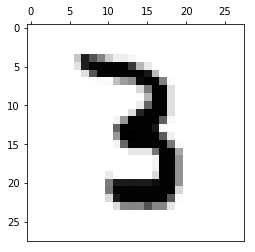

I PREDICT:  3
REAL VALUE:  3



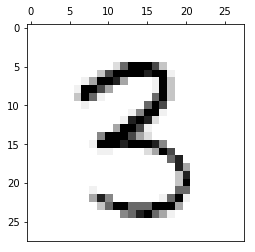

I PREDICT:  3
REAL VALUE:  3



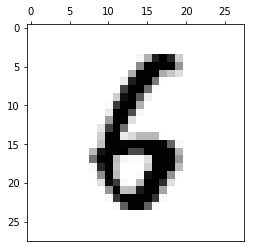

I PREDICT:  6
REAL VALUE:  6



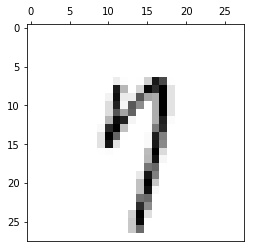

I PREDICT:  7
REAL VALUE:  7



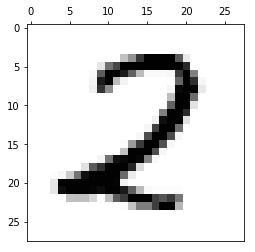

I PREDICT:  2
REAL VALUE:  2



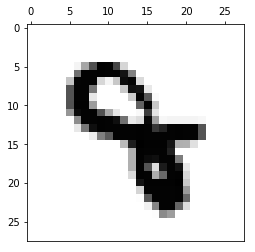

I PREDICT:  8
REAL VALUE:  8



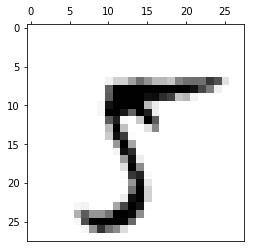

I PREDICT:  5
REAL VALUE:  5



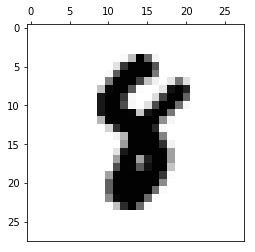

I PREDICT:  8
REAL VALUE:  8



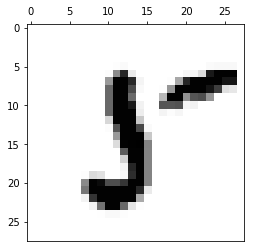

I PREDICT:  5
REAL VALUE:  5



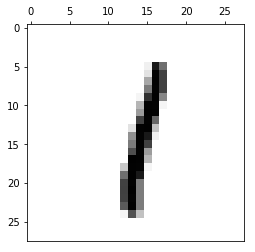

I PREDICT:  1
REAL VALUE:  1



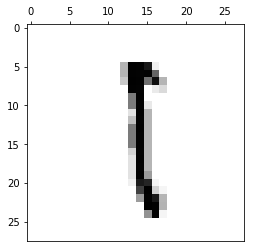

I PREDICT:  1
REAL VALUE:  1



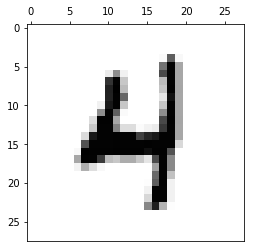

I PREDICT:  4
REAL VALUE:  4



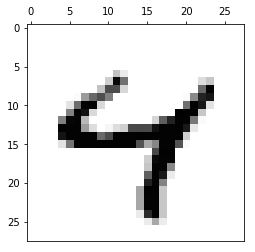

I PREDICT:  4
REAL VALUE:  4



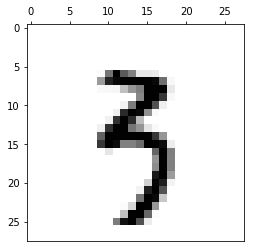

I PREDICT:  3
REAL VALUE:  3



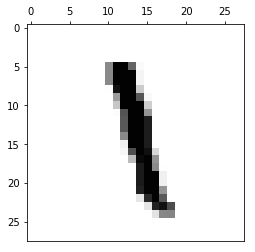

I PREDICT:  1
REAL VALUE:  1



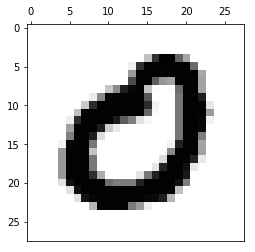

I PREDICT:  0
REAL VALUE:  0



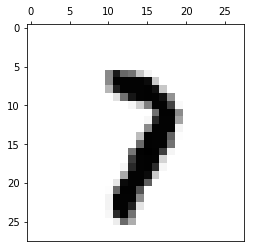

I PREDICT:  7
REAL VALUE:  7



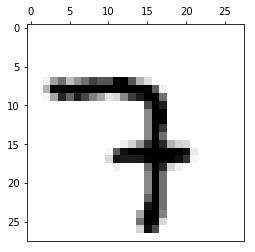

I PREDICT:  7
REAL VALUE:  7



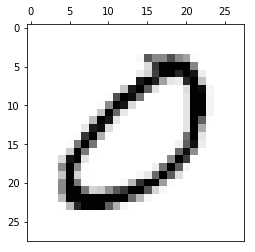

I PREDICT:  0
REAL VALUE:  0



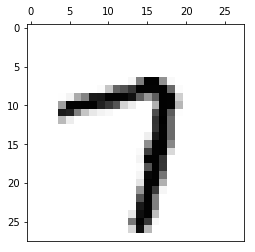

I PREDICT:  7
REAL VALUE:  7



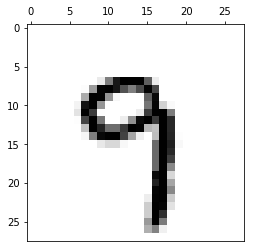

I PREDICT:  9
REAL VALUE:  9



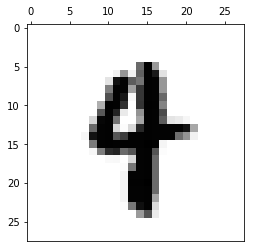

I PREDICT:  4
REAL VALUE:  4



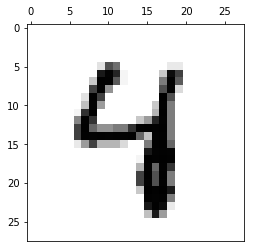

I PREDICT:  4
REAL VALUE:  4



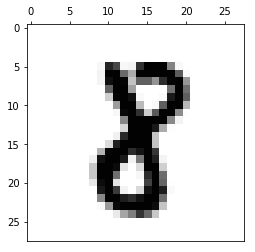

I PREDICT:  8
REAL VALUE:  8



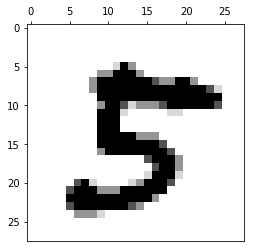

I PREDICT:  5
REAL VALUE:  5



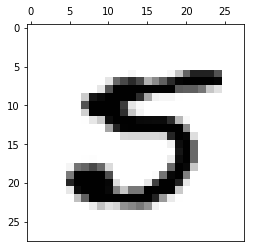

I PREDICT:  5
REAL VALUE:  5



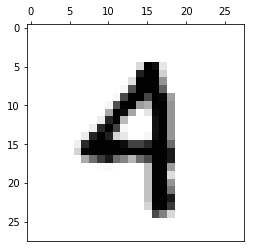

I PREDICT:  4
REAL VALUE:  4



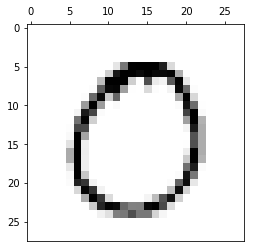

I PREDICT:  0
REAL VALUE:  0



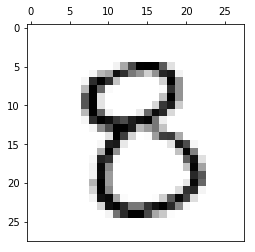

I PREDICT:  8
REAL VALUE:  8



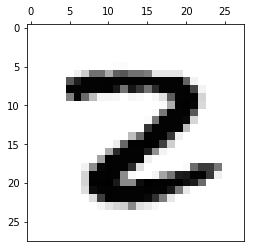

I PREDICT:  2
REAL VALUE:  2



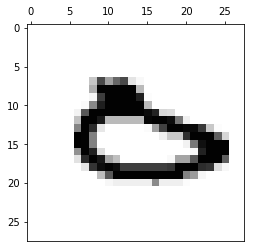

I PREDICT:  0
REAL VALUE:  0



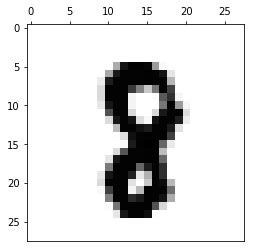

I PREDICT:  8
REAL VALUE:  8



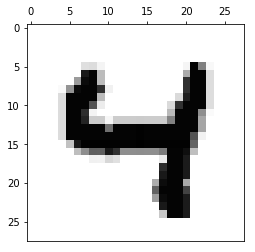

I PREDICT:  4
REAL VALUE:  4



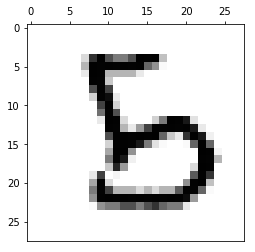

I PREDICT:  5
REAL VALUE:  5



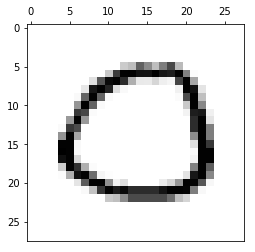

I PREDICT:  0
REAL VALUE:  0



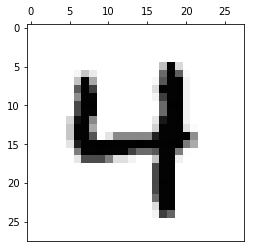

I PREDICT:  4
REAL VALUE:  4



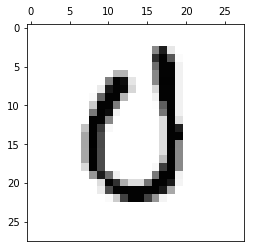

I PREDICT:  0
REAL VALUE:  0



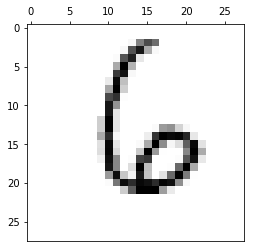

I PREDICT:  6
REAL VALUE:  6



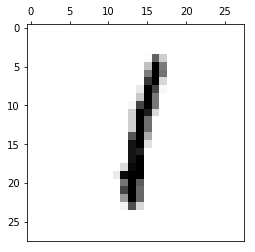

I PREDICT:  1
REAL VALUE:  1



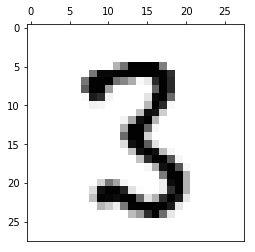

I PREDICT:  3
REAL VALUE:  3



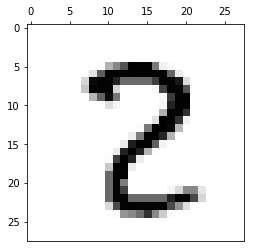

I PREDICT:  2
REAL VALUE:  2



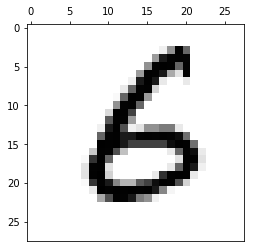

I PREDICT:  6
REAL VALUE:  6



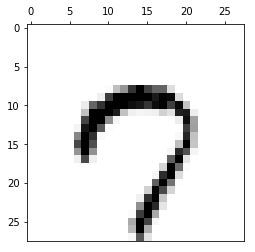

I PREDICT:  7
REAL VALUE:  7



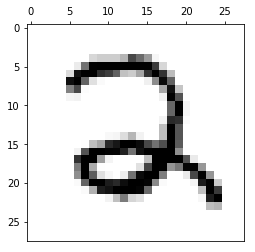

I PREDICT:  2
REAL VALUE:  2



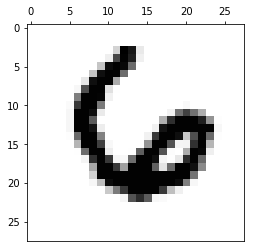

I PREDICT:  6
REAL VALUE:  6



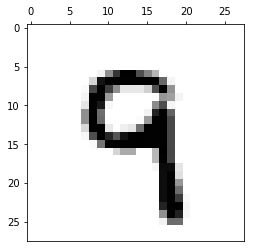

I PREDICT:  9
REAL VALUE:  9



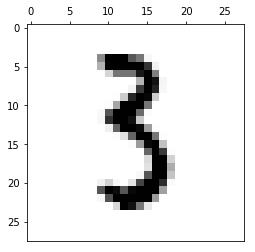

I PREDICT:  3
REAL VALUE:  3



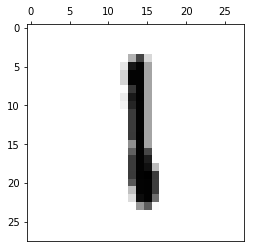

I PREDICT:  1
REAL VALUE:  1



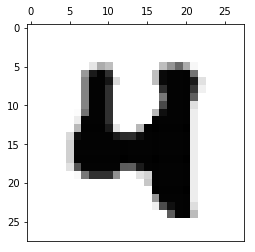

I PREDICT:  4
REAL VALUE:  4



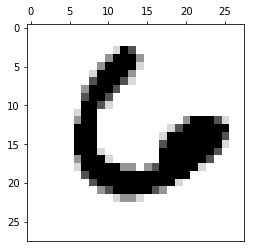

I PREDICT:  6
REAL VALUE:  6



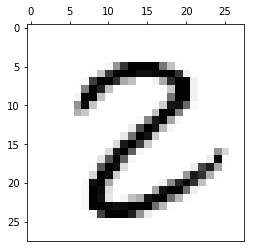

I PREDICT:  2
REAL VALUE:  2



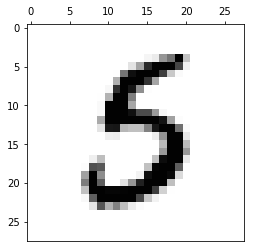

I PREDICT:  5
REAL VALUE:  5



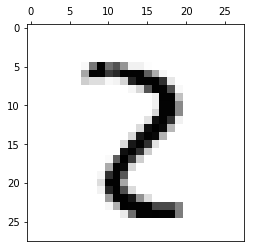

I PREDICT:  2
REAL VALUE:  2



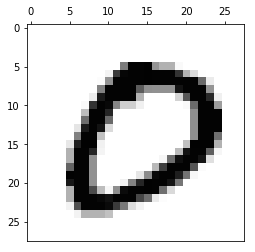

I PREDICT:  0
REAL VALUE:  0



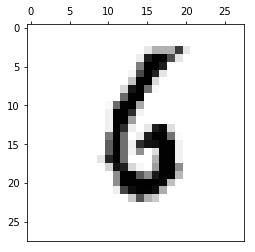

I PREDICT:  6
REAL VALUE:  6



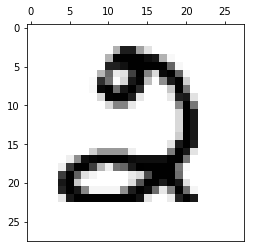

I PREDICT:  2
REAL VALUE:  2



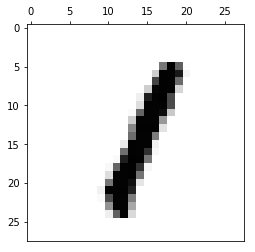

I PREDICT:  1
REAL VALUE:  1



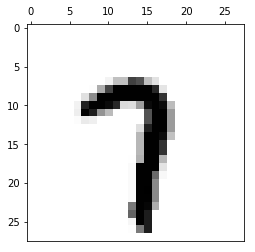

I PREDICT:  7
REAL VALUE:  7



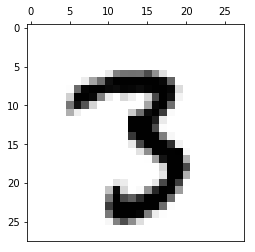

I PREDICT:  3
REAL VALUE:  3



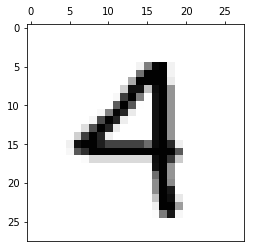

I PREDICT:  4
REAL VALUE:  4



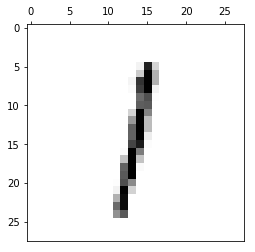

I PREDICT:  1
REAL VALUE:  1



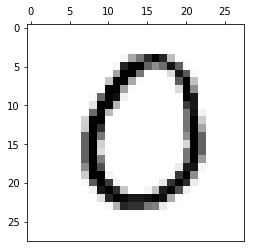

I PREDICT:  0
REAL VALUE:  0



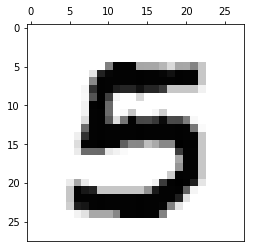

I PREDICT:  5
REAL VALUE:  5



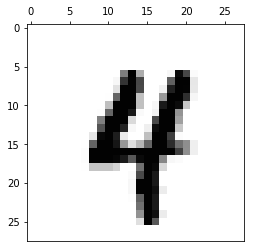

I PREDICT:  4
REAL VALUE:  4



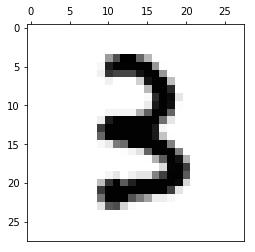

I PREDICT:  3
REAL VALUE:  3



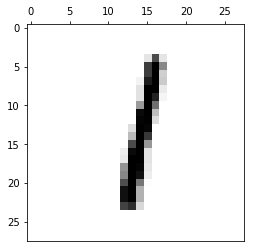

I PREDICT:  1
REAL VALUE:  1



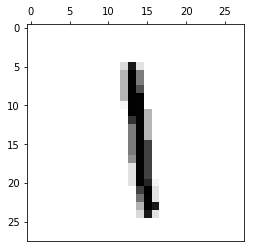

I PREDICT:  1
REAL VALUE:  1



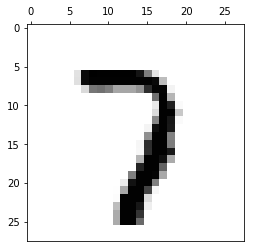

I PREDICT:  7
REAL VALUE:  7



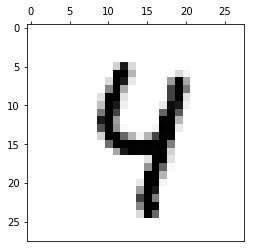

I PREDICT:  4
REAL VALUE:  4



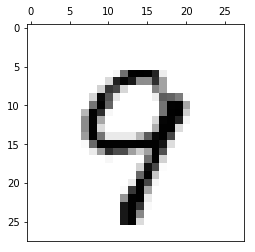

I PREDICT:  9
REAL VALUE:  9



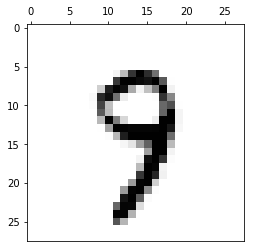

I PREDICT:  9
REAL VALUE:  9



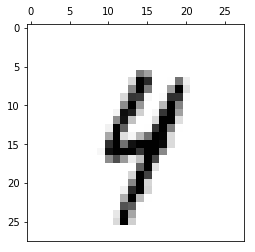

I PREDICT:  4
REAL VALUE:  4



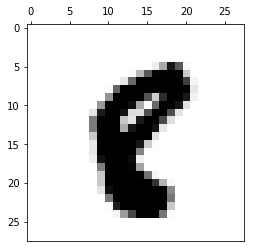

I PREDICT:  8
REAL VALUE:  8



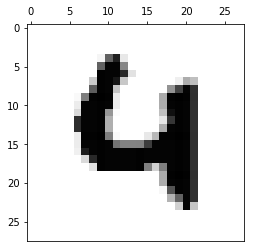

I PREDICT:  4
REAL VALUE:  4



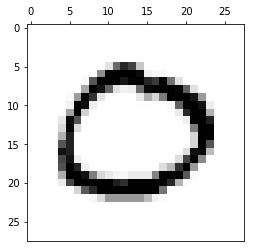

I PREDICT:  0
REAL VALUE:  0



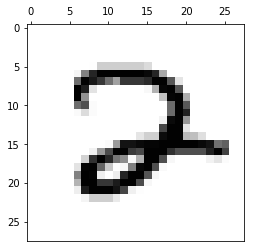

I PREDICT:  2
REAL VALUE:  2



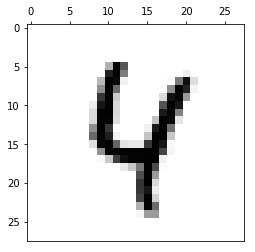

I PREDICT:  4
REAL VALUE:  4



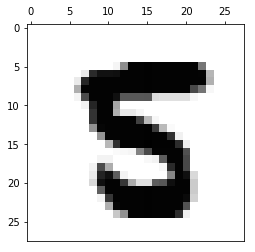

I PREDICT:  5
REAL VALUE:  5



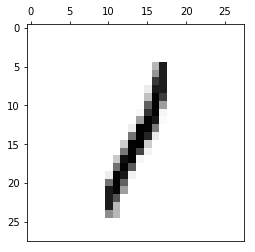

I PREDICT:  1
REAL VALUE:  1



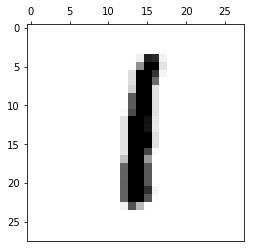

I PREDICT:  1
REAL VALUE:  1



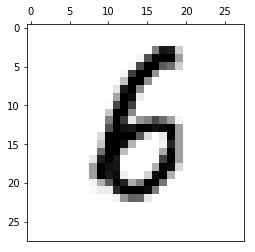

I PREDICT:  6
REAL VALUE:  6



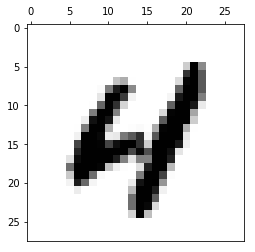

I PREDICT:  4
REAL VALUE:  4



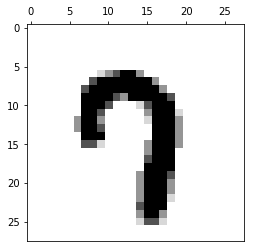

I PREDICT:  7
REAL VALUE:  7



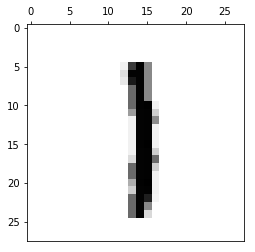

I PREDICT:  1
REAL VALUE:  1



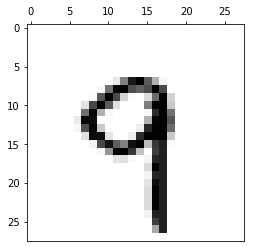

I PREDICT:  9
REAL VALUE:  9



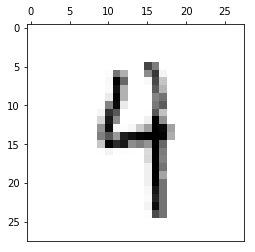

I PREDICT:  4
REAL VALUE:  4



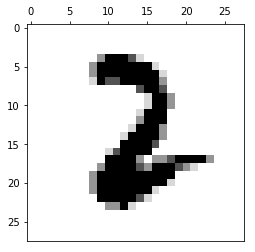

I PREDICT:  2
REAL VALUE:  2



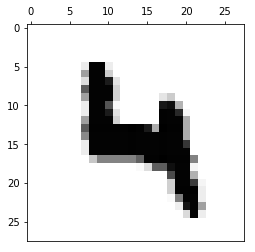

I PREDICT:  4
REAL VALUE:  4



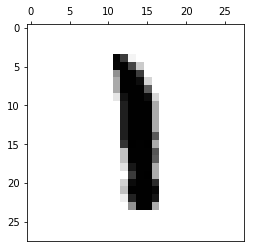

I PREDICT:  1
REAL VALUE:  1



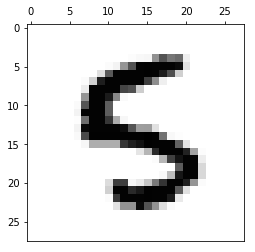

I PREDICT:  5
REAL VALUE:  5



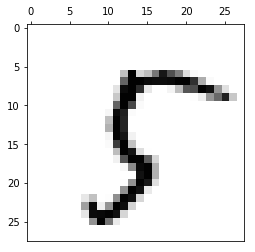

I PREDICT:  5
REAL VALUE:  5



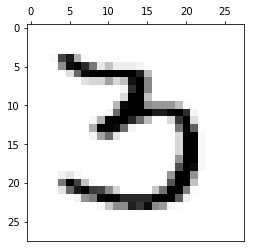

I PREDICT:  3
REAL VALUE:  3



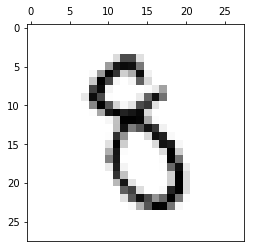

I PREDICT:  8
REAL VALUE:  8



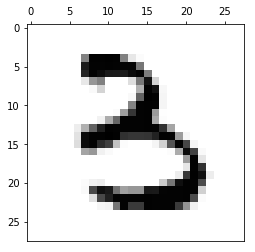

I PREDICT:  3
REAL VALUE:  3



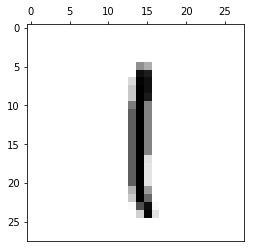

I PREDICT:  1
REAL VALUE:  1



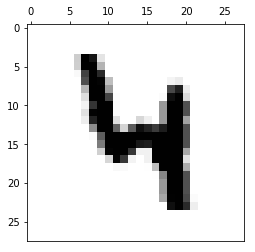

I PREDICT:  4
REAL VALUE:  4



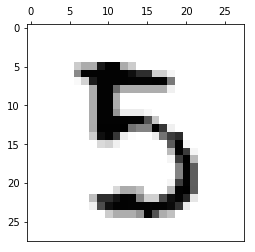

I PREDICT:  5
REAL VALUE:  5



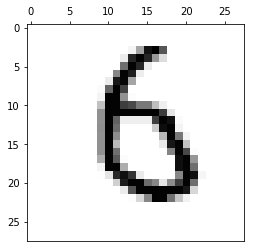

I PREDICT:  6
REAL VALUE:  6



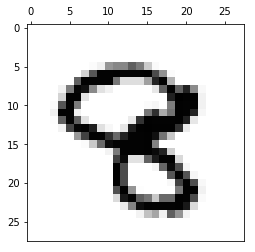

I PREDICT:  8
REAL VALUE:  8



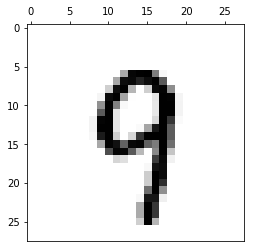

I PREDICT:  9
REAL VALUE:  9



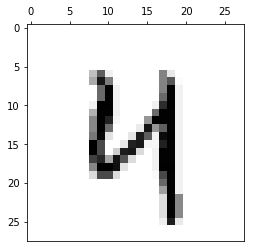

I PREDICT:  4
REAL VALUE:  4



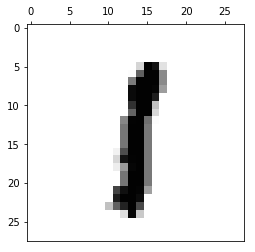

I PREDICT:  1
REAL VALUE:  1



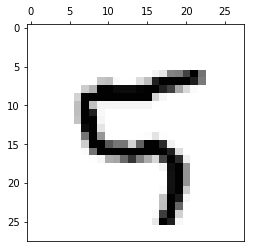

I PREDICT:  5
REAL VALUE:  5



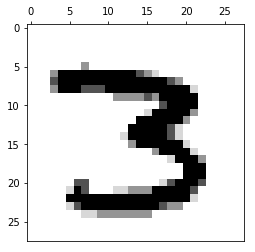

I PREDICT:  3
REAL VALUE:  3



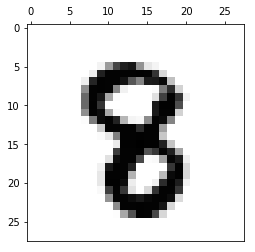

I PREDICT:  8
REAL VALUE:  8



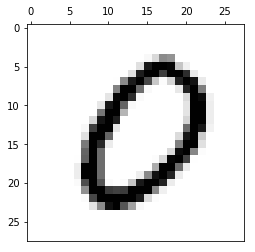

I PREDICT:  0
REAL VALUE:  0



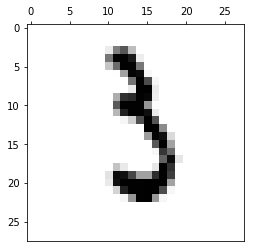

I PREDICT:  3
REAL VALUE:  3



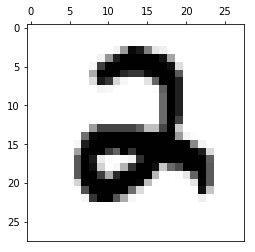

I PREDICT:  2
REAL VALUE:  2



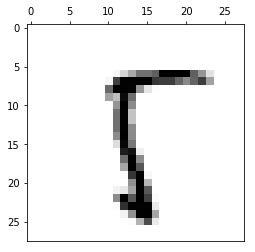

I PREDICT:  5
REAL VALUE:  5



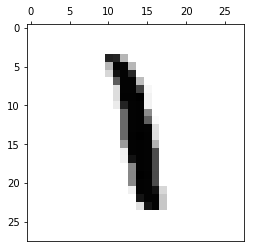

I PREDICT:  1
REAL VALUE:  1



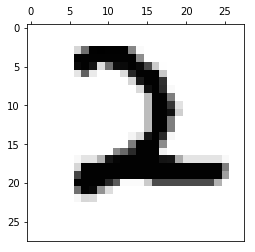

I PREDICT:  2
REAL VALUE:  2



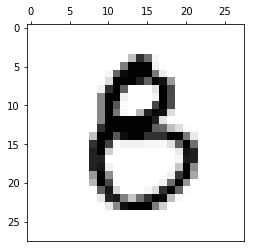

I PREDICT:  8
REAL VALUE:  8



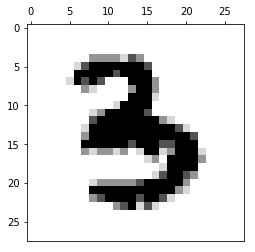

I PREDICT:  3
REAL VALUE:  3



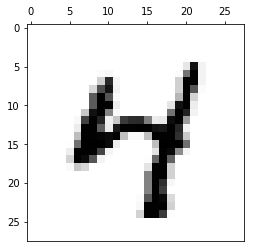

I PREDICT:  4
REAL VALUE:  4



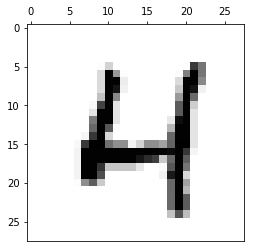

I PREDICT:  4
REAL VALUE:  4



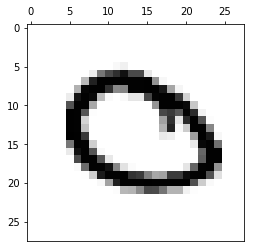

I PREDICT:  0
REAL VALUE:  0



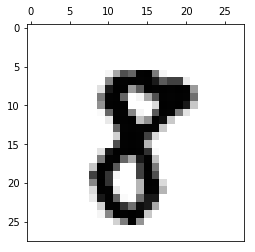

I PREDICT:  8
REAL VALUE:  8



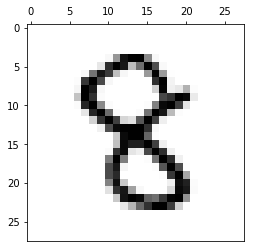

I PREDICT:  8
REAL VALUE:  8



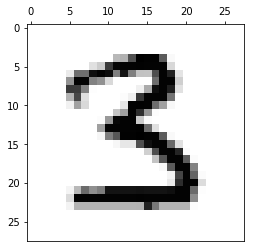

I PREDICT:  3
REAL VALUE:  3



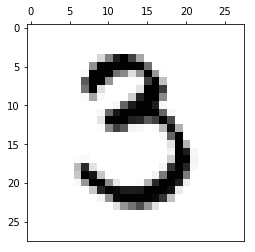

I PREDICT:  3
REAL VALUE:  3



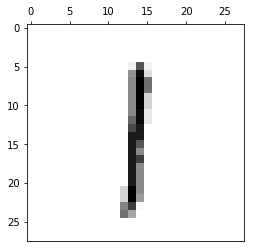

I PREDICT:  1
REAL VALUE:  1



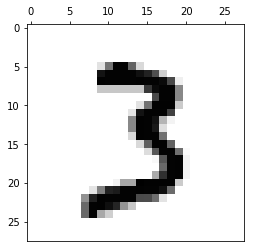

I PREDICT:  3
REAL VALUE:  3



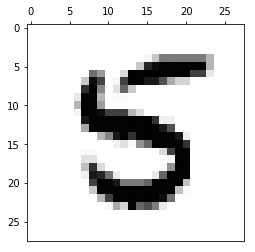

I PREDICT:  5
REAL VALUE:  5



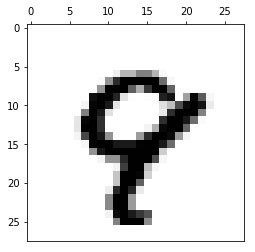

I PREDICT:  9
REAL VALUE:  9



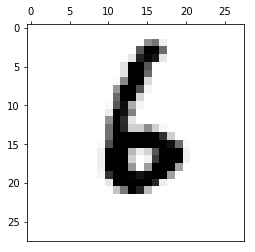

I PREDICT:  6
REAL VALUE:  6



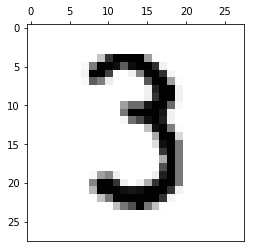

I PREDICT:  3
REAL VALUE:  3



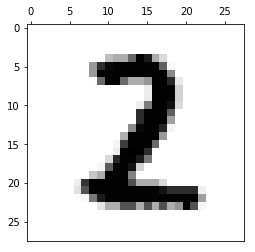

I PREDICT:  2
REAL VALUE:  2



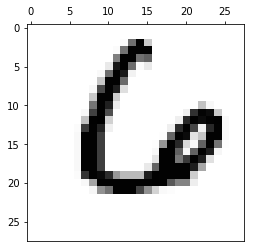

I PREDICT:  6
REAL VALUE:  6



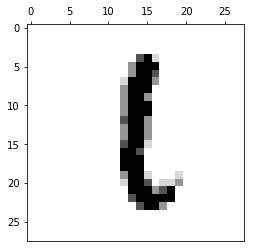

I PREDICT:  1
REAL VALUE:  1



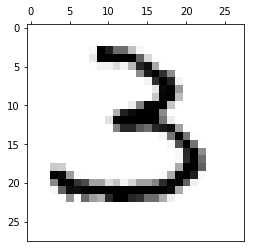

I PREDICT:  3
REAL VALUE:  3



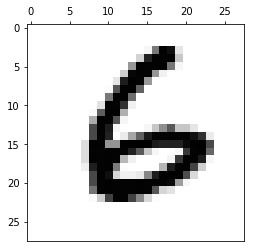

I PREDICT:  6
REAL VALUE:  6



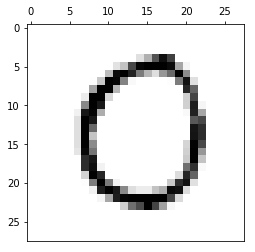

I PREDICT:  0
REAL VALUE:  0



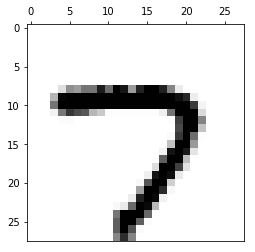

I PREDICT:  7
REAL VALUE:  7



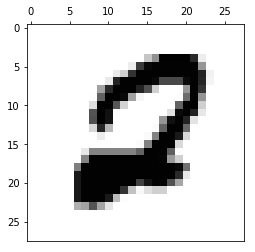

I PREDICT:  2
REAL VALUE:  2



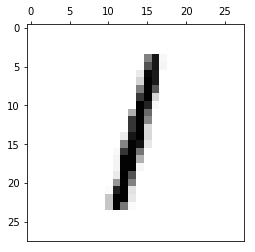

I PREDICT:  1
REAL VALUE:  1



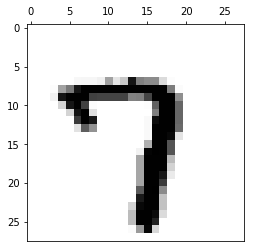

I PREDICT:  7
REAL VALUE:  7



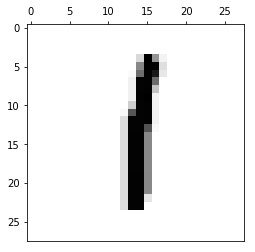

I PREDICT:  1
REAL VALUE:  1



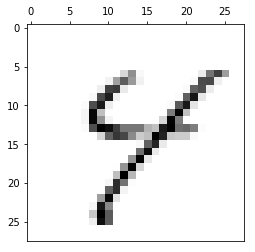

I PREDICT:  4
REAL VALUE:  4



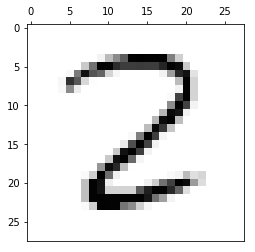

I PREDICT:  2
REAL VALUE:  2



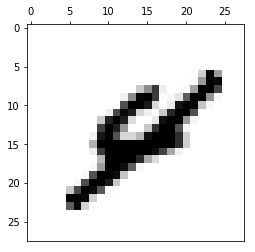

I PREDICT:  4
REAL VALUE:  4



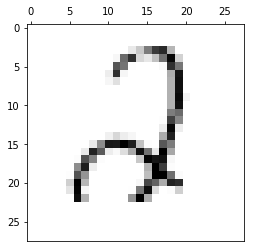

I PREDICT:  2
REAL VALUE:  2



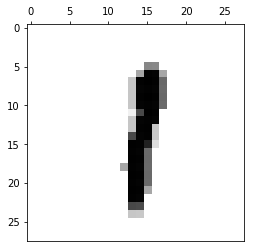

I PREDICT:  1
REAL VALUE:  1



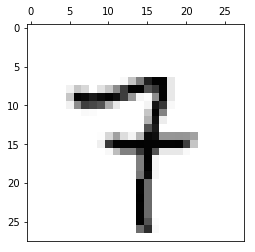

I PREDICT:  7
REAL VALUE:  7



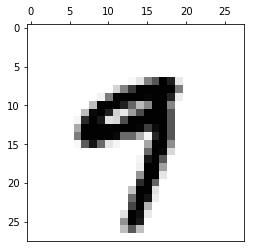

I PREDICT:  9
REAL VALUE:  9



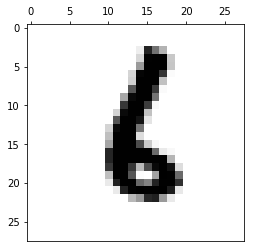

I PREDICT:  6
REAL VALUE:  6



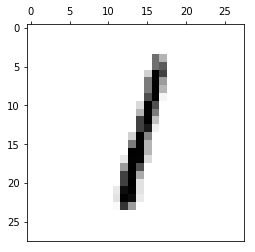

I PREDICT:  1
REAL VALUE:  1



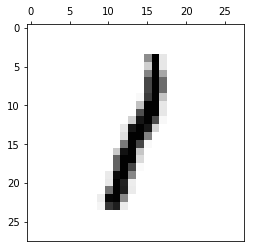

I PREDICT:  1
REAL VALUE:  1



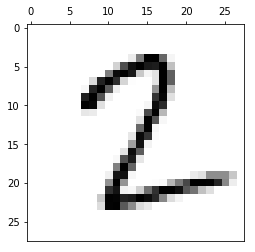

I PREDICT:  2
REAL VALUE:  2



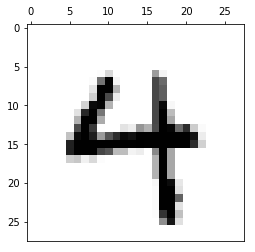

I PREDICT:  4
REAL VALUE:  4



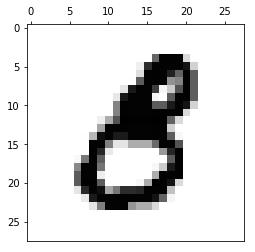

I PREDICT:  8
REAL VALUE:  8



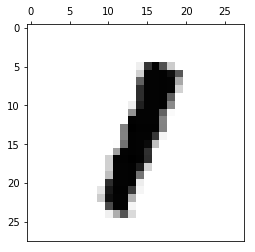

I PREDICT:  1
REAL VALUE:  1



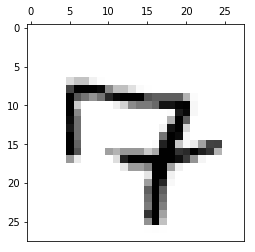

I PREDICT:  7
REAL VALUE:  7



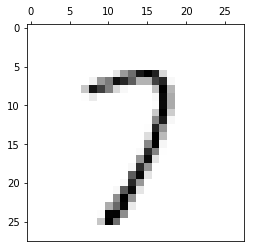

I PREDICT:  7
REAL VALUE:  7



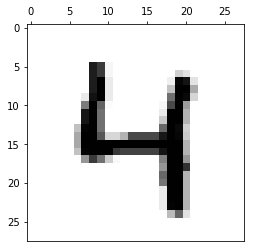

I PREDICT:  4
REAL VALUE:  4



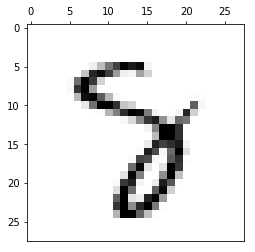

I PREDICT:  8
REAL VALUE:  8



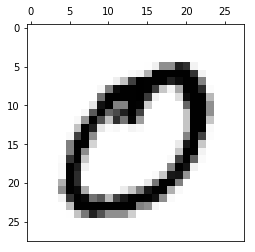

I PREDICT:  0
REAL VALUE:  0



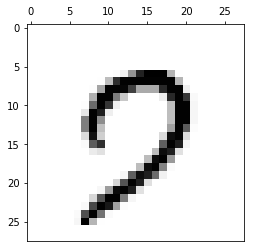

I PREDICT:  7
REAL VALUE:  7



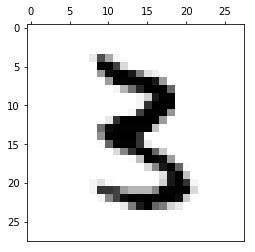

I PREDICT:  3
REAL VALUE:  3



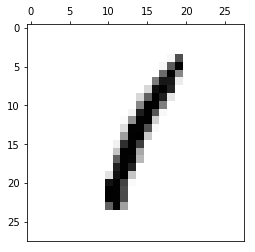

I PREDICT:  1
REAL VALUE:  1



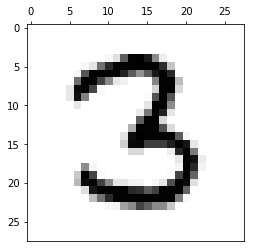

I PREDICT:  3
REAL VALUE:  3



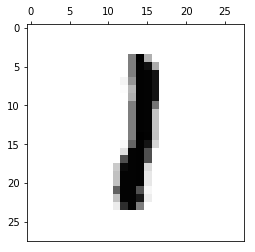

I PREDICT:  1
REAL VALUE:  1



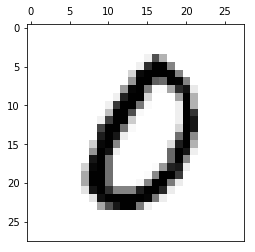

I PREDICT:  0
REAL VALUE:  0



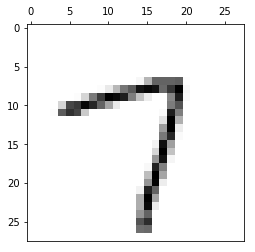

I PREDICT:  7
REAL VALUE:  7



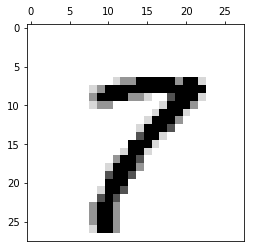

I PREDICT:  7
REAL VALUE:  7



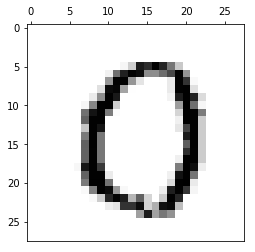

I PREDICT:  0
REAL VALUE:  0



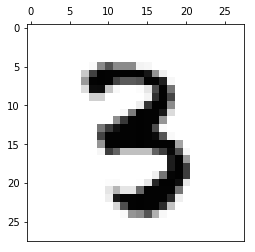

I PREDICT:  3
REAL VALUE:  3



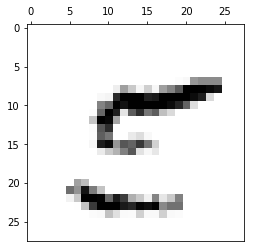

I PREDICT:  5
REAL VALUE:  5



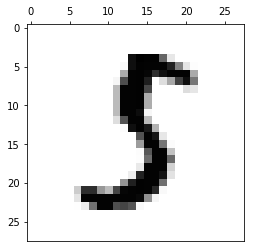

I PREDICT:  5
REAL VALUE:  5



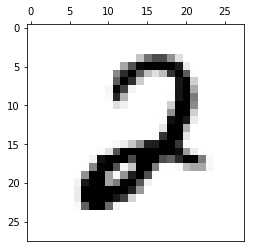

I PREDICT:  2
REAL VALUE:  2



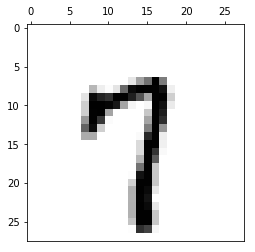

I PREDICT:  7
REAL VALUE:  7



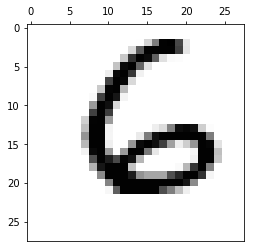

I PREDICT:  6
REAL VALUE:  6



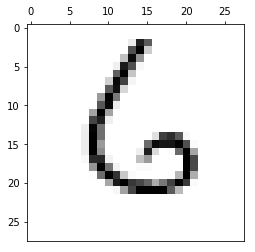

I PREDICT:  6
REAL VALUE:  6



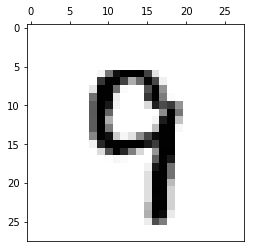

I PREDICT:  9
REAL VALUE:  9



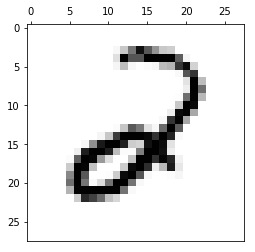

I PREDICT:  2
REAL VALUE:  2



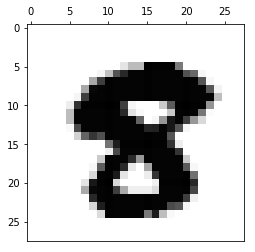

I PREDICT:  8
REAL VALUE:  8



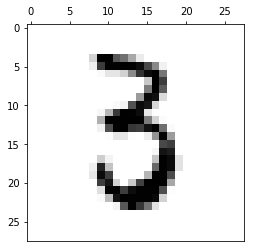

I PREDICT:  3
REAL VALUE:  3



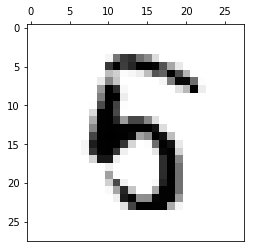

I PREDICT:  5
REAL VALUE:  5



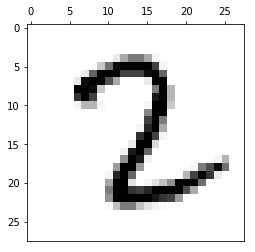

I PREDICT:  2
REAL VALUE:  2



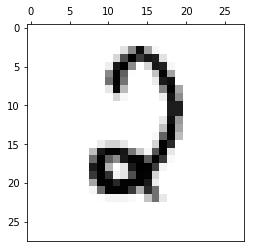

I PREDICT:  2
REAL VALUE:  2



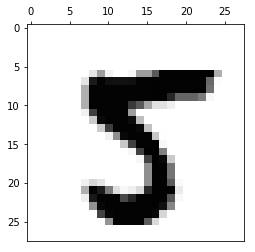

I PREDICT:  5
REAL VALUE:  5



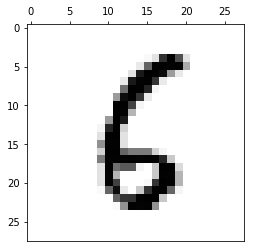

I PREDICT:  6
REAL VALUE:  6



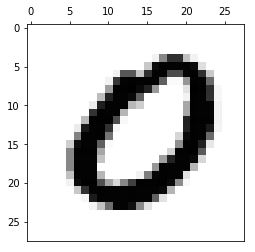

I PREDICT:  0
REAL VALUE:  0



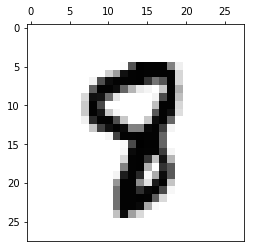

I PREDICT:  8
REAL VALUE:  8



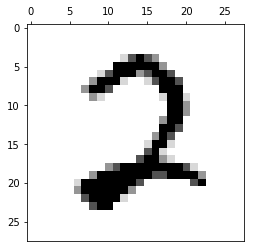

I PREDICT:  2
REAL VALUE:  2



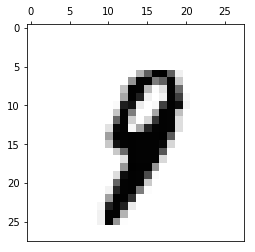

I PREDICT:  9
REAL VALUE:  9



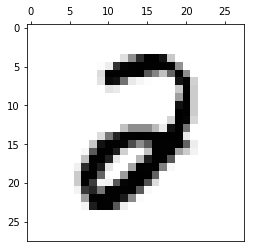

I PREDICT:  2
REAL VALUE:  2



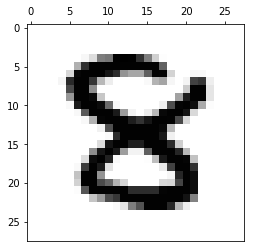

I PREDICT:  8
REAL VALUE:  8



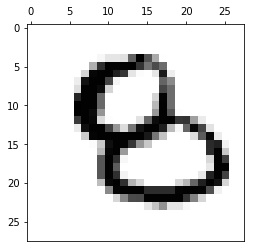

I PREDICT:  8
REAL VALUE:  8



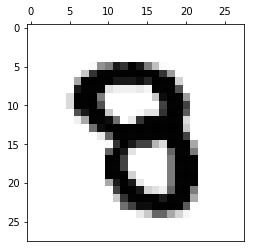

I PREDICT:  8
REAL VALUE:  8



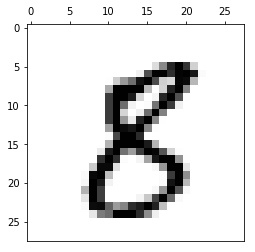

I PREDICT:  8
REAL VALUE:  8



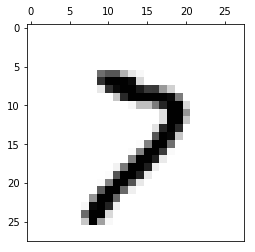

I PREDICT:  7
REAL VALUE:  7



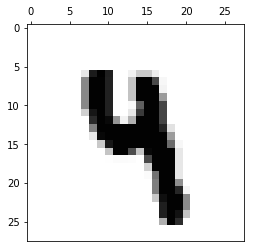

I PREDICT:  4
REAL VALUE:  4



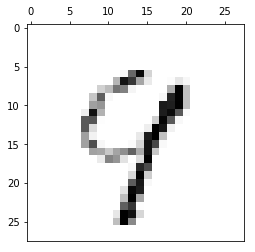

I PREDICT:  9
REAL VALUE:  9



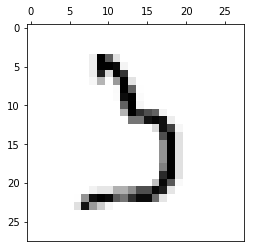

I PREDICT:  3
REAL VALUE:  3



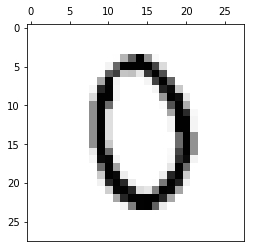

I PREDICT:  0
REAL VALUE:  0



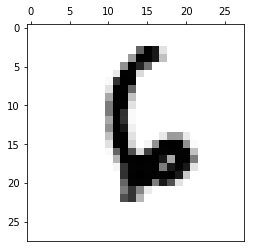

I PREDICT:  6
REAL VALUE:  6



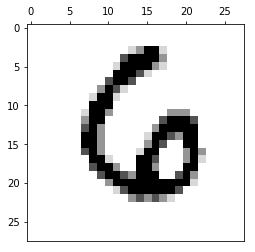

I PREDICT:  6
REAL VALUE:  6



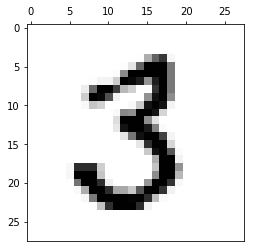

I PREDICT:  3
REAL VALUE:  3



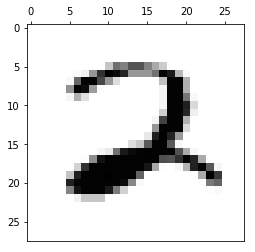

I PREDICT:  2
REAL VALUE:  2



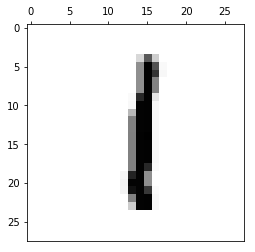

I PREDICT:  1
REAL VALUE:  1



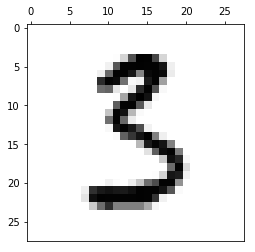

I PREDICT:  3
REAL VALUE:  3



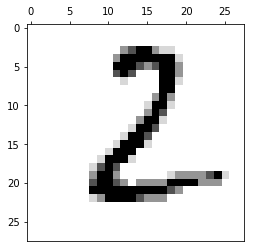

I PREDICT:  2
REAL VALUE:  2



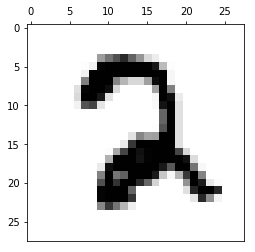

I PREDICT:  2
REAL VALUE:  2



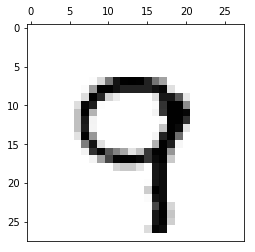

I PREDICT:  9
REAL VALUE:  9



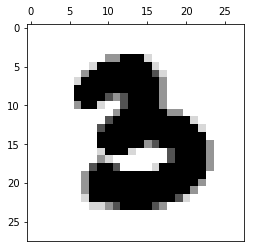

I PREDICT:  3
REAL VALUE:  3



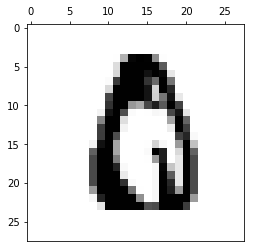

I PREDICT:  0
REAL VALUE:  0



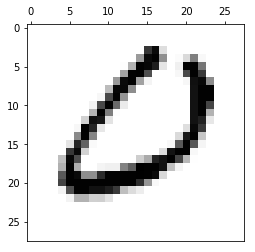

I PREDICT:  0
REAL VALUE:  0



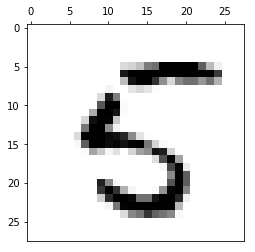

I PREDICT:  5
REAL VALUE:  5



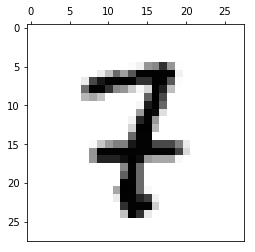

I PREDICT:  7
REAL VALUE:  7



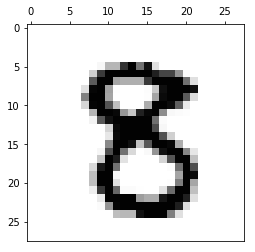

I PREDICT:  8
REAL VALUE:  8



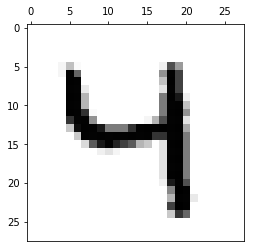

I PREDICT:  4
REAL VALUE:  4



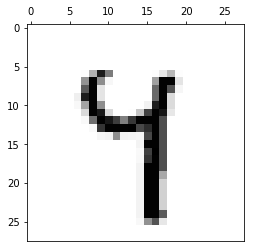

I PREDICT:  4
REAL VALUE:  4



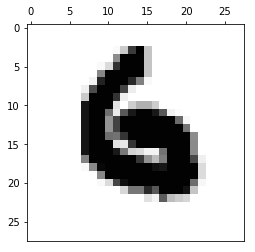

I PREDICT:  6
REAL VALUE:  6



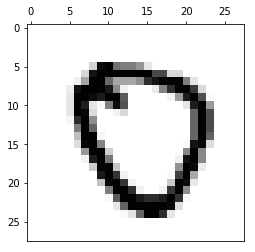

I PREDICT:  0
REAL VALUE:  0



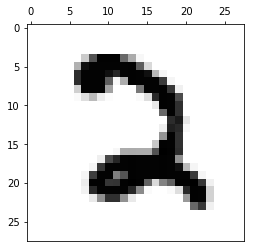

I PREDICT:  2
REAL VALUE:  2



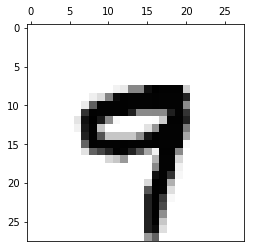

I PREDICT:  9
REAL VALUE:  9



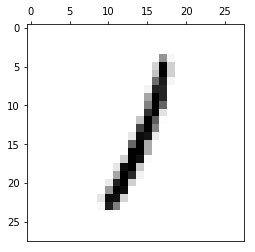

I PREDICT:  1
REAL VALUE:  1



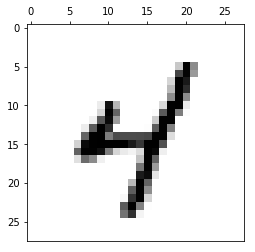

I PREDICT:  4
REAL VALUE:  4



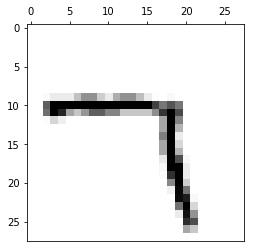

I PREDICT:  7
REAL VALUE:  7



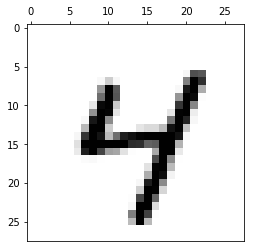

I PREDICT:  4
REAL VALUE:  4



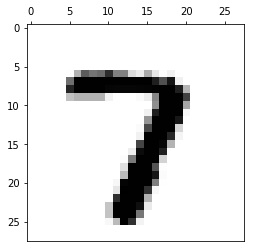

I PREDICT:  7
REAL VALUE:  7



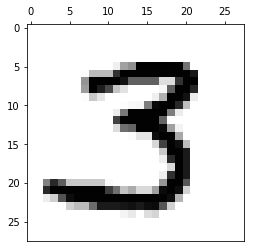

I PREDICT:  3
REAL VALUE:  3



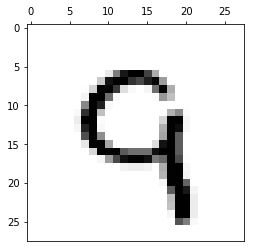

I PREDICT:  9
REAL VALUE:  9



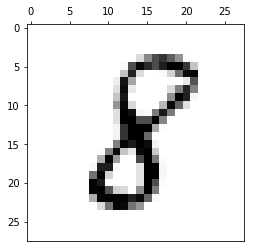

I PREDICT:  8
REAL VALUE:  8



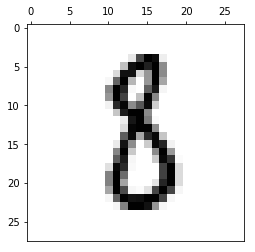

I PREDICT:  8
REAL VALUE:  8



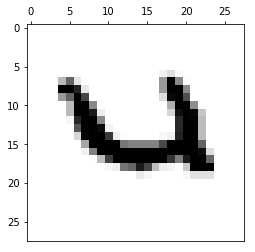

I PREDICT:  4
REAL VALUE:  4



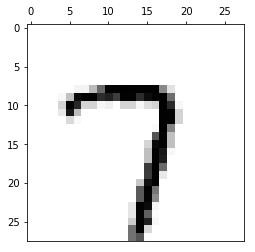

I PREDICT:  7
REAL VALUE:  7



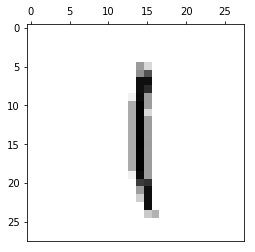

I PREDICT:  1
REAL VALUE:  1



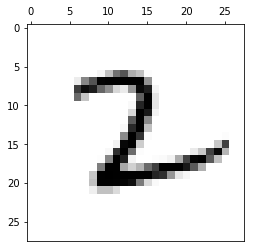

I PREDICT:  2
REAL VALUE:  2



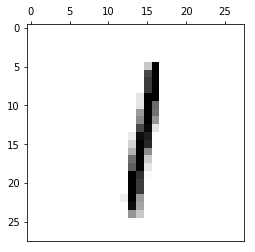

I PREDICT:  1
REAL VALUE:  1



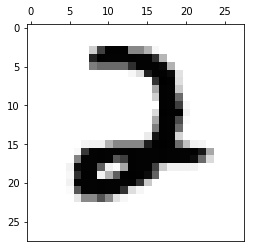

I PREDICT:  2
REAL VALUE:  2



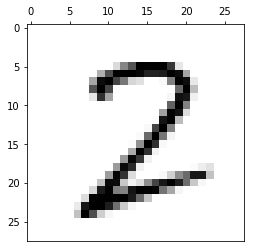

I PREDICT:  2
REAL VALUE:  2



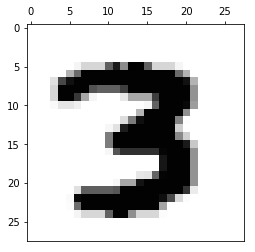

I PREDICT:  3
REAL VALUE:  3



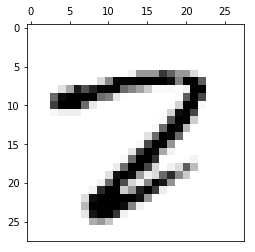

I PREDICT:  2
REAL VALUE:  2



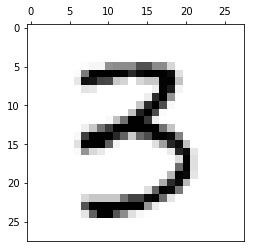

I PREDICT:  3
REAL VALUE:  3



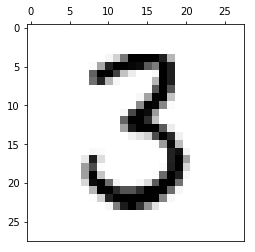

I PREDICT:  3
REAL VALUE:  3



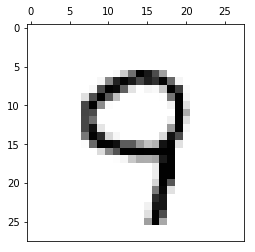

I PREDICT:  9
REAL VALUE:  9



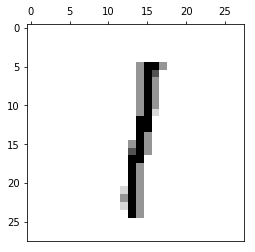

I PREDICT:  1
REAL VALUE:  1



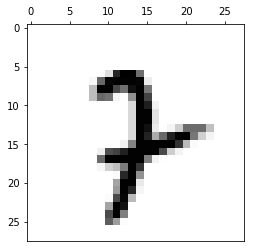

I PREDICT:  7
REAL VALUE:  7



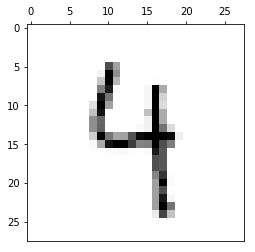

I PREDICT:  4
REAL VALUE:  4



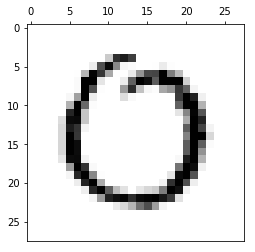

I PREDICT:  0
REAL VALUE:  0



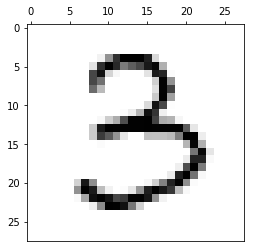

I PREDICT:  3
REAL VALUE:  3



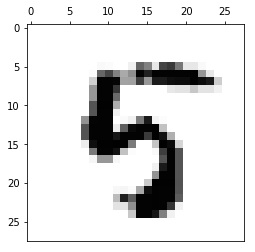

I PREDICT:  5
REAL VALUE:  5



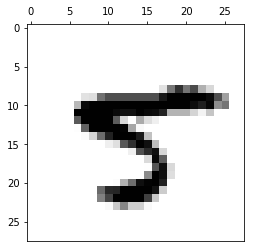

I PREDICT:  5
REAL VALUE:  5



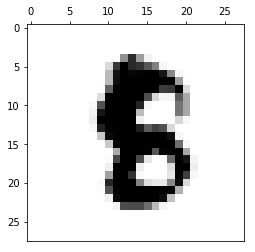

I PREDICT:  8
REAL VALUE:  8



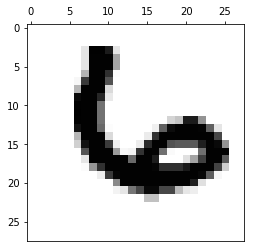

I PREDICT:  6
REAL VALUE:  6



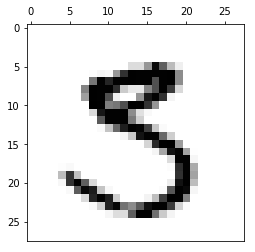

I PREDICT:  3
REAL VALUE:  3



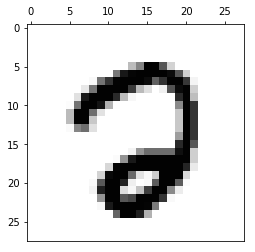

I PREDICT:  2
REAL VALUE:  2



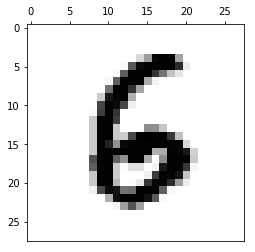

I PREDICT:  6
REAL VALUE:  6



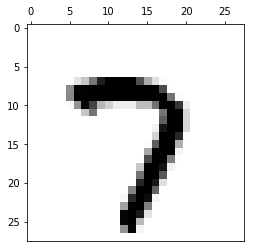

I PREDICT:  7
REAL VALUE:  7



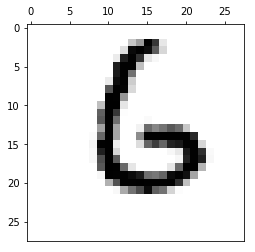

I PREDICT:  6
REAL VALUE:  6



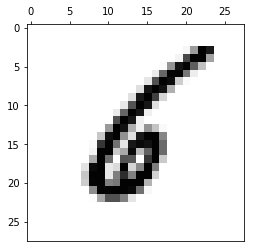

I PREDICT:  6
REAL VALUE:  6



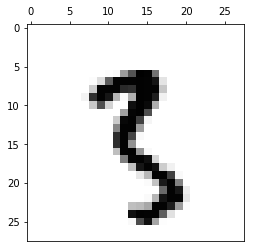

I PREDICT:  3
REAL VALUE:  3



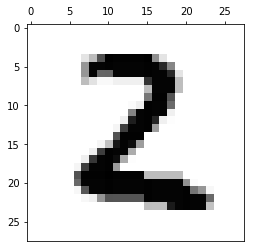

I PREDICT:  2
REAL VALUE:  2



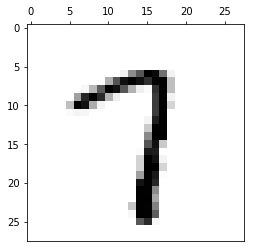

I PREDICT:  7
REAL VALUE:  7



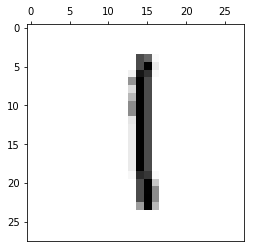

I PREDICT:  1
REAL VALUE:  1



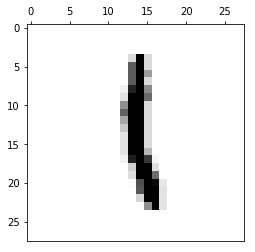

I PREDICT:  1
REAL VALUE:  1



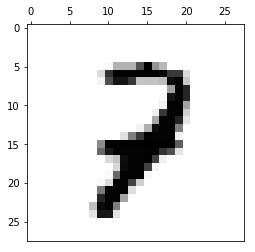

I PREDICT:  7
REAL VALUE:  7



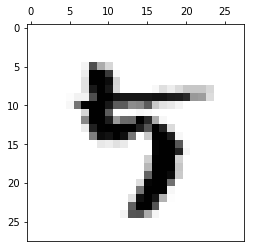

I PREDICT:  5
REAL VALUE:  5



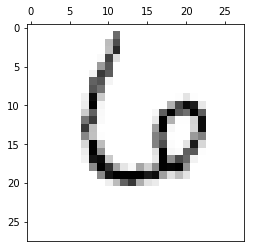

I PREDICT:  6
REAL VALUE:  6



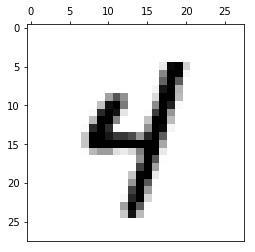

I PREDICT:  4
REAL VALUE:  4



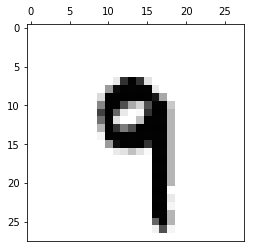

I PREDICT:  9
REAL VALUE:  9



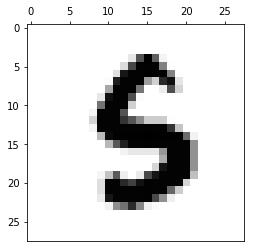

I PREDICT:  5
REAL VALUE:  5



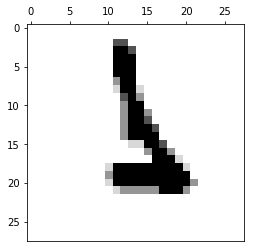

I PREDICT:  1
REAL VALUE:  1



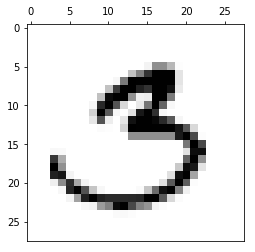

I PREDICT:  3
REAL VALUE:  3



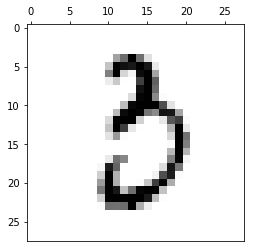

I PREDICT:  3
REAL VALUE:  3



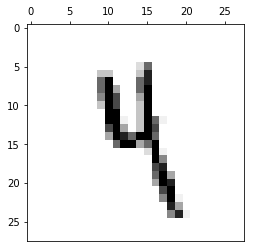

I PREDICT:  4
REAL VALUE:  4



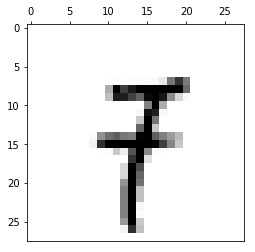

I PREDICT:  7
REAL VALUE:  7



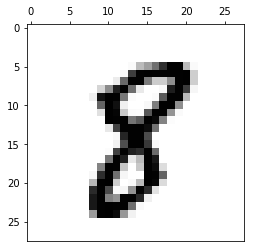

I PREDICT:  8
REAL VALUE:  8



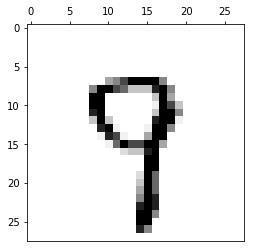

I PREDICT:  9
REAL VALUE:  9



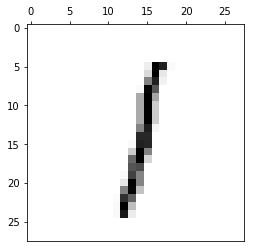

I PREDICT:  1
REAL VALUE:  1



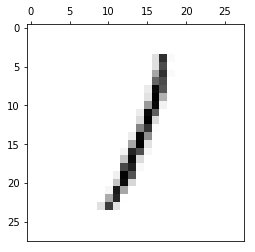

I PREDICT:  1
REAL VALUE:  1



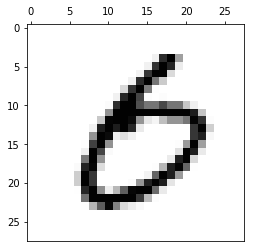

I PREDICT:  6
REAL VALUE:  6



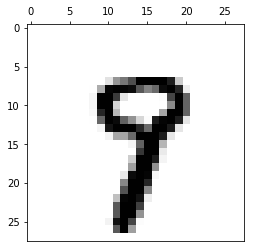

I PREDICT:  9
REAL VALUE:  9



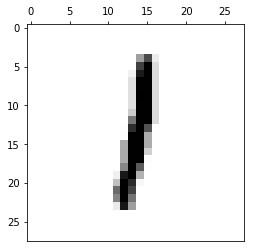

I PREDICT:  1
REAL VALUE:  1



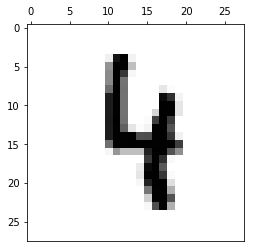

I PREDICT:  4
REAL VALUE:  4



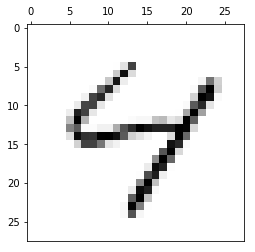

I PREDICT:  4
REAL VALUE:  4



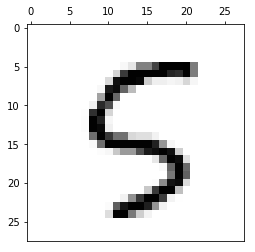

I PREDICT:  5
REAL VALUE:  5



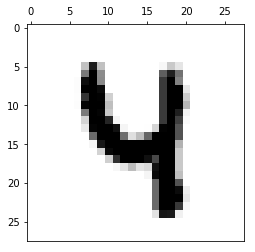

I PREDICT:  4
REAL VALUE:  4



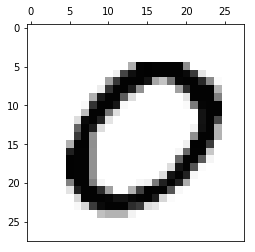

I PREDICT:  0
REAL VALUE:  0



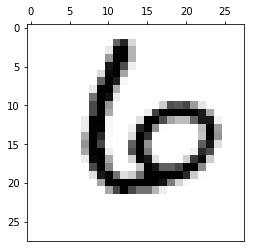

I PREDICT:  6
REAL VALUE:  6



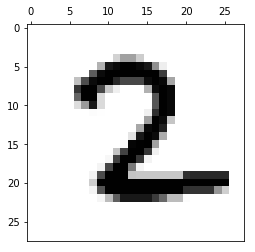

I PREDICT:  2
REAL VALUE:  2



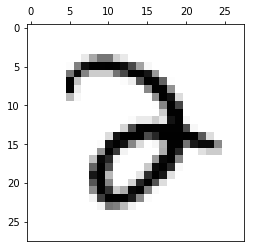

I PREDICT:  2
REAL VALUE:  2



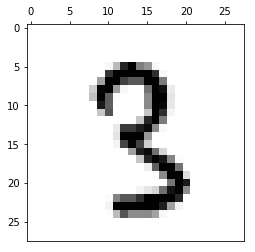

I PREDICT:  3
REAL VALUE:  3



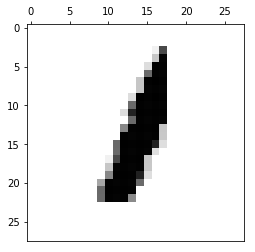

I PREDICT:  1
REAL VALUE:  1



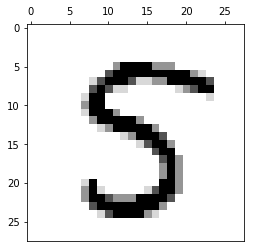

I PREDICT:  5
REAL VALUE:  5



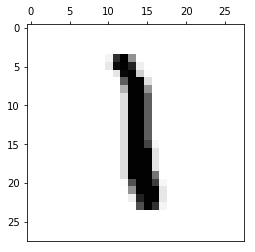

I PREDICT:  1
REAL VALUE:  1



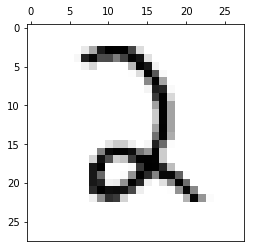

I PREDICT:  2
REAL VALUE:  2



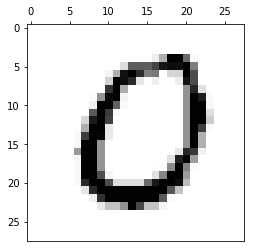

I PREDICT:  0
REAL VALUE:  0



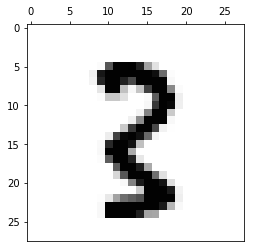

I PREDICT:  3
REAL VALUE:  3



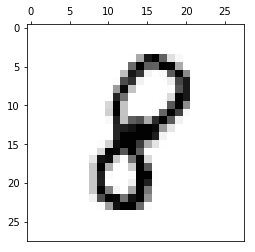

I PREDICT:  8
REAL VALUE:  8



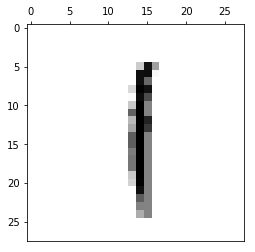

I PREDICT:  1
REAL VALUE:  1



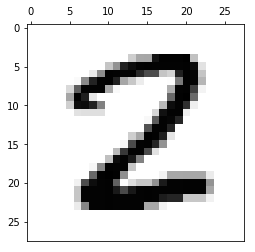

I PREDICT:  2
REAL VALUE:  2



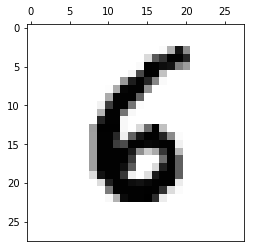

I PREDICT:  6
REAL VALUE:  6



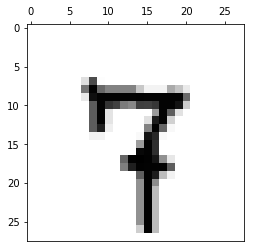

I PREDICT:  7
REAL VALUE:  7



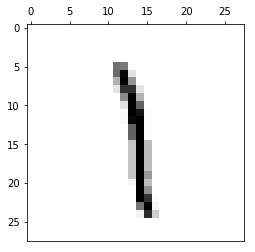

I PREDICT:  1
REAL VALUE:  1



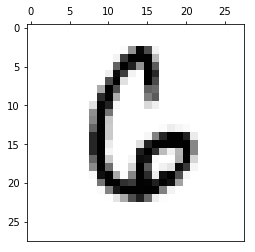

I PREDICT:  6
REAL VALUE:  6



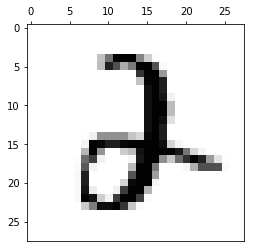

I PREDICT:  2
REAL VALUE:  2



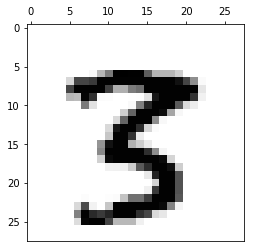

I PREDICT:  3
REAL VALUE:  3



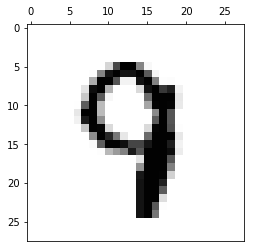

I PREDICT:  9
REAL VALUE:  9



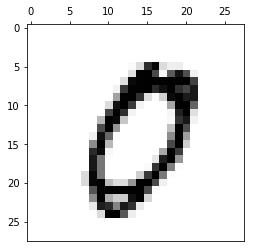

I PREDICT:  0
REAL VALUE:  0



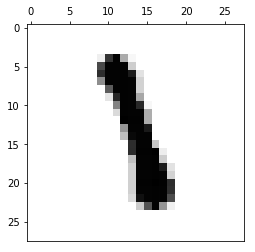

I PREDICT:  1
REAL VALUE:  1



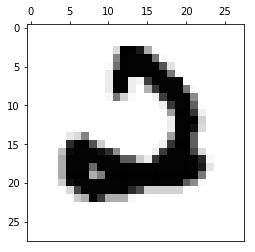

I PREDICT:  2
REAL VALUE:  2



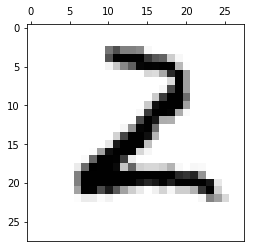

I PREDICT:  2
REAL VALUE:  2



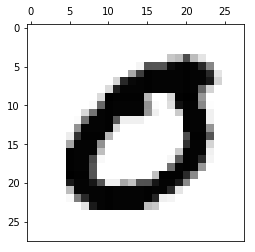

I PREDICT:  0
REAL VALUE:  0



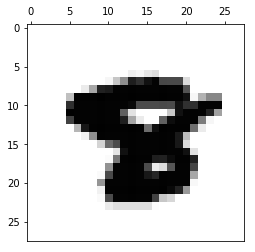

I PREDICT:  8
REAL VALUE:  8



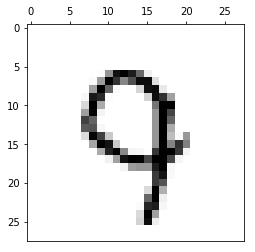

I PREDICT:  9
REAL VALUE:  9



In [57]:
for i in range(0, 1000):
    if labels_real[i] == labels_predict[i]:
        display_image(X_test[i])
        print("I PREDICT: ", labels_predict[i])
        print("REAL VALUE: ", labels_real[i])
        print("")

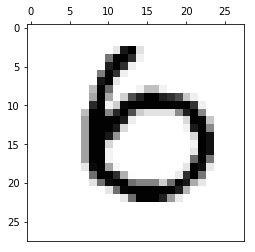

I PREDICT:  0
REAL VALUE:  6



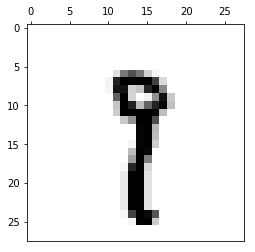

I PREDICT:  8
REAL VALUE:  9



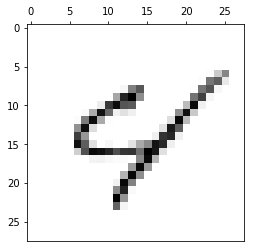

I PREDICT:  9
REAL VALUE:  4



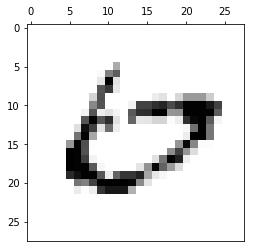

I PREDICT:  0
REAL VALUE:  6



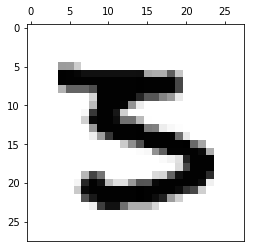

I PREDICT:  5
REAL VALUE:  3



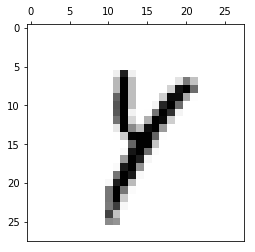

I PREDICT:  1
REAL VALUE:  4



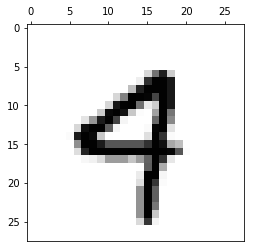

I PREDICT:  9
REAL VALUE:  4



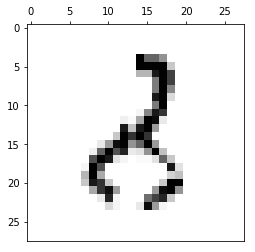

I PREDICT:  2
REAL VALUE:  8



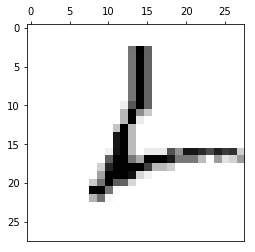

I PREDICT:  6
REAL VALUE:  2



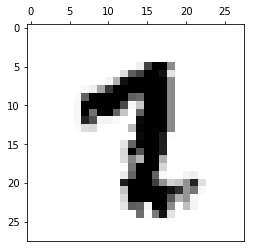

I PREDICT:  1
REAL VALUE:  2



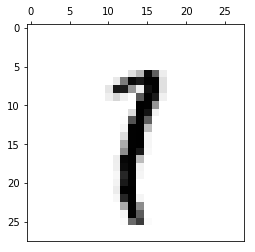

I PREDICT:  7
REAL VALUE:  1



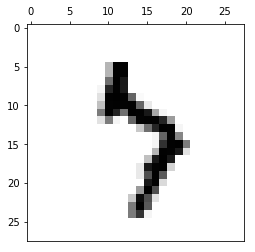

I PREDICT:  9
REAL VALUE:  7



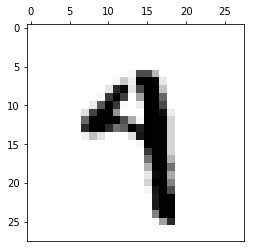

I PREDICT:  9
REAL VALUE:  4



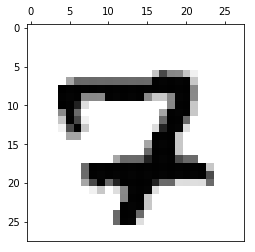

I PREDICT:  2
REAL VALUE:  7



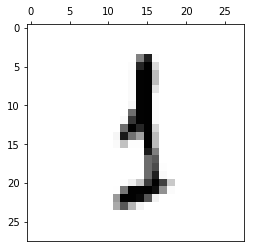

I PREDICT:  3
REAL VALUE:  1



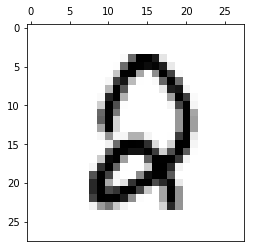

I PREDICT:  8
REAL VALUE:  2



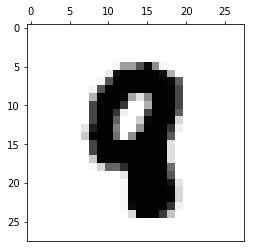

I PREDICT:  9
REAL VALUE:  8



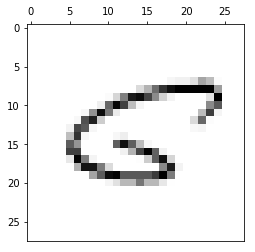

I PREDICT:  5
REAL VALUE:  6



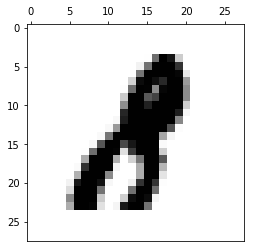

I PREDICT:  1
REAL VALUE:  8



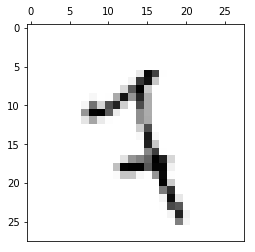

I PREDICT:  3
REAL VALUE:  7



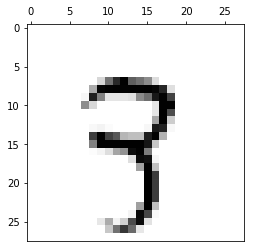

I PREDICT:  7
REAL VALUE:  3



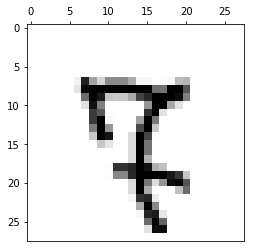

I PREDICT:  8
REAL VALUE:  7



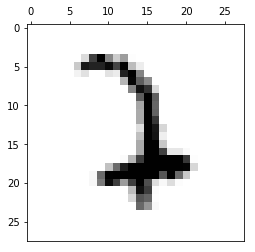

I PREDICT:  2
REAL VALUE:  7



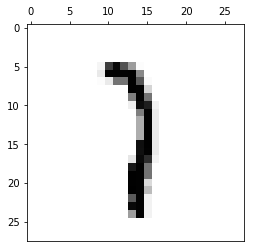

I PREDICT:  1
REAL VALUE:  7



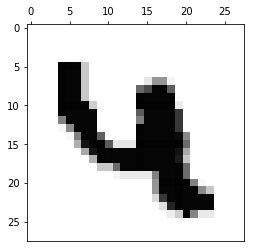

I PREDICT:  9
REAL VALUE:  4



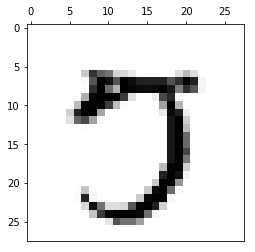

I PREDICT:  7
REAL VALUE:  5



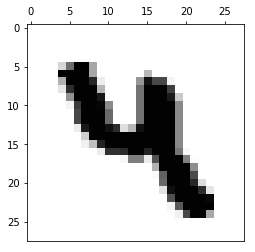

I PREDICT:  9
REAL VALUE:  4



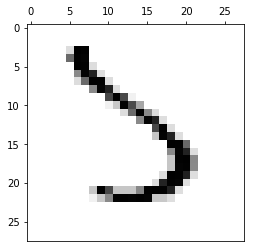

I PREDICT:  3
REAL VALUE:  5



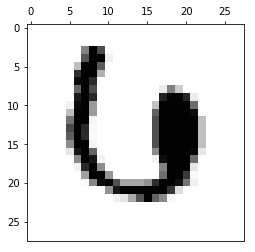

I PREDICT:  0
REAL VALUE:  6



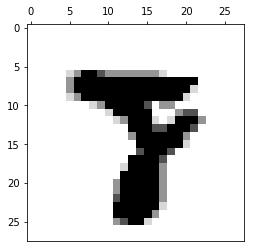

I PREDICT:  7
REAL VALUE:  8



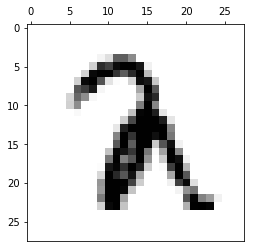

I PREDICT:  3
REAL VALUE:  2



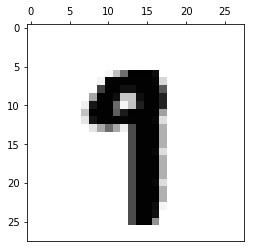

I PREDICT:  7
REAL VALUE:  9



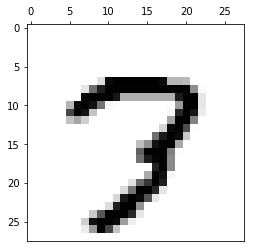

I PREDICT:  7
REAL VALUE:  3



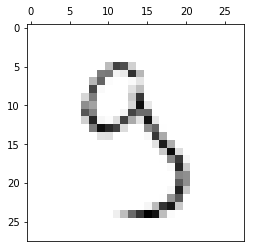

I PREDICT:  5
REAL VALUE:  9



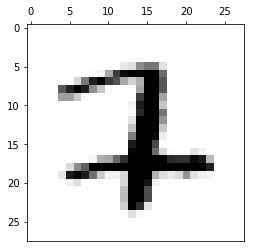

I PREDICT:  2
REAL VALUE:  7



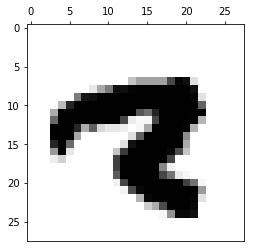

I PREDICT:  7
REAL VALUE:  2



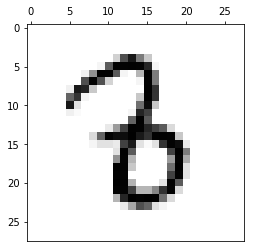

I PREDICT:  3
REAL VALUE:  8



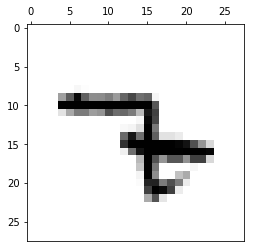

I PREDICT:  2
REAL VALUE:  7



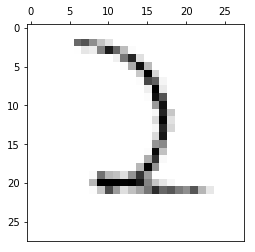

I PREDICT:  1
REAL VALUE:  2



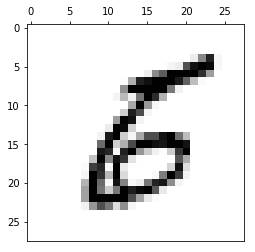

I PREDICT:  5
REAL VALUE:  6



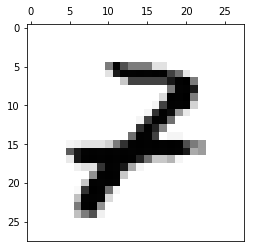

I PREDICT:  2
REAL VALUE:  7



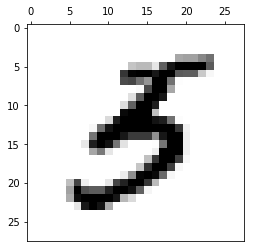

I PREDICT:  3
REAL VALUE:  5



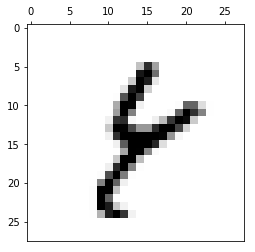

I PREDICT:  8
REAL VALUE:  4



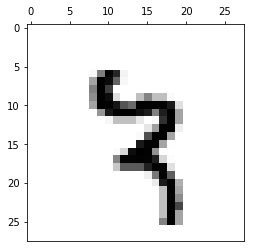

I PREDICT:  5
REAL VALUE:  3



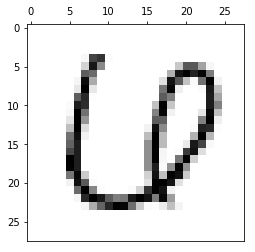

I PREDICT:  0
REAL VALUE:  6



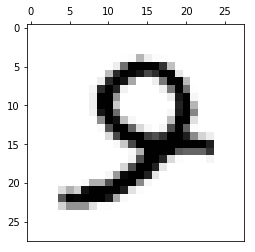

I PREDICT:  8
REAL VALUE:  9



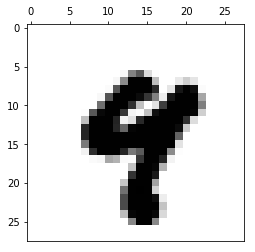

I PREDICT:  9
REAL VALUE:  4



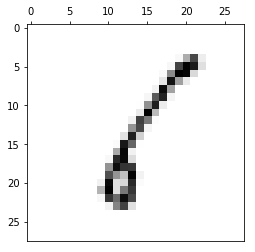

I PREDICT:  1
REAL VALUE:  6



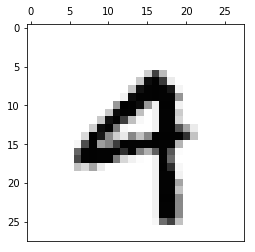

I PREDICT:  9
REAL VALUE:  4



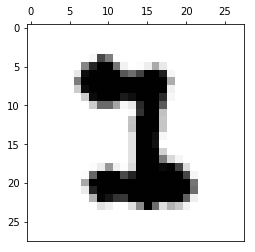

I PREDICT:  2
REAL VALUE:  1



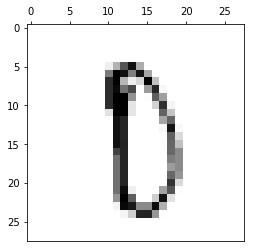

I PREDICT:  8
REAL VALUE:  0



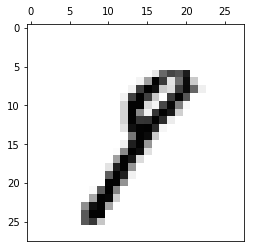

I PREDICT:  8
REAL VALUE:  9



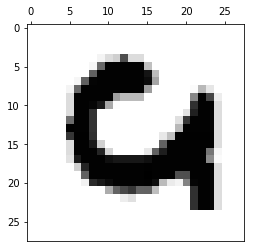

I PREDICT:  0
REAL VALUE:  9



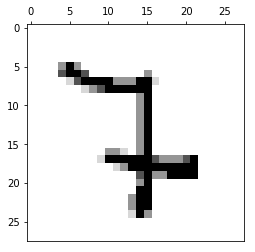

I PREDICT:  2
REAL VALUE:  7



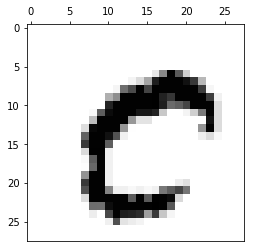

I PREDICT:  8
REAL VALUE:  0



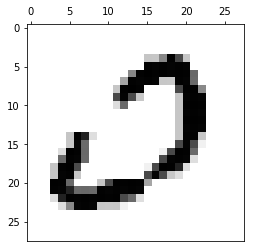

I PREDICT:  2
REAL VALUE:  0



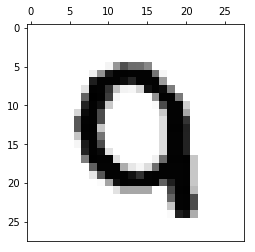

I PREDICT:  0
REAL VALUE:  9



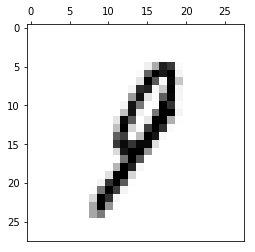

I PREDICT:  4
REAL VALUE:  9



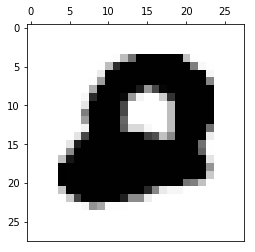

I PREDICT:  0
REAL VALUE:  2



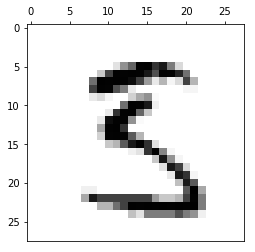

I PREDICT:  3
REAL VALUE:  5



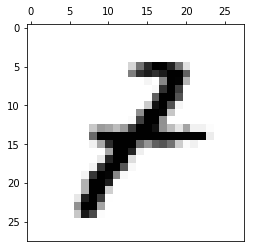

I PREDICT:  2
REAL VALUE:  7



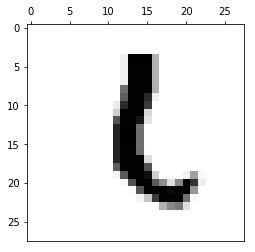

I PREDICT:  1
REAL VALUE:  6



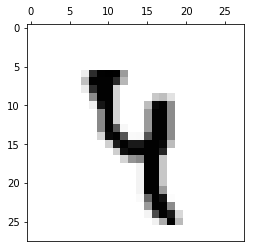

I PREDICT:  9
REAL VALUE:  4



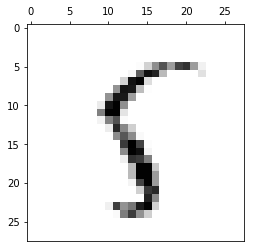

I PREDICT:  8
REAL VALUE:  5



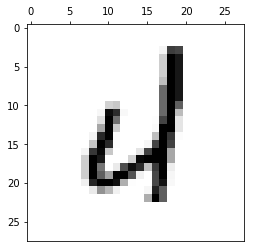

I PREDICT:  2
REAL VALUE:  4



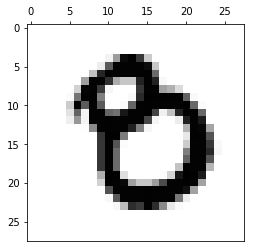

I PREDICT:  0
REAL VALUE:  8



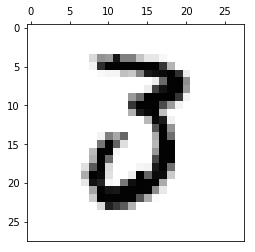

I PREDICT:  8
REAL VALUE:  3



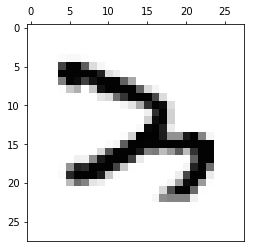

I PREDICT:  2
REAL VALUE:  3



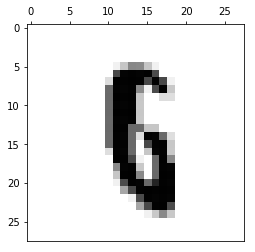

I PREDICT:  8
REAL VALUE:  6



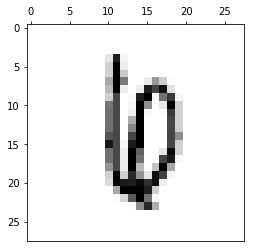

I PREDICT:  0
REAL VALUE:  6



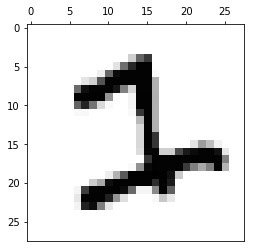

I PREDICT:  3
REAL VALUE:  1



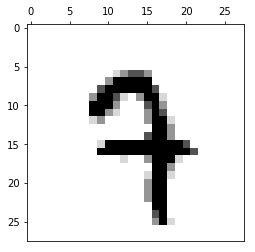

I PREDICT:  9
REAL VALUE:  7



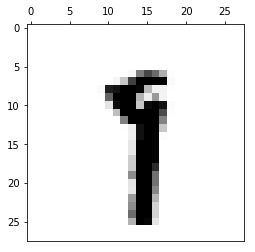

I PREDICT:  7
REAL VALUE:  9



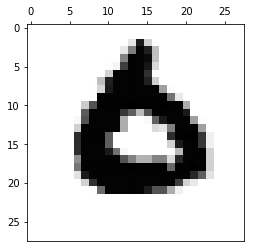

I PREDICT:  0
REAL VALUE:  6



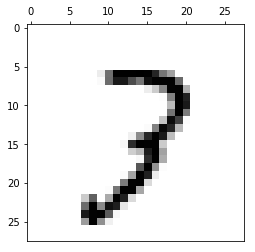

I PREDICT:  7
REAL VALUE:  3



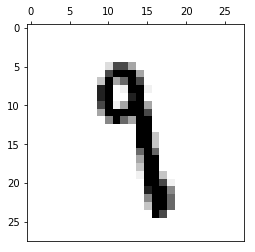

I PREDICT:  7
REAL VALUE:  9



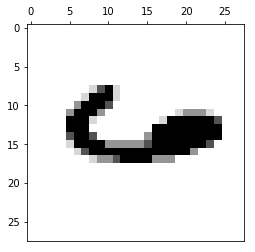

I PREDICT:  4
REAL VALUE:  6



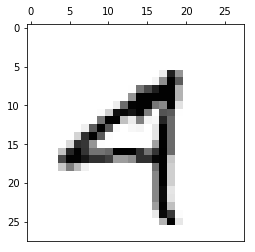

I PREDICT:  9
REAL VALUE:  4



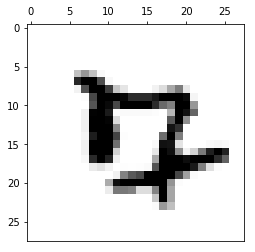

I PREDICT:  2
REAL VALUE:  7



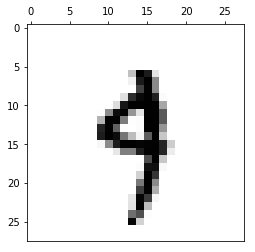

I PREDICT:  9
REAL VALUE:  4



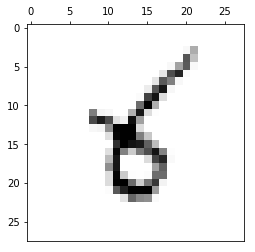

I PREDICT:  8
REAL VALUE:  6



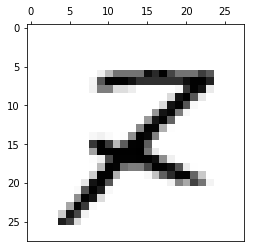

I PREDICT:  2
REAL VALUE:  7



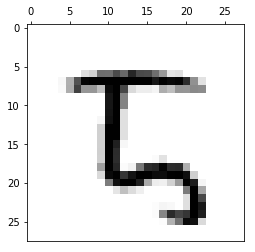

I PREDICT:  0
REAL VALUE:  5



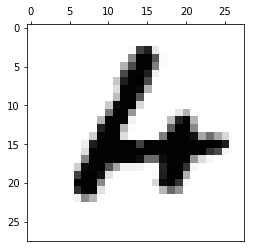

I PREDICT:  6
REAL VALUE:  4



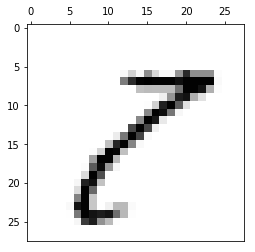

I PREDICT:  8
REAL VALUE:  7



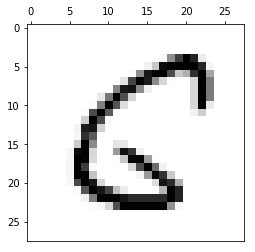

I PREDICT:  5
REAL VALUE:  6



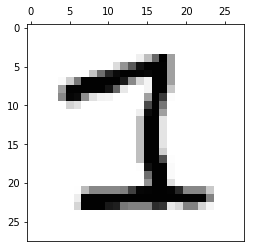

I PREDICT:  2
REAL VALUE:  1



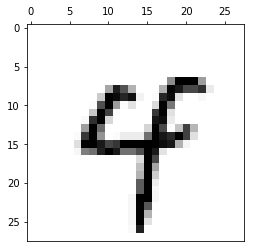

I PREDICT:  9
REAL VALUE:  4



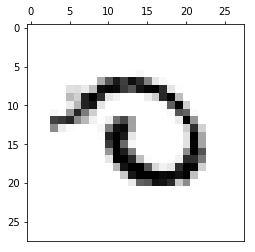

I PREDICT:  7
REAL VALUE:  0



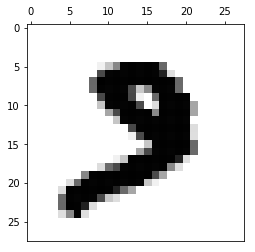

I PREDICT:  3
REAL VALUE:  9



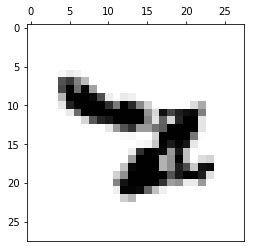

I PREDICT:  7
REAL VALUE:  2



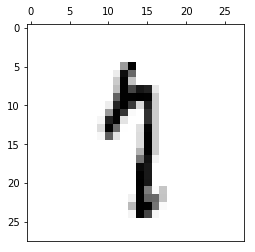

I PREDICT:  7
REAL VALUE:  1



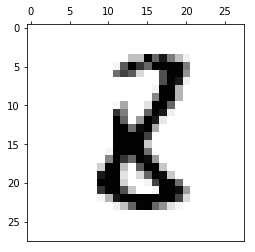

I PREDICT:  2
REAL VALUE:  8



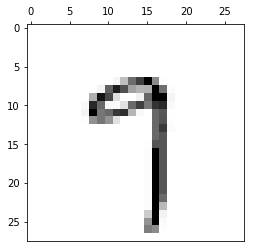

I PREDICT:  7
REAL VALUE:  9



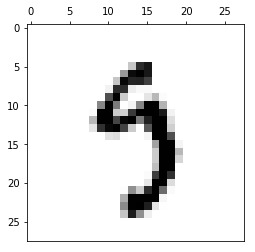

I PREDICT:  5
REAL VALUE:  9



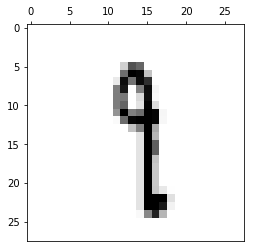

I PREDICT:  8
REAL VALUE:  9



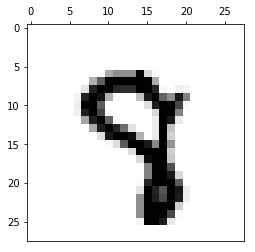

I PREDICT:  9
REAL VALUE:  8



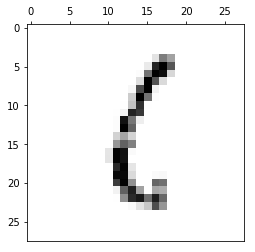

I PREDICT:  1
REAL VALUE:  6



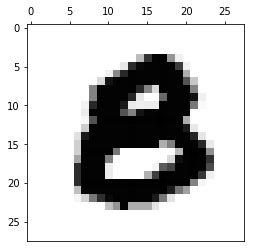

I PREDICT:  0
REAL VALUE:  8



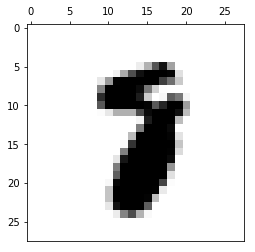

I PREDICT:  7
REAL VALUE:  8



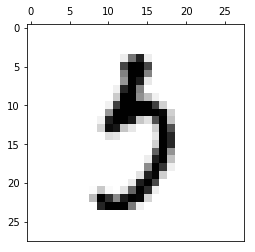

I PREDICT:  5
REAL VALUE:  3



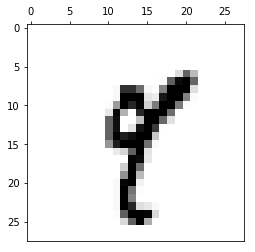

I PREDICT:  8
REAL VALUE:  9



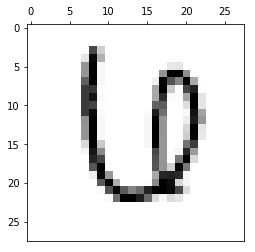

I PREDICT:  0
REAL VALUE:  6



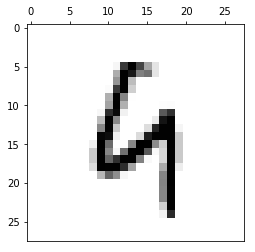

I PREDICT:  4
REAL VALUE:  9



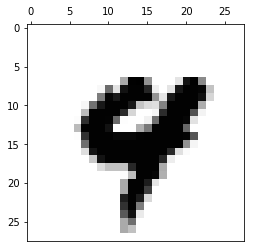

I PREDICT:  9
REAL VALUE:  4



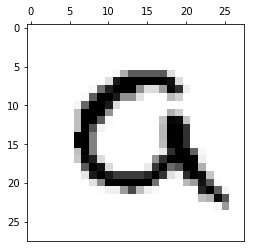

I PREDICT:  0
REAL VALUE:  9



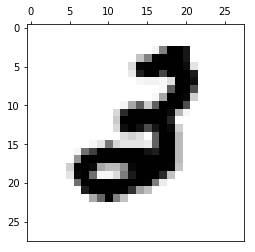

I PREDICT:  2
REAL VALUE:  3



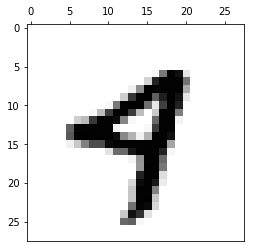

I PREDICT:  9
REAL VALUE:  4



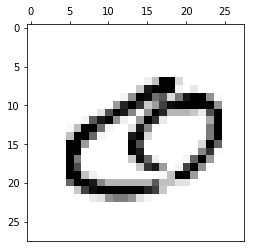

I PREDICT:  8
REAL VALUE:  0



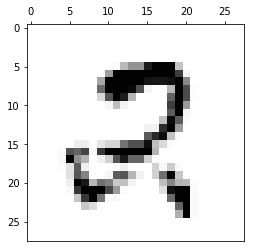

I PREDICT:  3
REAL VALUE:  2



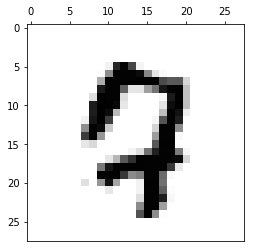

I PREDICT:  9
REAL VALUE:  7



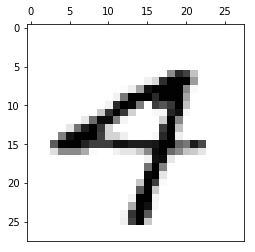

I PREDICT:  9
REAL VALUE:  4



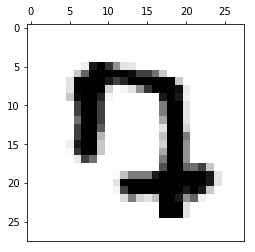

I PREDICT:  0
REAL VALUE:  7



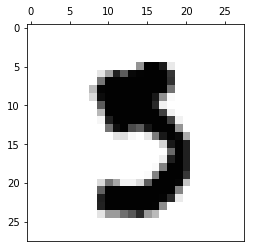

I PREDICT:  3
REAL VALUE:  5



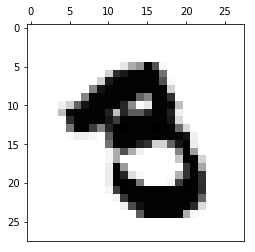

I PREDICT:  8
REAL VALUE:  3



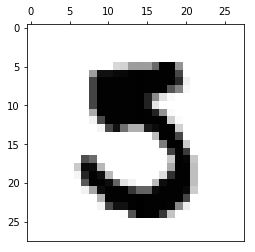

I PREDICT:  3
REAL VALUE:  5



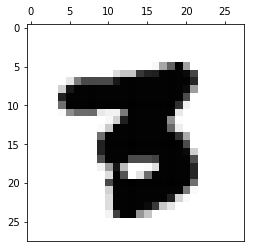

I PREDICT:  8
REAL VALUE:  3



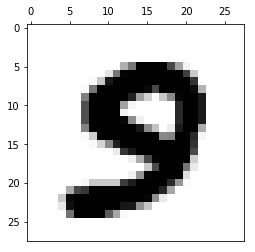

I PREDICT:  5
REAL VALUE:  9



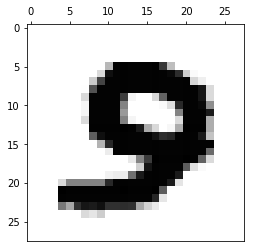

I PREDICT:  5
REAL VALUE:  9



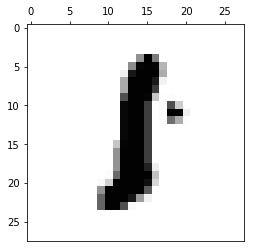

I PREDICT:  8
REAL VALUE:  1



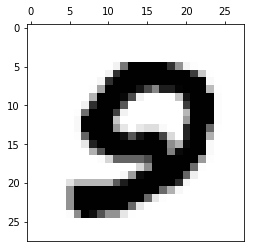

I PREDICT:  5
REAL VALUE:  9



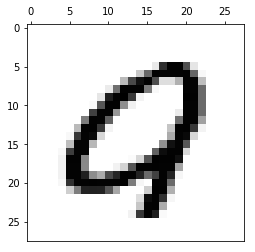

I PREDICT:  0
REAL VALUE:  9



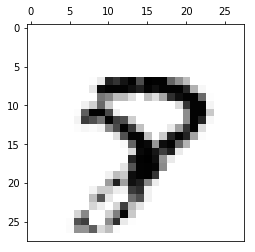

I PREDICT:  9
REAL VALUE:  8



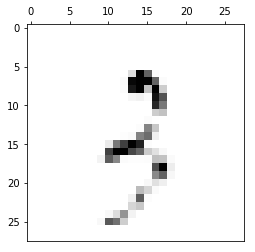

I PREDICT:  2
REAL VALUE:  3



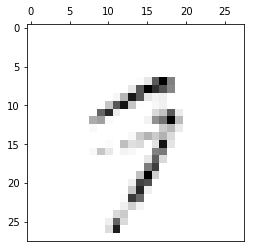

I PREDICT:  7
REAL VALUE:  9



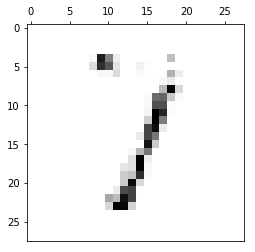

I PREDICT:  1
REAL VALUE:  7



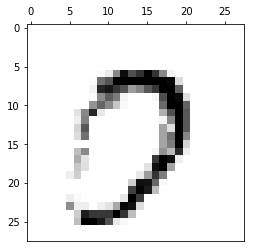

I PREDICT:  7
REAL VALUE:  0



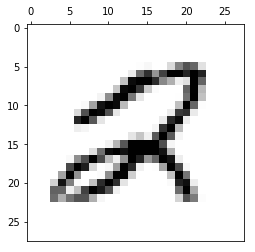

I PREDICT:  8
REAL VALUE:  2



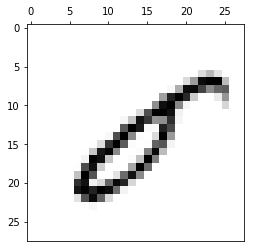

I PREDICT:  8
REAL VALUE:  0



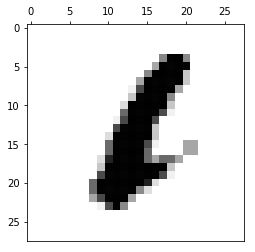

I PREDICT:  6
REAL VALUE:  1



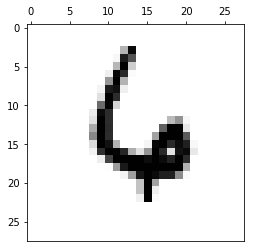

I PREDICT:  4
REAL VALUE:  6



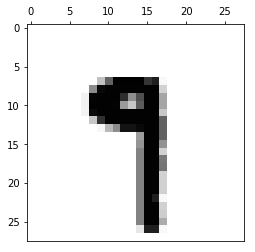

I PREDICT:  7
REAL VALUE:  9



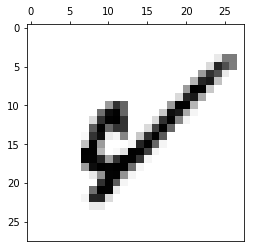

I PREDICT:  8
REAL VALUE:  4



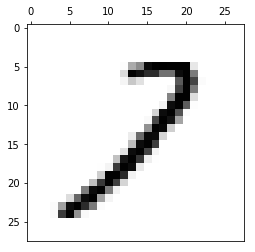

I PREDICT:  2
REAL VALUE:  7



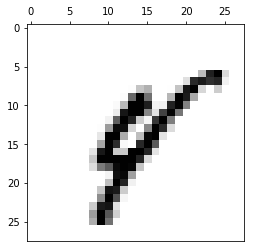

I PREDICT:  8
REAL VALUE:  4



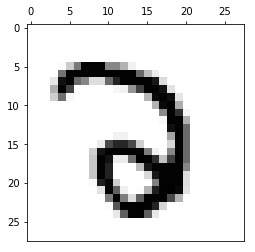

I PREDICT:  3
REAL VALUE:  2



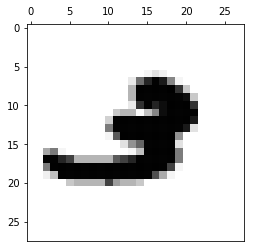

I PREDICT:  5
REAL VALUE:  3



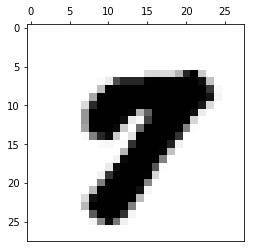

I PREDICT:  9
REAL VALUE:  7



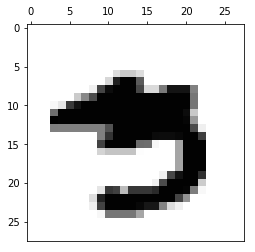

I PREDICT:  5
REAL VALUE:  3



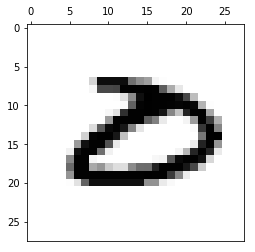

I PREDICT:  2
REAL VALUE:  0



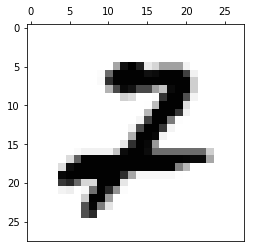

I PREDICT:  2
REAL VALUE:  7



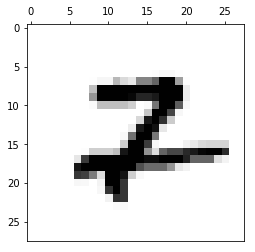

I PREDICT:  2
REAL VALUE:  7



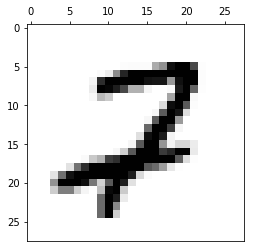

I PREDICT:  2
REAL VALUE:  7



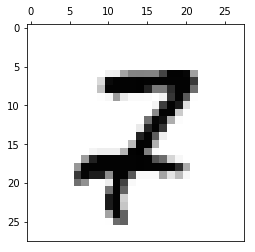

I PREDICT:  2
REAL VALUE:  7



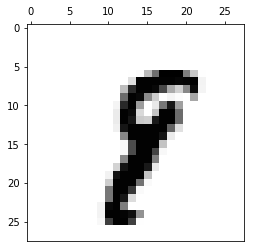

I PREDICT:  8
REAL VALUE:  9



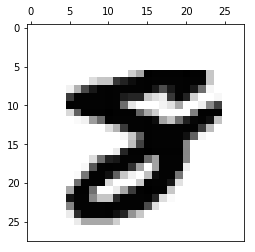

I PREDICT:  5
REAL VALUE:  8



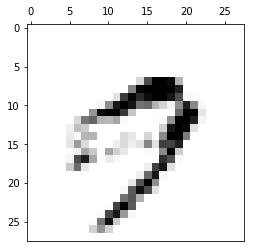

I PREDICT:  7
REAL VALUE:  9



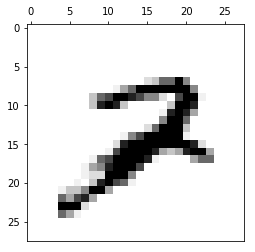

I PREDICT:  7
REAL VALUE:  2



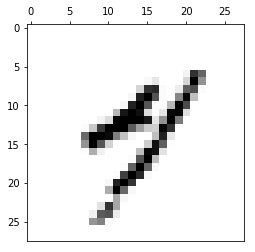

I PREDICT:  7
REAL VALUE:  4



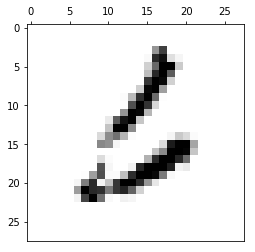

I PREDICT:  1
REAL VALUE:  6



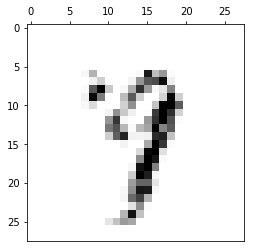

I PREDICT:  7
REAL VALUE:  9



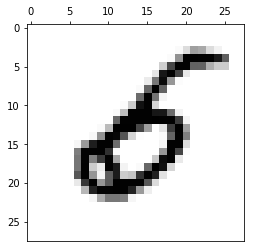

I PREDICT:  6
REAL VALUE:  5



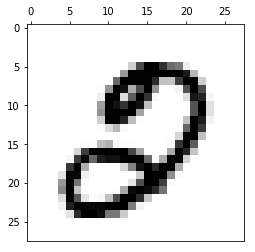

I PREDICT:  3
REAL VALUE:  2



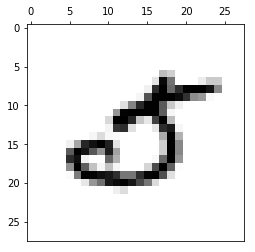

I PREDICT:  3
REAL VALUE:  5



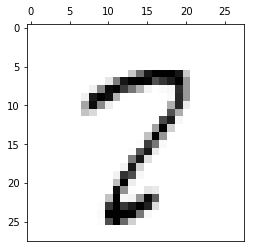

I PREDICT:  7
REAL VALUE:  2



In [54]:
cont = 0

for i in range(0, len(labels_real)):
    if labels_real[i] != labels_predict[i]:
        display_image(X_test[i])
        print("I PREDICT: ", labels_predict[i])
        print("REAL VALUE: ", labels_real[i])
        cont += 1
        print("")

In [55]:
print("TOTAL ERROR: ", cont)

TOTAL ERROR:  155
